In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [97]:
df = pd.read_excel("Customer Churn Data.xlsx", sheet_name = 'Data for DSBA')

In [98]:
df.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [100]:
df.shape

(11260, 19)

In [101]:
df.describe().T

count          mean          std      min       25%  \
AccountID        11260.0  25629.500000  3250.626350  20000.0  22814.75   
Churn            11260.0      0.168384     0.374223      0.0      0.00   
City_Tier        11148.0      1.653929     0.915015      1.0      1.00   
CC_Contacted_LY  11158.0     17.867091     8.853269      4.0     11.00   
Service_Score    11162.0      2.902526     0.725584      0.0      2.00   
CC_Agent_Score   11144.0      3.066493     1.379772      1.0      2.00   
Complain_ly      10903.0      0.285334     0.451594      0.0      0.00   

                     50%       75%      max  
AccountID        25629.5  28444.25  31259.0  
Churn                0.0      0.00      1.0  
City_Tier            1.0      3.00      3.0  
CC_Contacted_LY     16.0     23.00    132.0  
Service_Score        3.0      3.00      5.0  
CC_Agent_Score       3.0      4.00      5.0  
Complain_ly          0.0      1.00      1.0

In [102]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [103]:
print("Number of duplicate rows:",df.duplicated().sum())

Number of duplicate rows: 0


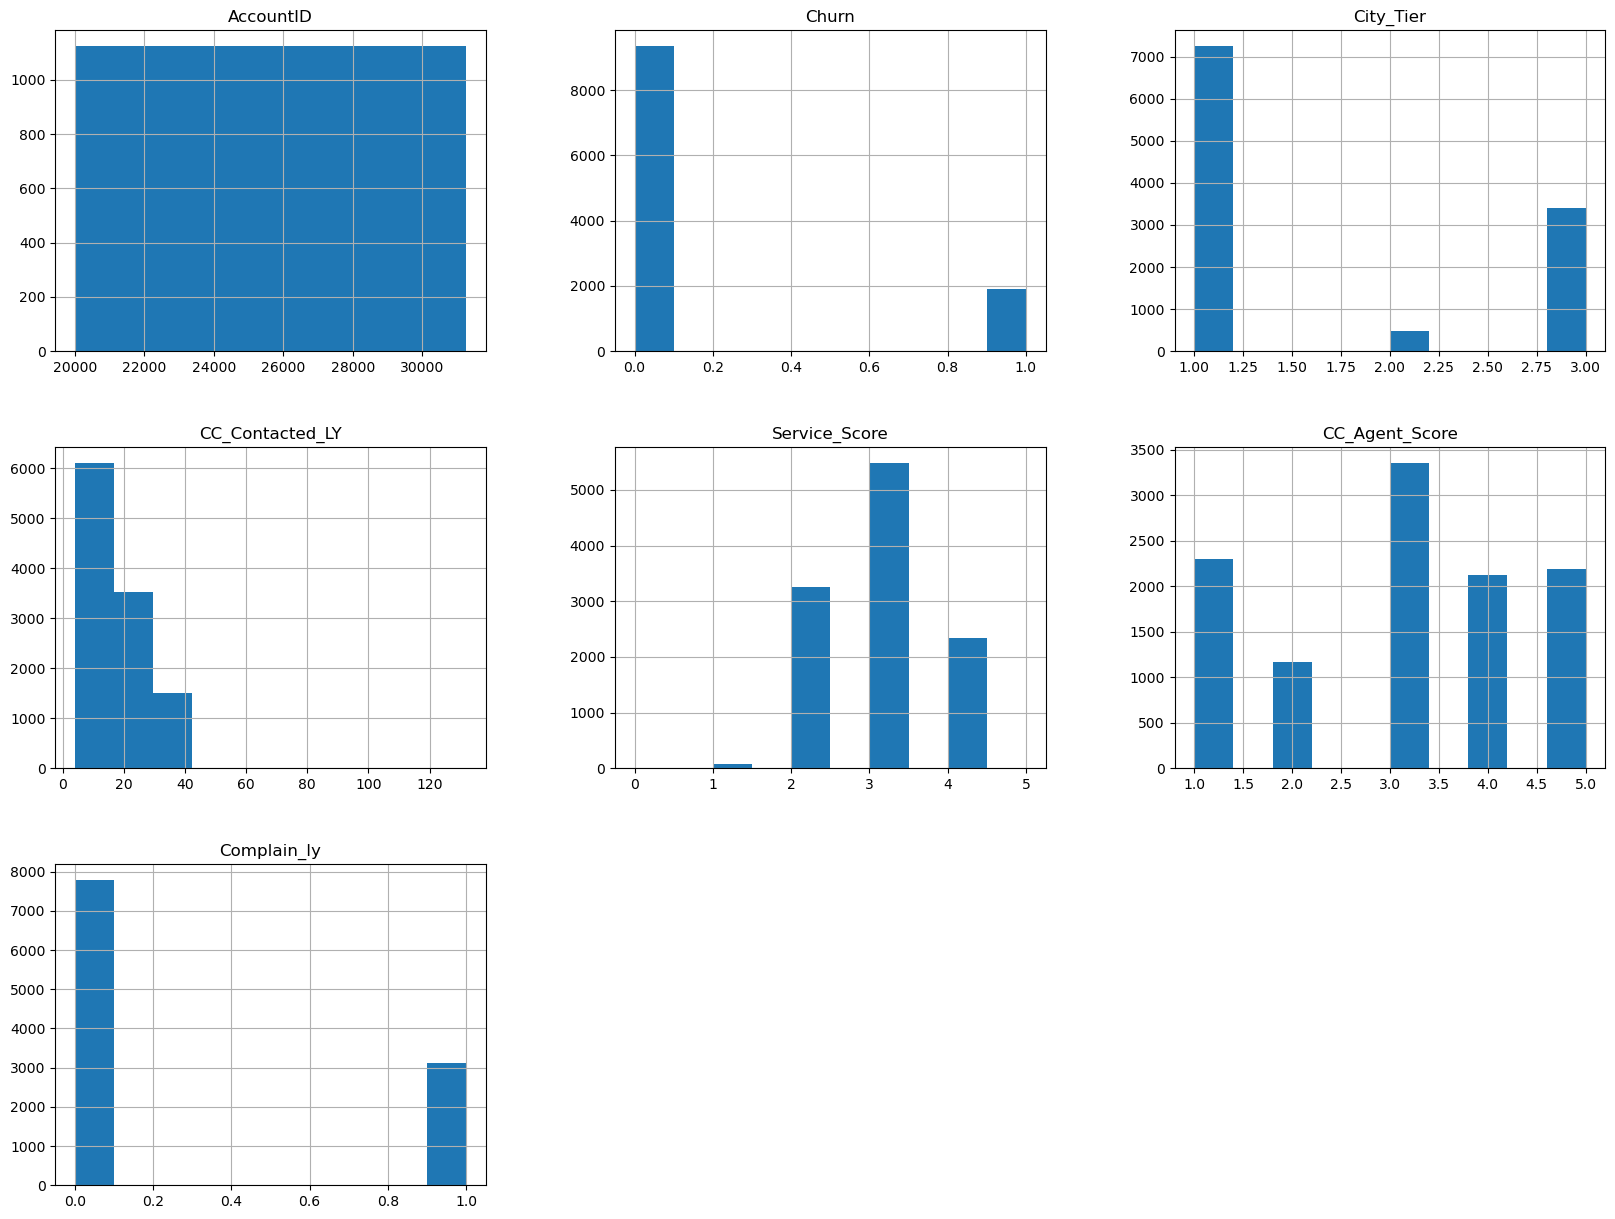

In [104]:
df.hist(figsize=(20,15));

In [105]:
# Renaming columns for better clarity
df.rename(columns={
    "CC_Contacted_LY": "CC_Contacts_LastYear",
    "Account_user_count": "Account_User_Count",
    "account_segment": "Account_Segment",
    "rev_per_month": "Revenue_Per_Month",
    "Complain_ly": "Complaints_LastYear",
    "rev_growth_yoy": "Revenue_Growth_YoY",
    "coupon_used_for_payment": "Coupons_Used",
    "Day_Since_CC_connect": "Days_Since_CC_Contact",
    "cashback": "Cashback_Amount",
    "Login_device": "Login_Device"
}, inplace=True)

# Verifying updated column names
print(df.columns)

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacts_LastYear',
       'Payment', 'Gender', 'Service_Score', 'Account_User_Count',
       'Account_Segment', 'CC_Agent_Score', 'Marital_Status',
       'Revenue_Per_Month', 'Complaints_LastYear', 'Revenue_Growth_YoY',
       'Coupons_Used', 'Days_Since_CC_Contact', 'Cashback_Amount',
       'Login_Device'],
      dtype='object')


In [106]:
print(df.describe(include='all'))

          AccountID         Churn   Tenure     City_Tier  \
count   11260.00000  11260.000000  11158.0  11148.000000   
unique          NaN           NaN     38.0           NaN   
top             NaN           NaN      1.0           NaN   
freq            NaN           NaN   1351.0           NaN   
mean    25629.50000      0.168384      NaN      1.653929   
std      3250.62635      0.374223      NaN      0.915015   
min     20000.00000      0.000000      NaN      1.000000   
25%     22814.75000      0.000000      NaN      1.000000   
50%     25629.50000      0.000000      NaN      1.000000   
75%     28444.25000      0.000000      NaN      3.000000   
max     31259.00000      1.000000      NaN      3.000000   

        CC_Contacts_LastYear     Payment Gender  Service_Score  \
count           11158.000000       11151  11152   11162.000000   
unique                   NaN           5      4            NaN   
top                      NaN  Debit Card   Male            NaN   
freq           

In [107]:
df["Tenure"] = pd.to_numeric(df["Tenure"], errors="coerce")

# Drop NaN values
df = df.dropna()

In [108]:
df["Coupons_Used"] = pd.to_numeric(df["Coupons_Used"], errors="coerce")

# Drop NaN values
df = df.dropna()

In [109]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Column: {col} | Unique Values: {unique_vals}")

Column: AccountID | Unique Values: [20000 20001 20003 ... 31257 31258 31259]
Column: Churn | Unique Values: [1 0]
Column: Tenure | Unique Values: [ 4.  0.  2. 13. 11.  9. 99. 20. 14.  8. 26. 18.  5. 30.  1. 23.  3. 29.
  7. 28. 24. 16. 10. 15. 22. 27.  6. 25. 12. 19. 21. 17. 60. 31. 61. 51.]
Column: City_Tier | Unique Values: [3. 1. 2.]
Column: CC_Contacts_LastYear | Unique Values: [  6.   8.  15.  12.  11.   9.  31.  13.  29.  28.  14.  10.  25.  27.
  17.  20.  23.  18.  33.  26.  19.  35.  24.  16.  32.  22.  30.  21.
  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41. 132.
  43. 129.]
Column: Payment | Unique Values: ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']
Column: Gender | Unique Values: ['Female' 'Male' 'M' 'F']
Column: Service_Score | Unique Values: [3. 2. 1. 0. 4. 5.]
Column: Account_User_Count | Unique Values: [3 4 5 2 '@' 1 6]
Column: Account_Segment | Unique Values: ['Super' 'Regular Plus' 'HNI' 'Regular' 'Super Plus' 'Super +' 'Regular 

In [110]:
df["Account_User_Count"] = pd.to_numeric(df["Account_User_Count"], errors="coerce")

# Drop NaN values
df = df.dropna()

In [111]:
df["Days_Since_CC_Contact"] = pd.to_numeric(df["Days_Since_CC_Contact"], errors="coerce")

# Drop NaN values
df = df.dropna()

In [112]:
df["Revenue_Growth_YoY"] = pd.to_numeric(df["Revenue_Growth_YoY"], errors="coerce")

# Drop NaN values
df = df.dropna()

In [113]:
# Define the invalid entries
invalid_entries = ['#', '@', '+', '$', '*']

# Replace invalid entries with NaN for all relevant columns
columns_to_clean = ['Tenure', 'Account_User_Count', 'Revenue_Per_Month', 'Revenue_Growth_YoY', 'Coupons_Used', 'Days_Since_CC_Contact','Cashback_Amount']

for column in columns_to_clean:
    df[column] = df[column].replace(invalid_entries, np.nan)

In [114]:
# Remove the "$" symbol and convert to numeric
df[column] = df[column].replace({'\$': ''}, regex=True)

# Convert to numeric, coercing errors if any invalid values remain
df[column] = pd.to_numeric(df[column], errors='coerce')

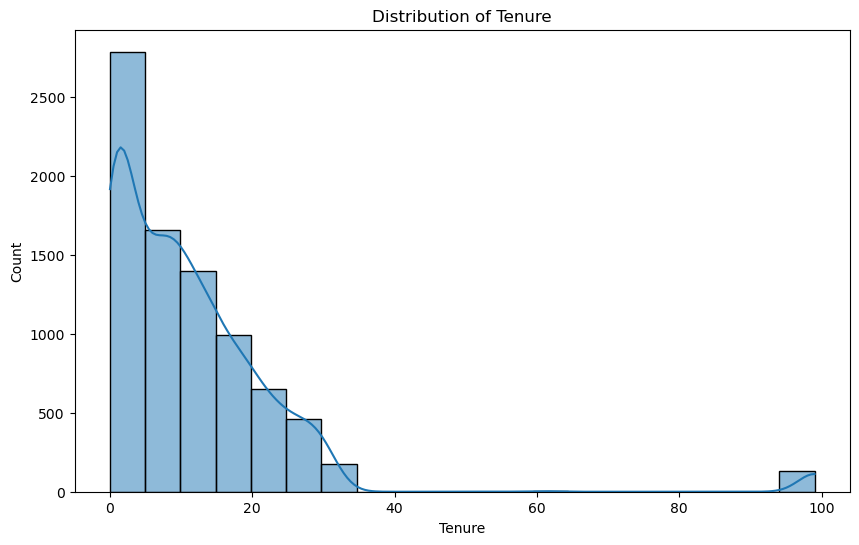

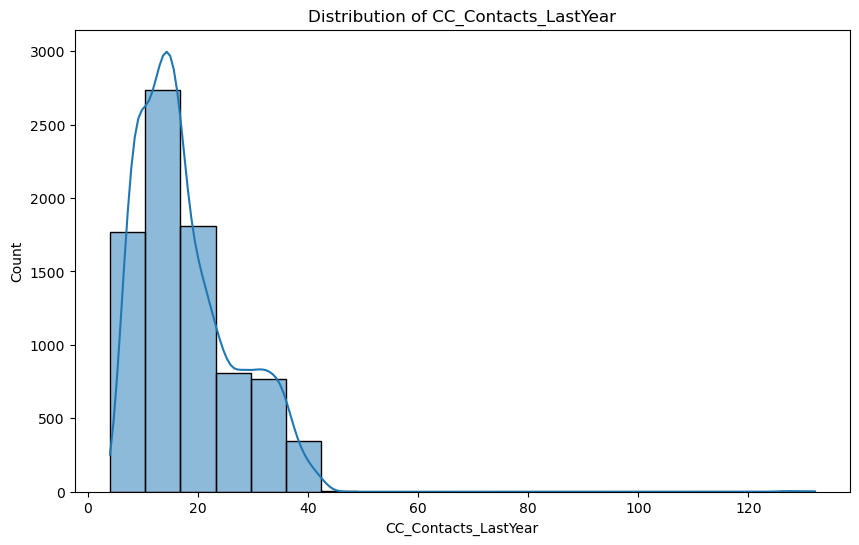

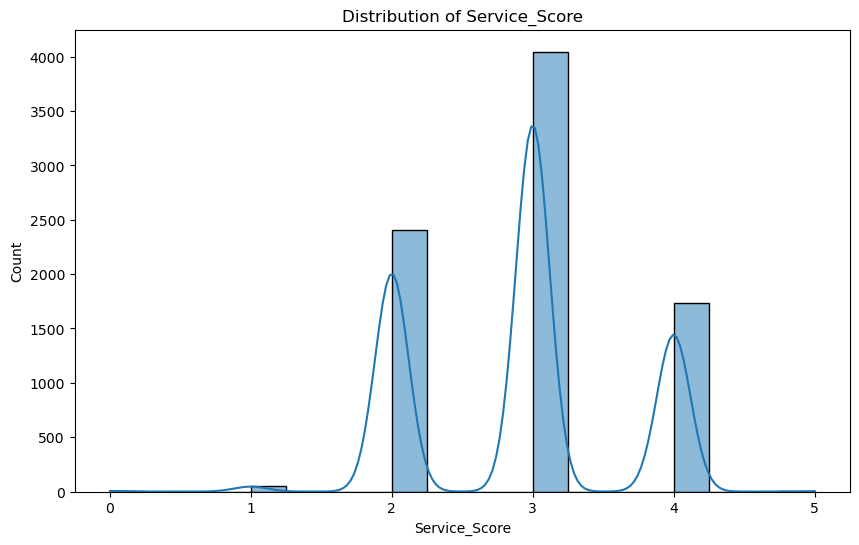

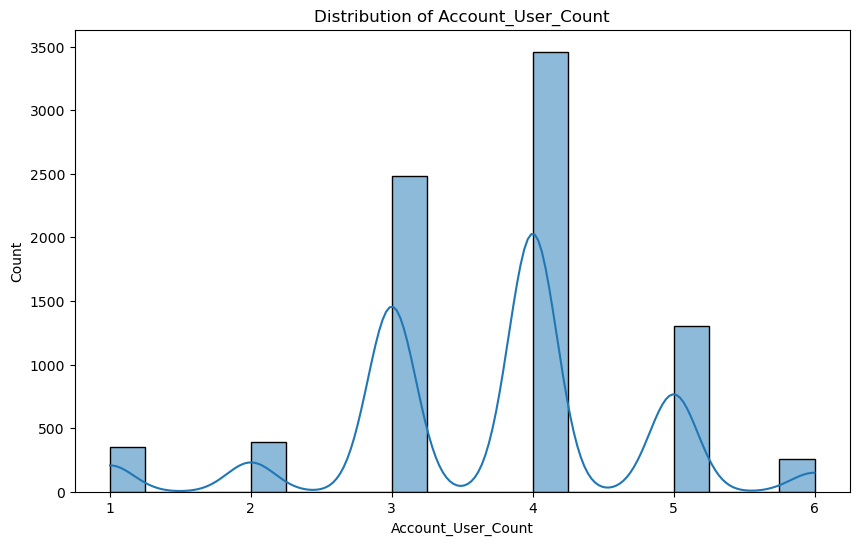

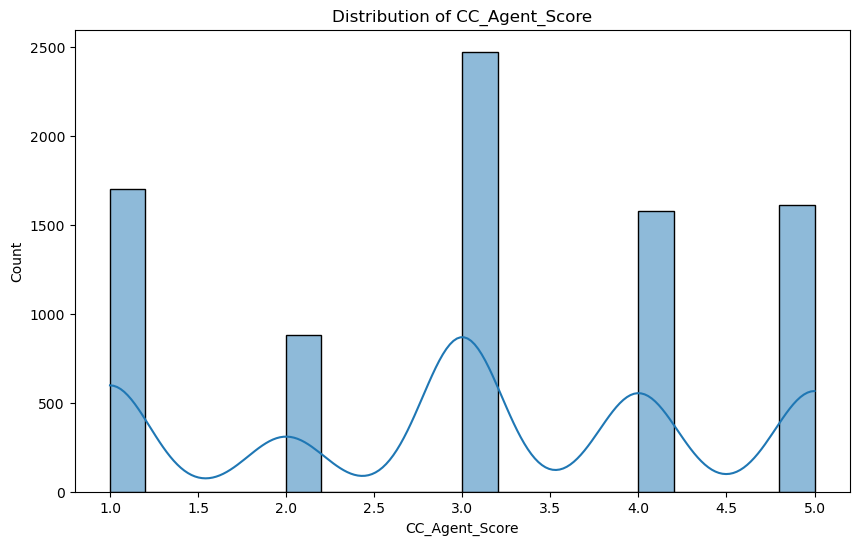

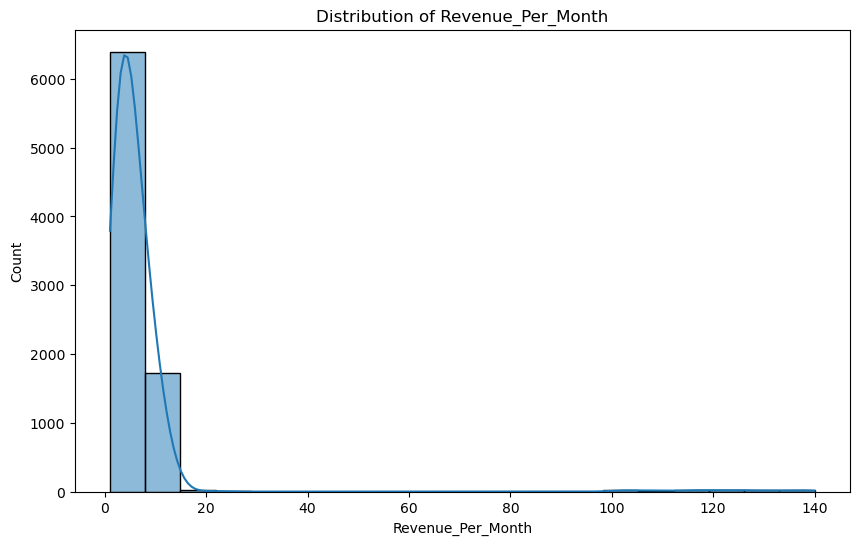

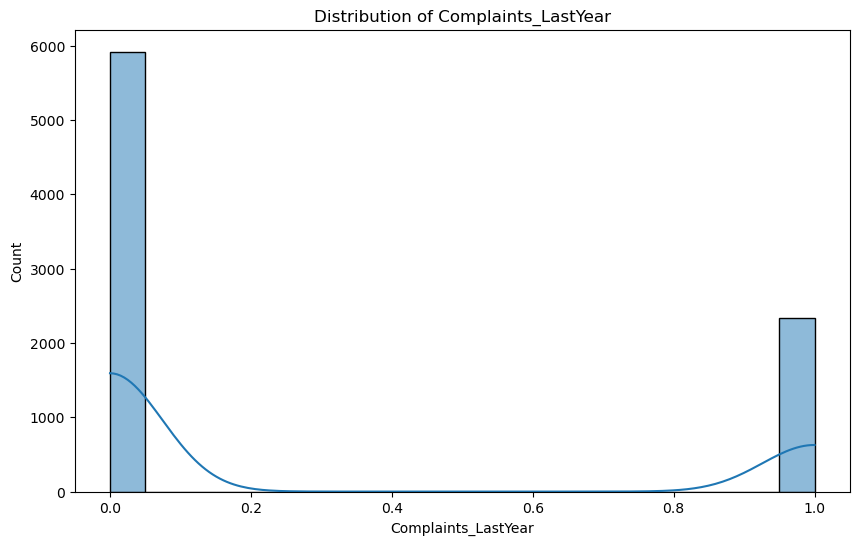

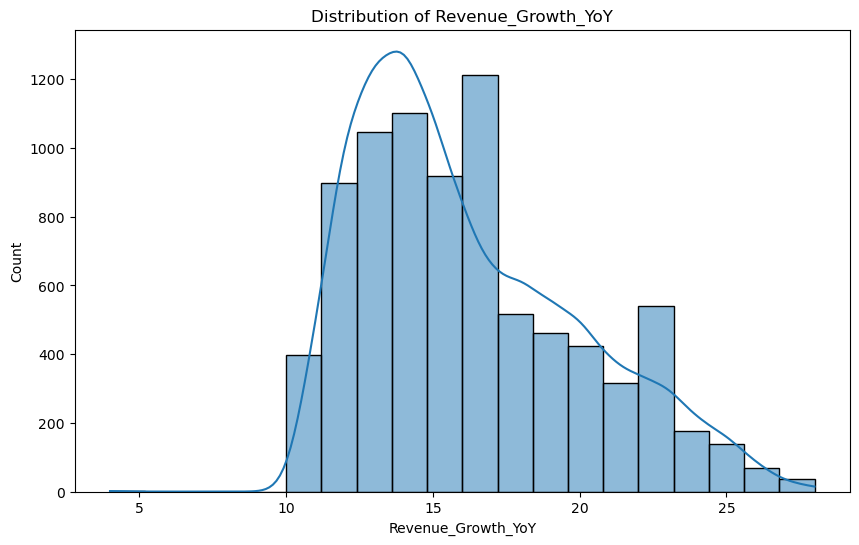

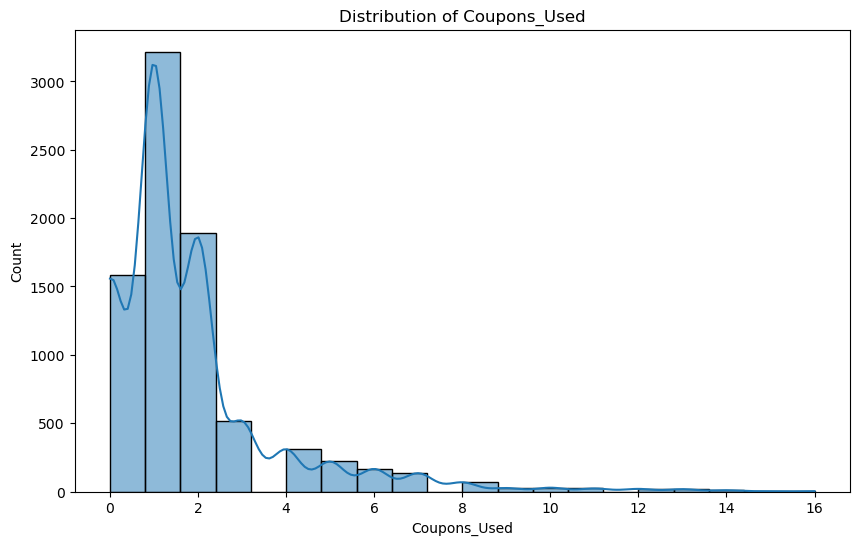

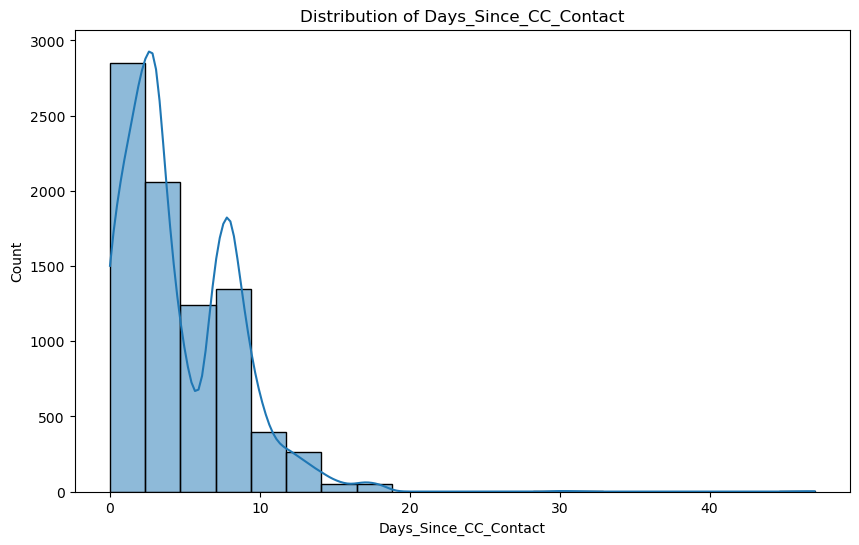

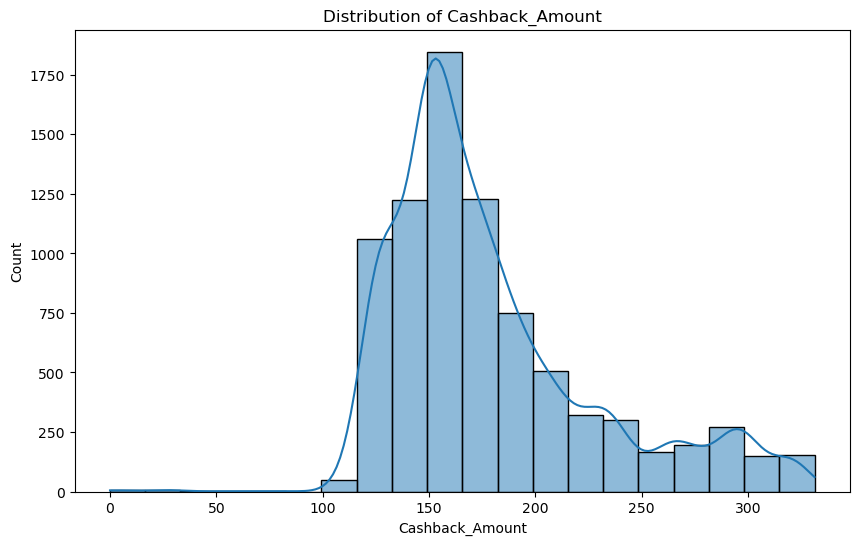

In [115]:
continuous_columns = ['Tenure', 'CC_Contacts_LastYear', 'Service_Score', 'Account_User_Count', 
                      'CC_Agent_Score', 'Revenue_Per_Month', 'Complaints_LastYear', 
                      'Revenue_Growth_YoY', 'Coupons_Used', 'Days_Since_CC_Contact', 'Cashback_Amount']

# Plotting distribution for continuous variables
for column in continuous_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

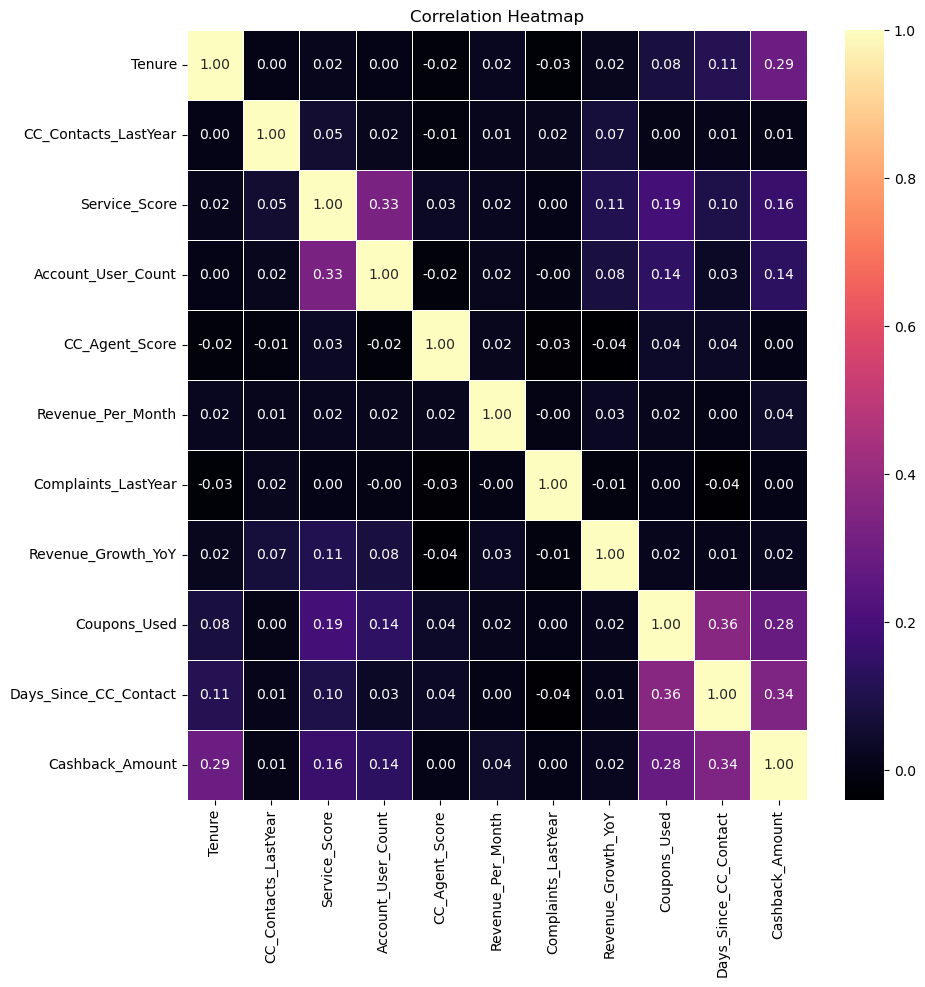

In [116]:
corr = df[continuous_columns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='magma', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

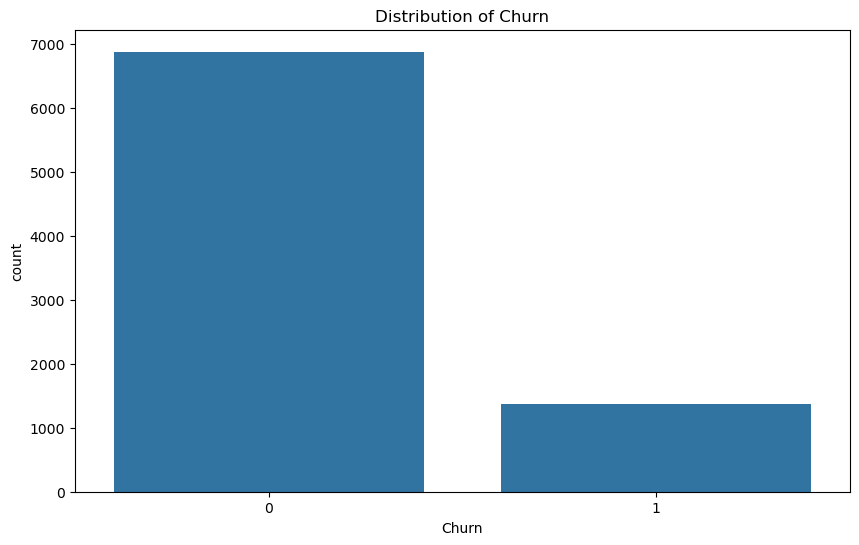

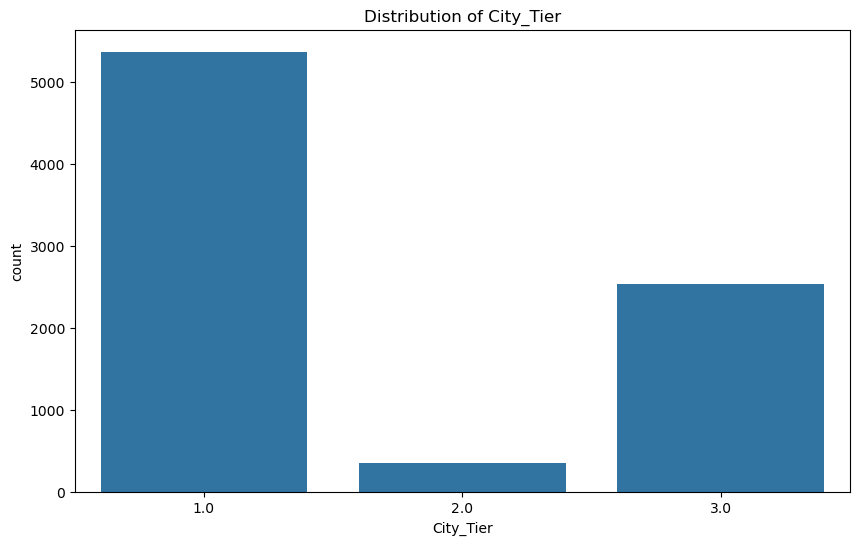

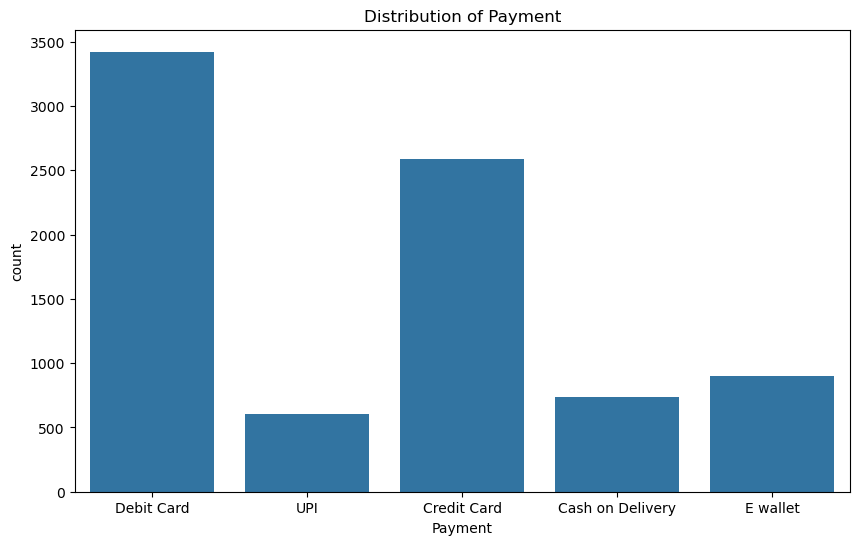

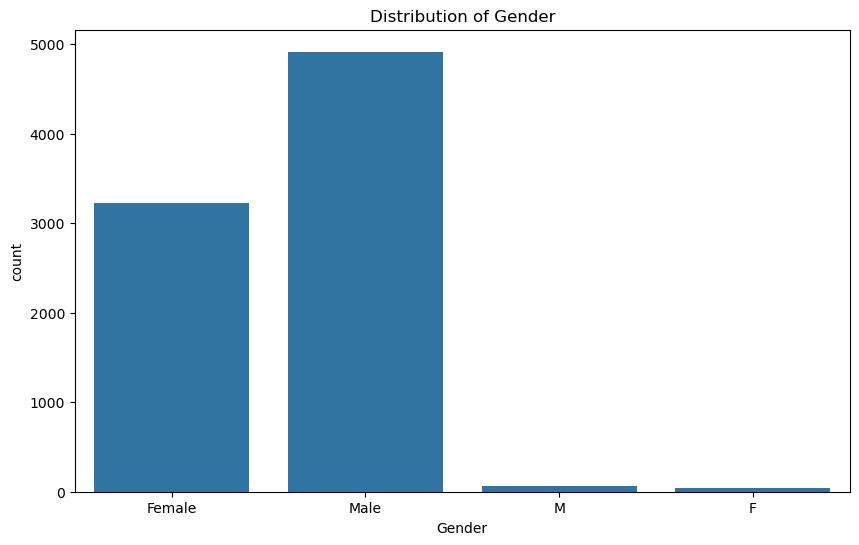

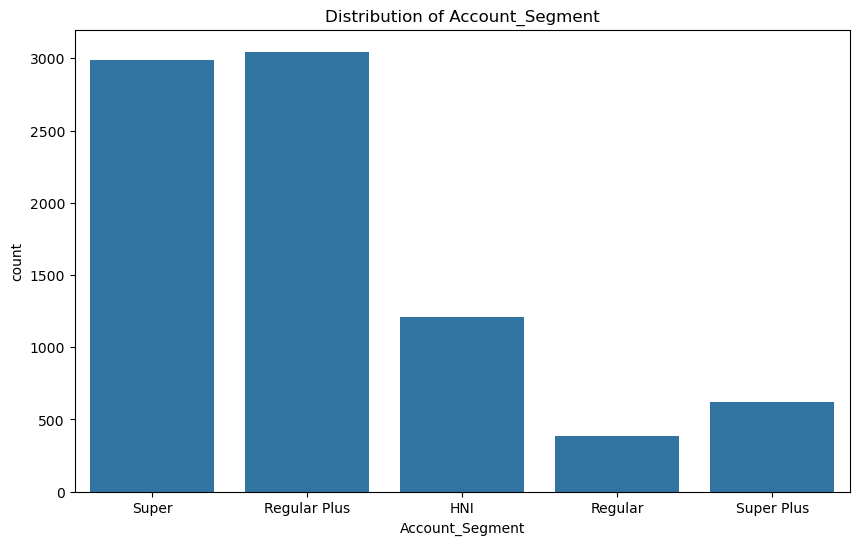

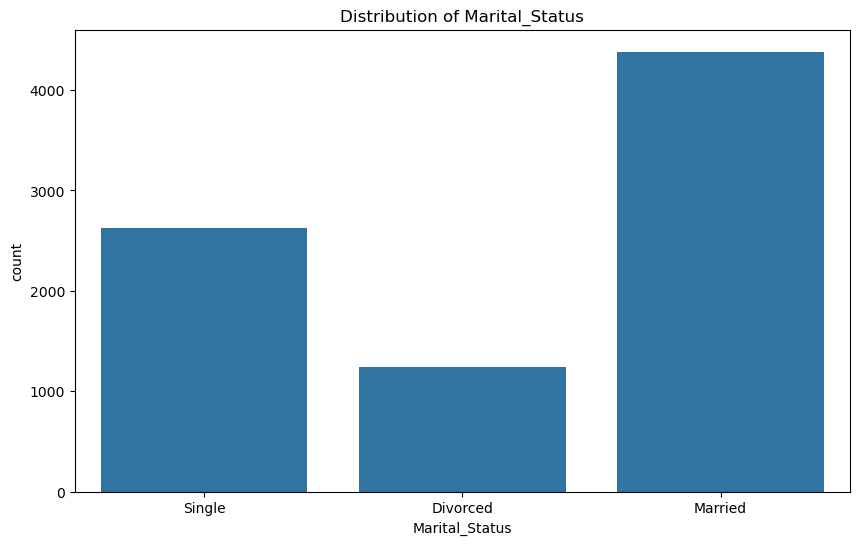

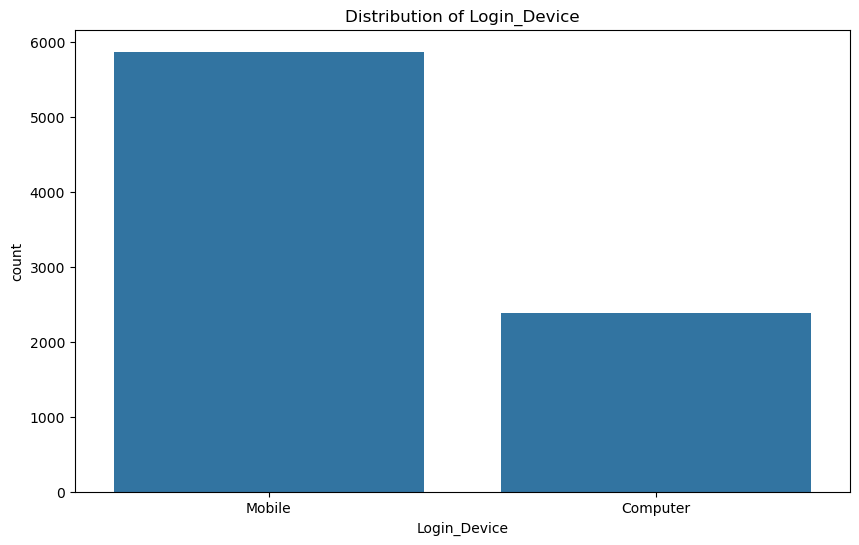

In [117]:
categorical_columns = ['Churn', 'City_Tier', 'Payment', 'Gender', 'Account_Segment', 'Marital_Status', 'Login_Device']

for columns in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[columns])
    plt.title(f'Distribution of {columns}')
    plt.show()

In [118]:
for columns in continuous_columns:
    if columns in df.columns:
        non_numeric_count = df[columns].apply(pd.to_numeric, errors='coerce').isna().sum()
        if non_numeric_count > 0:
            print(f"Column '{columns}' has {non_numeric_count} non-numeric values.")
    else:
        print(f"Column '{columns}' does not exist in the dataframe.")

Column 'Cashback_Amount' has 1 non-numeric values.


In [119]:
for columns in continuous_columns:
    if columns in df.columns:
        df[columns] = pd.to_numeric(df[columns], errors='coerce')  # Convert non-numeric to NaN
        df[columns].fillna(df[columns].median(), inplace=True)

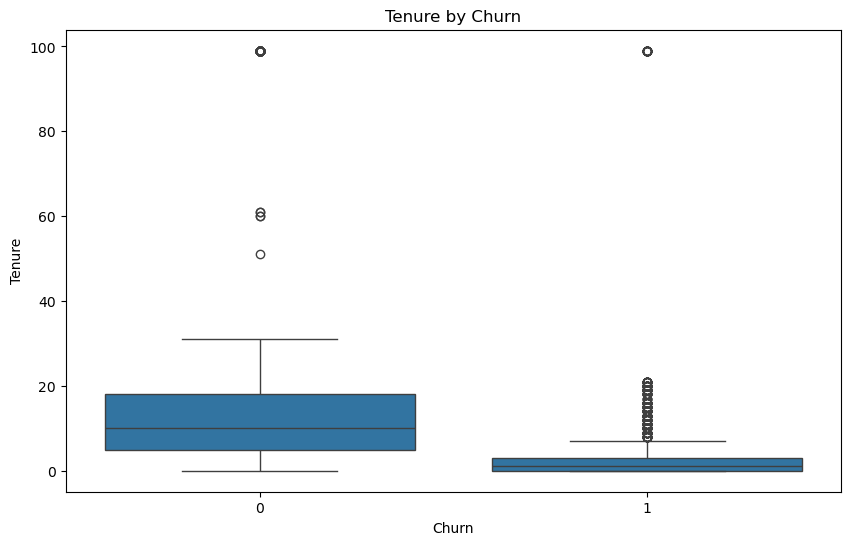

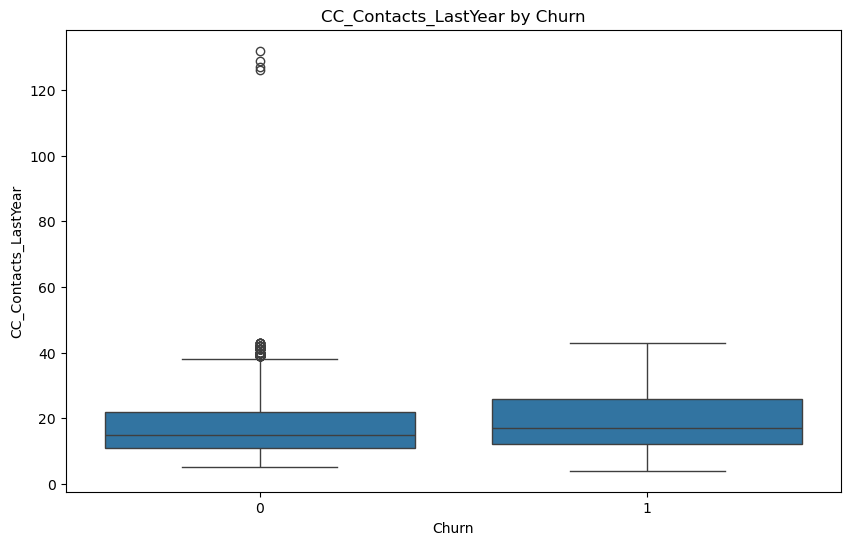

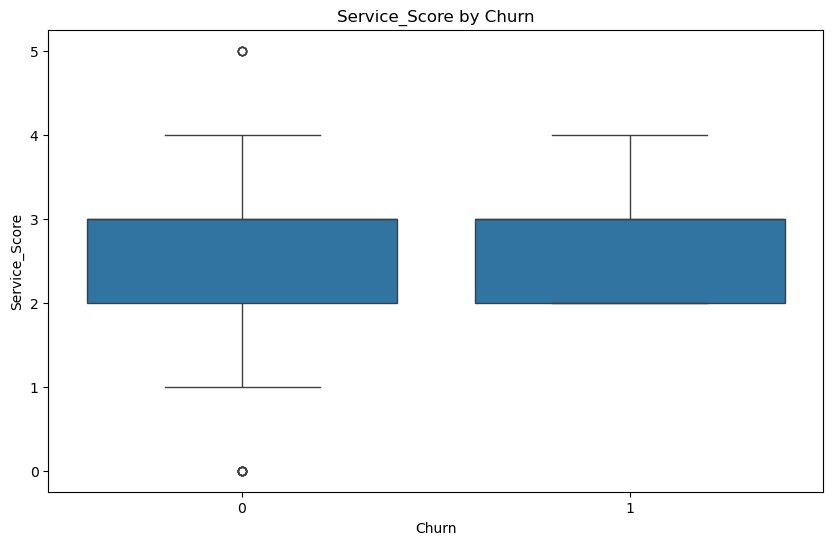

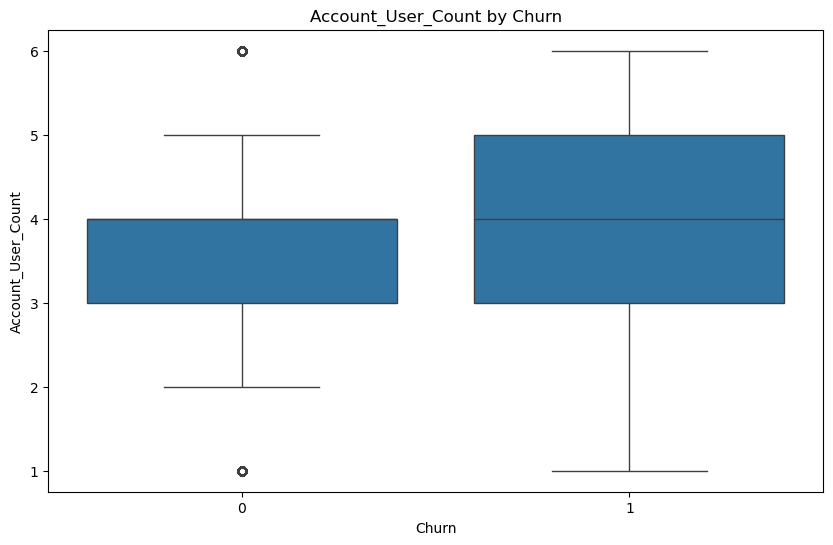

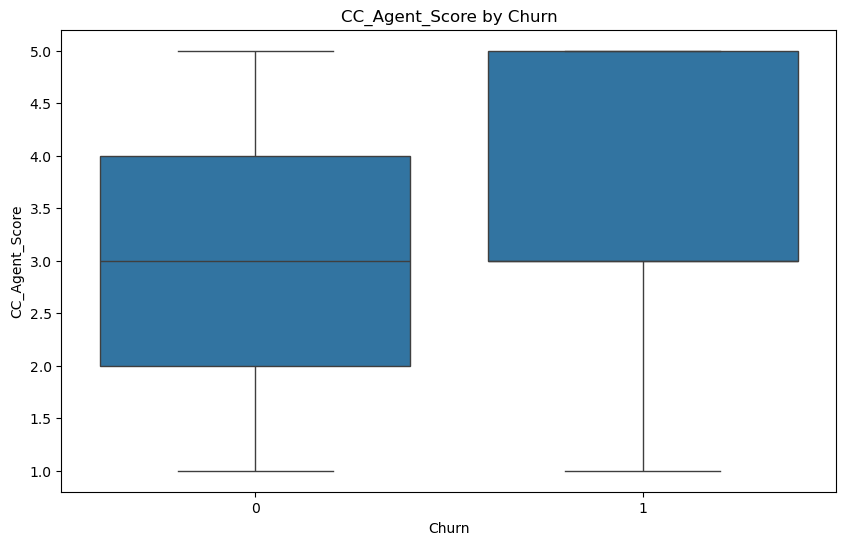

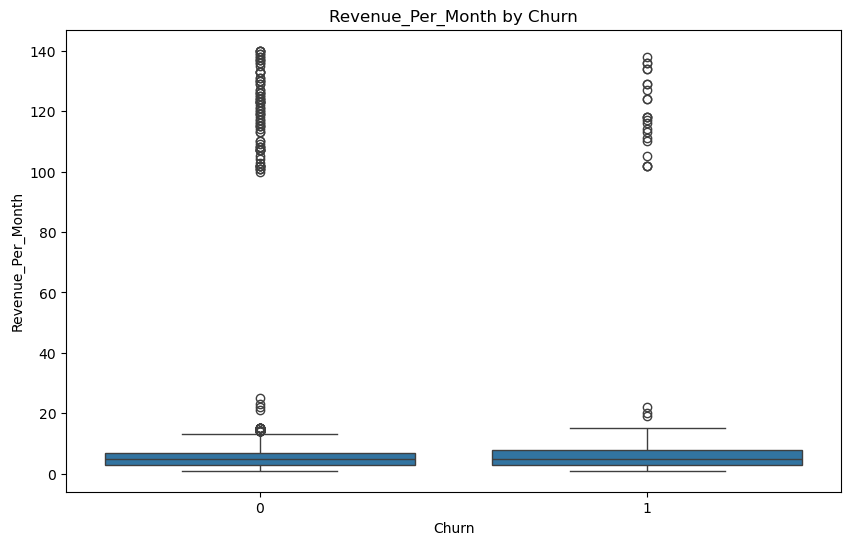

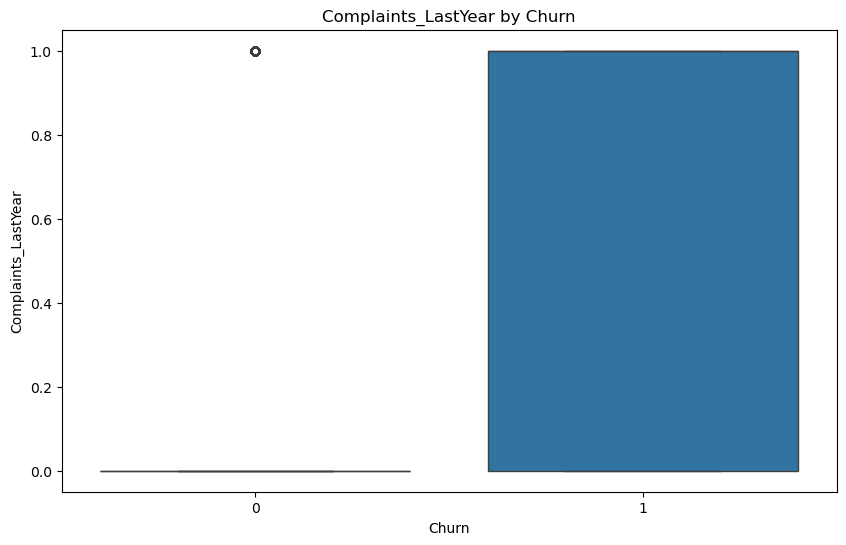

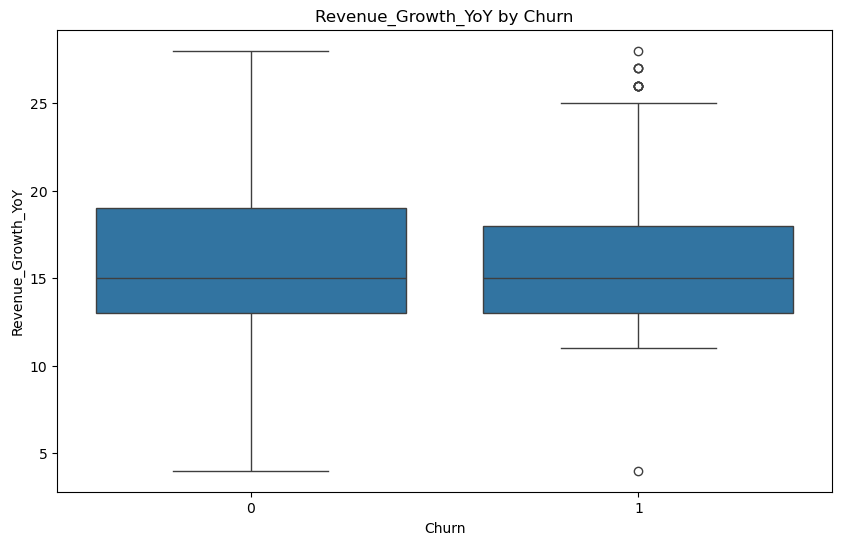

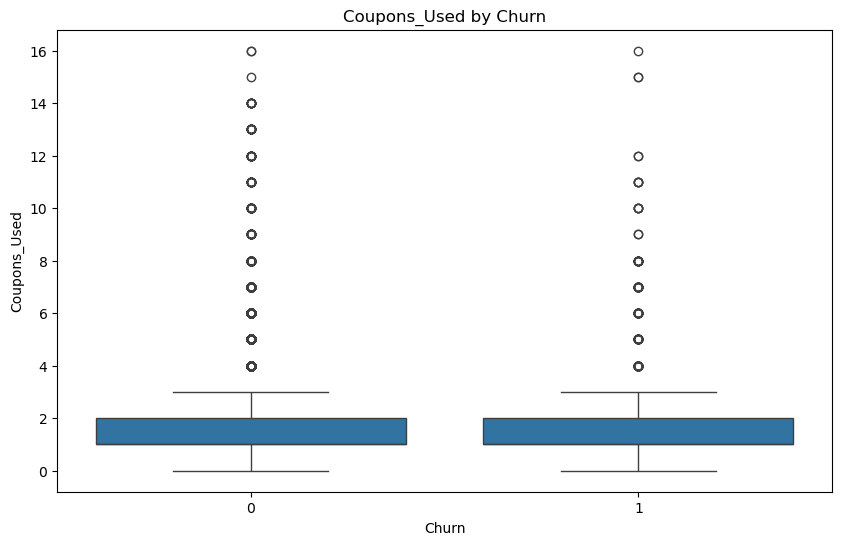

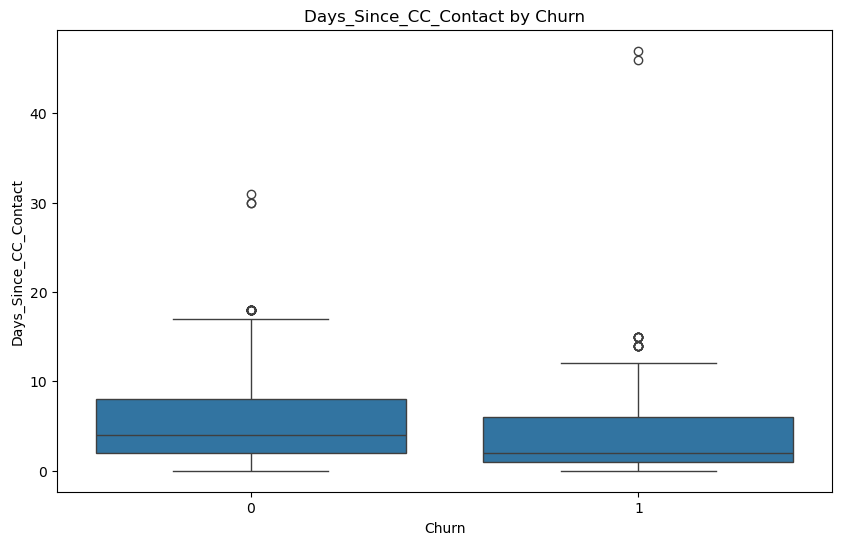

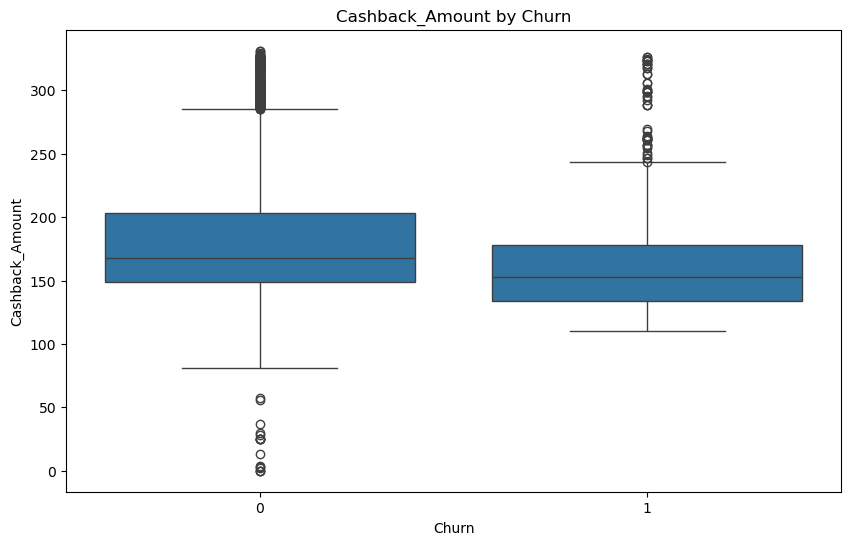

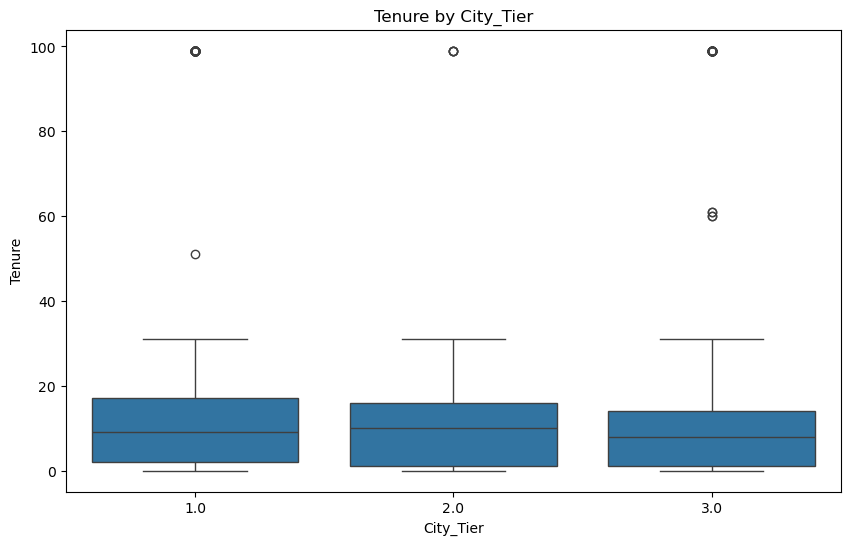

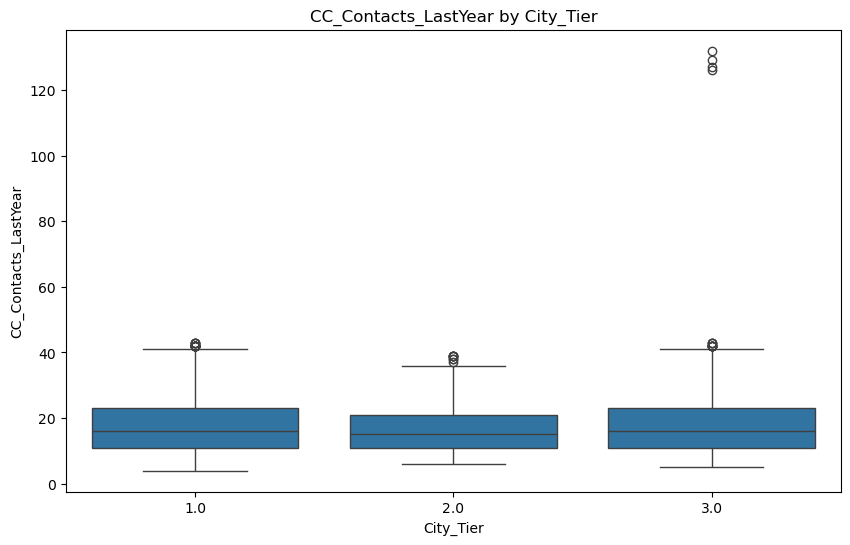

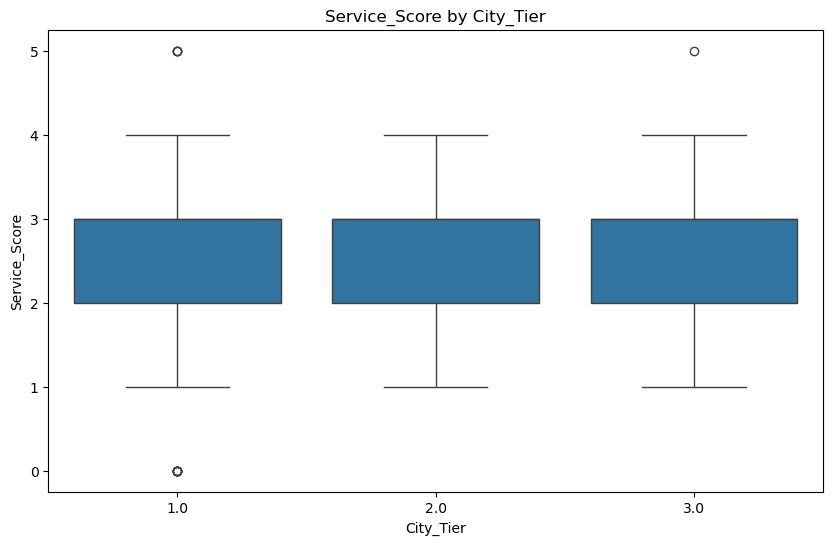

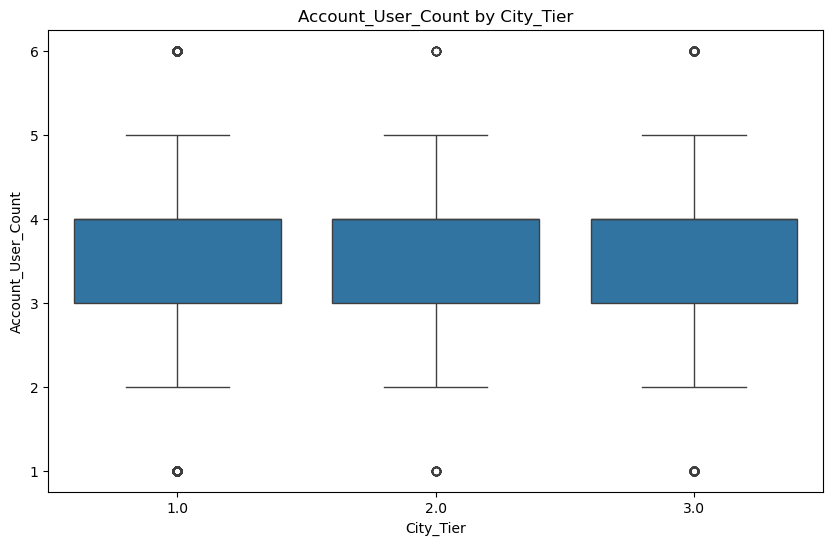

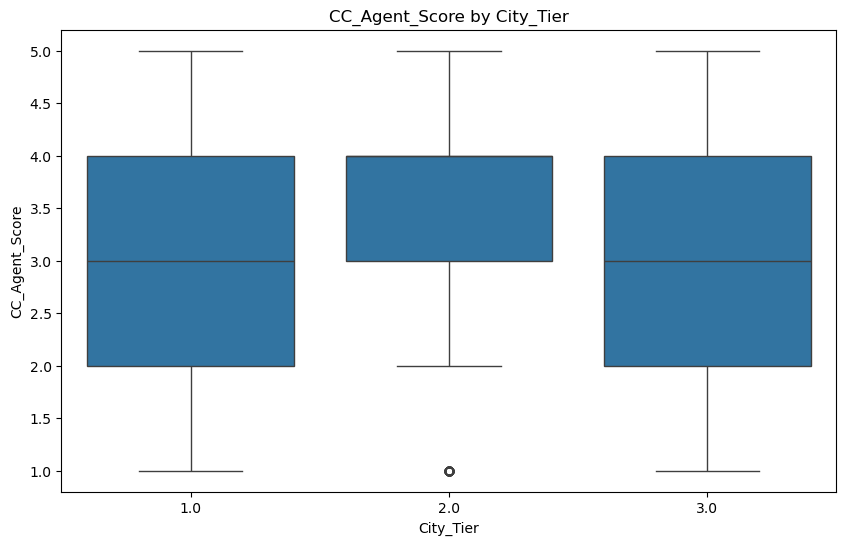

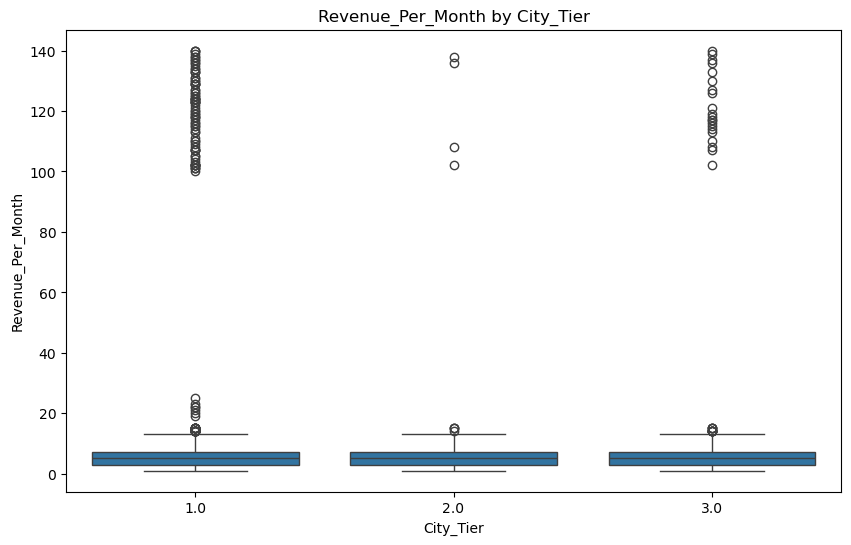

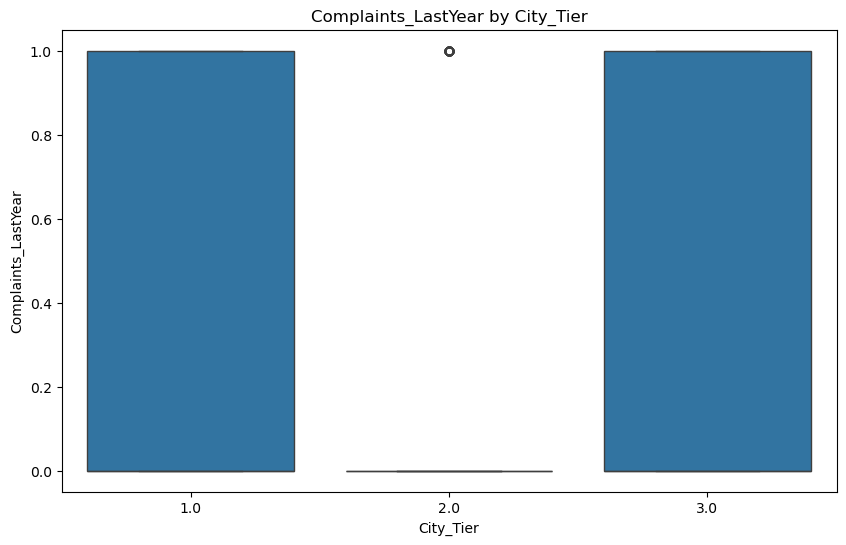

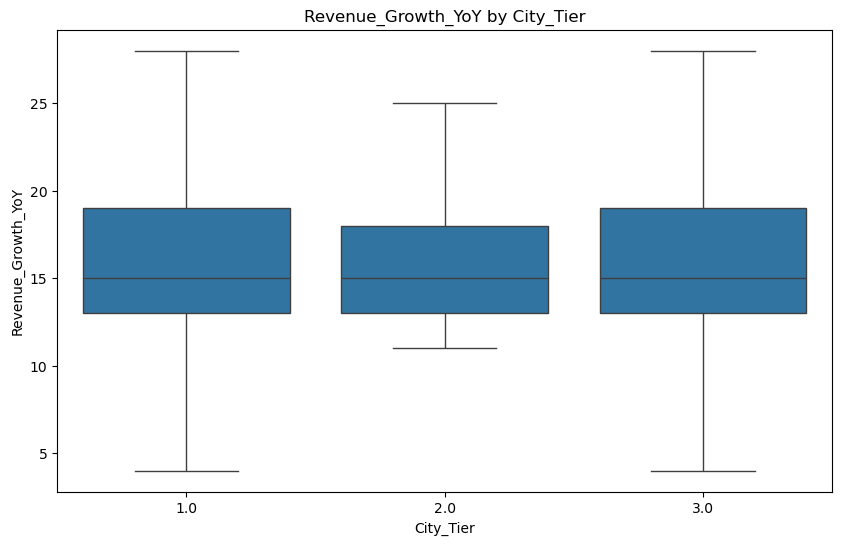

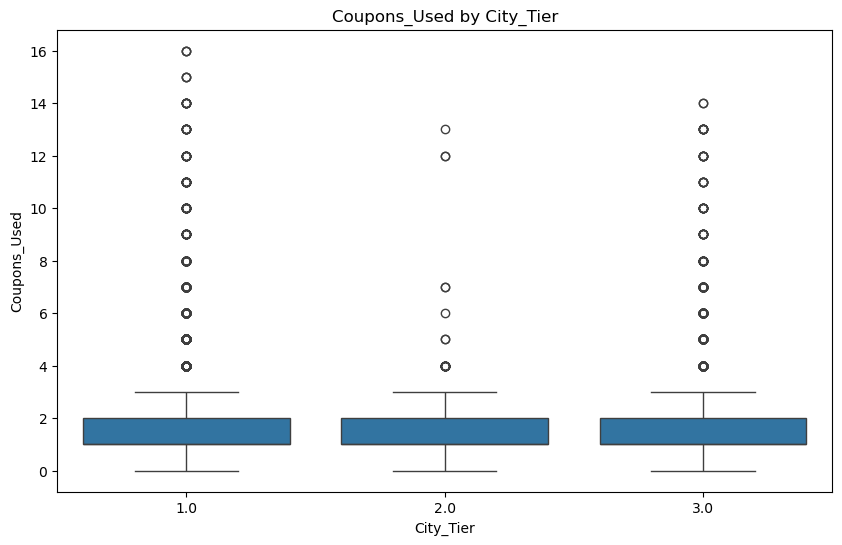

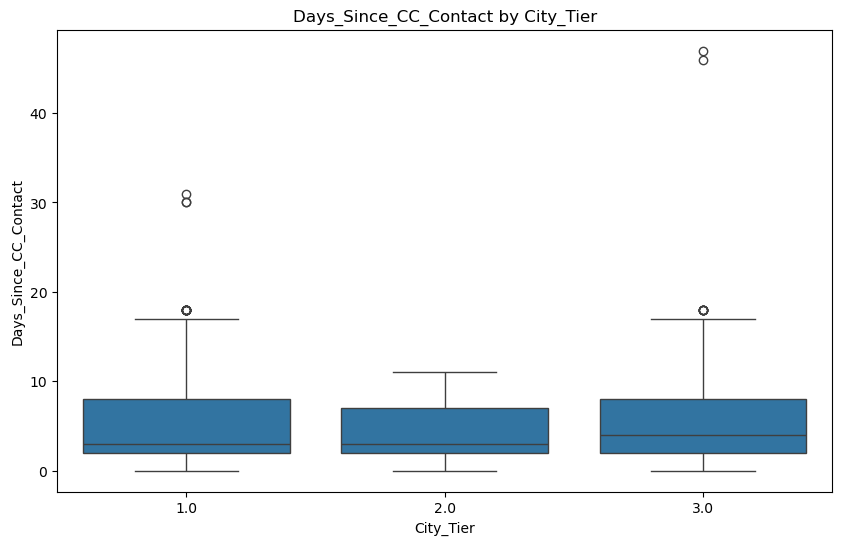

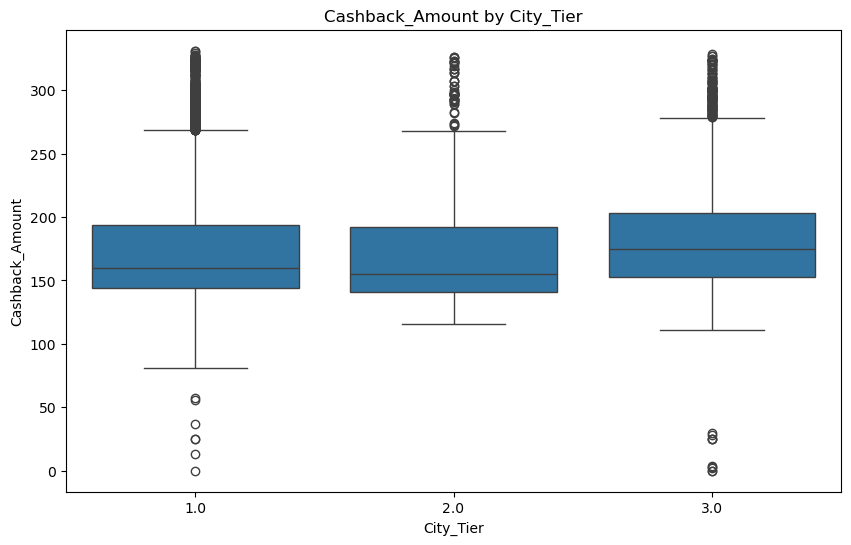

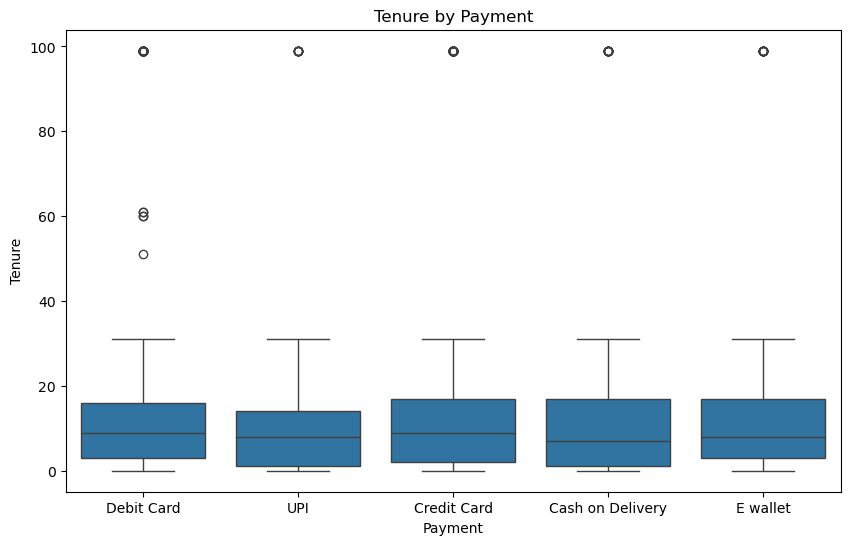

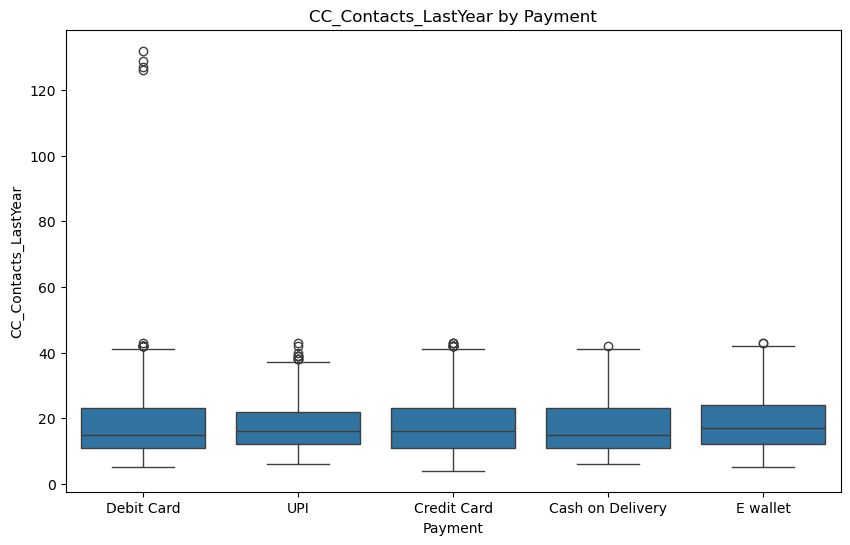

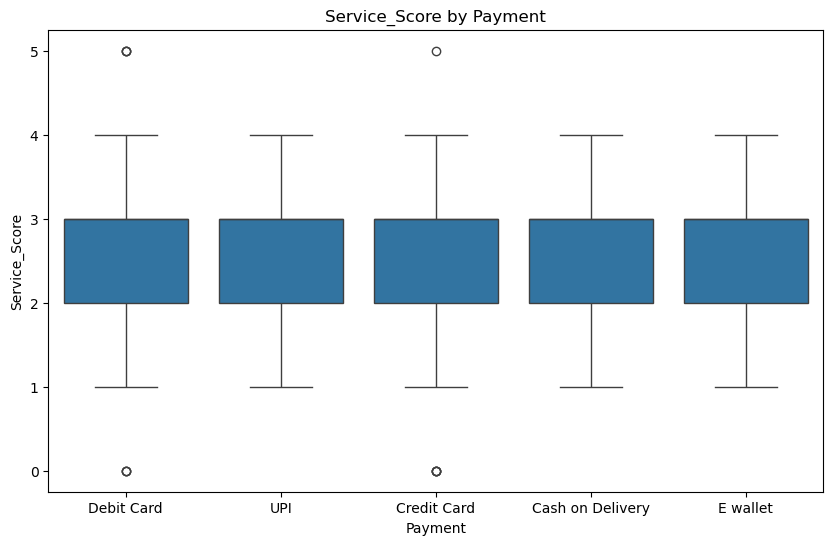

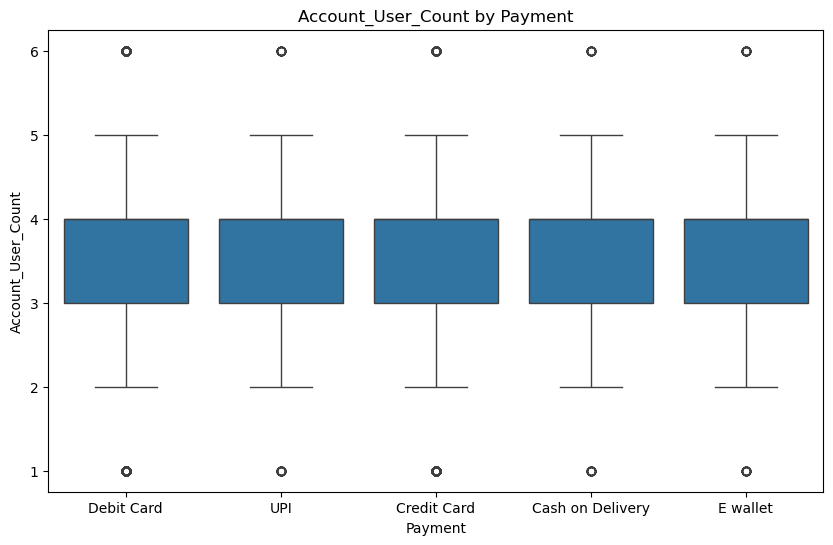

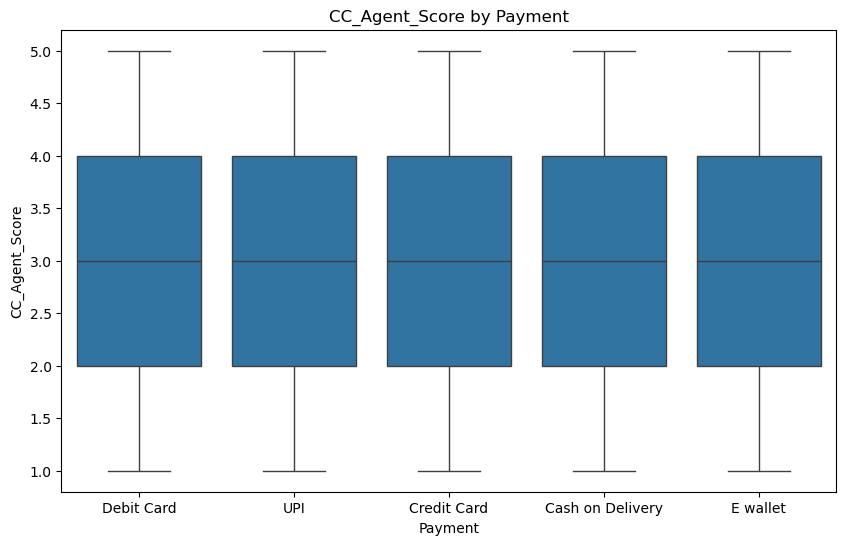

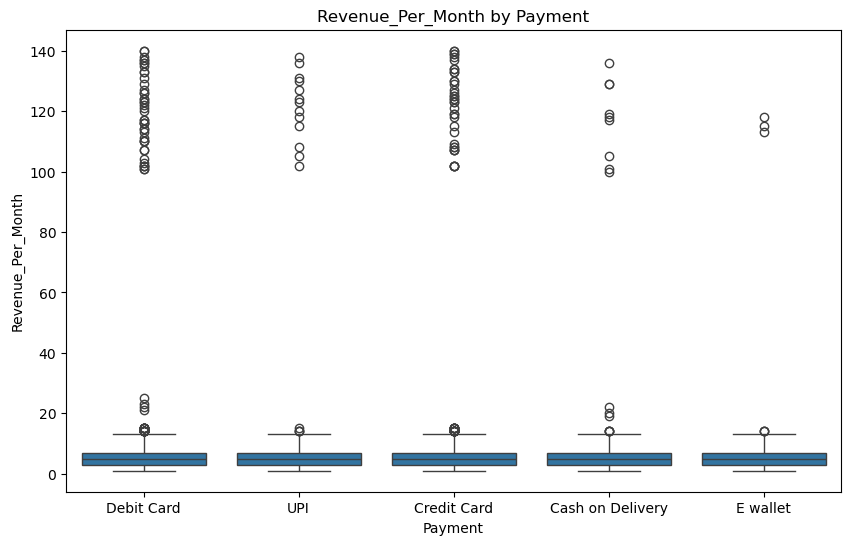

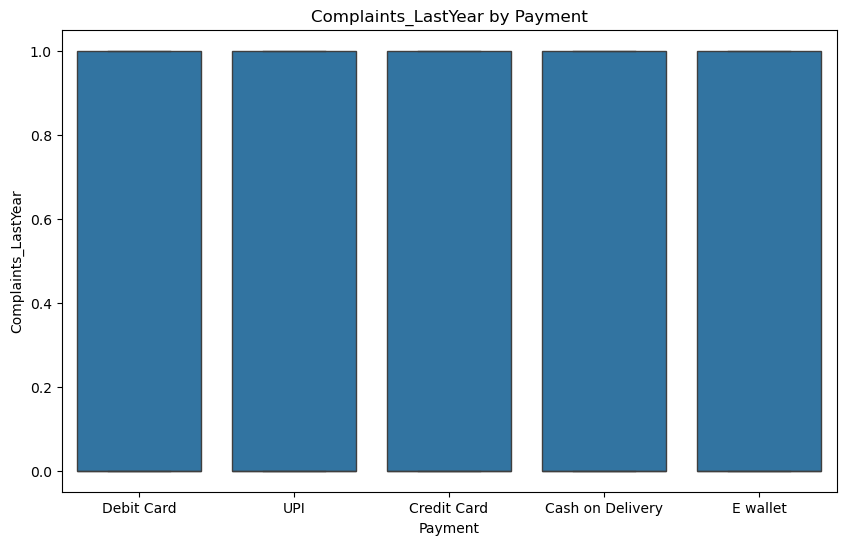

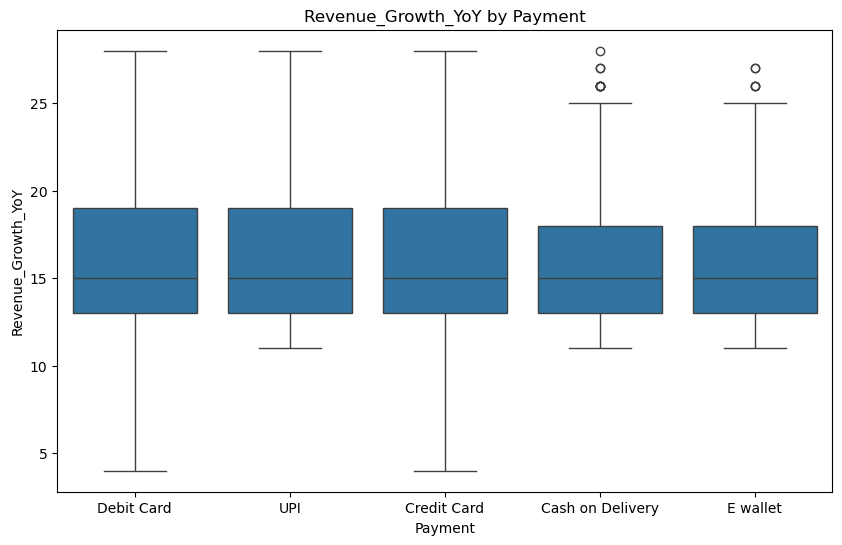

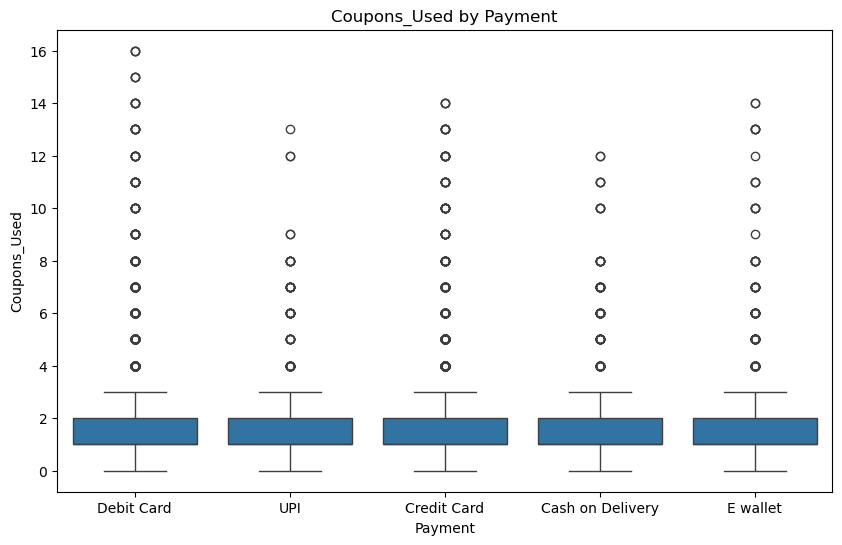

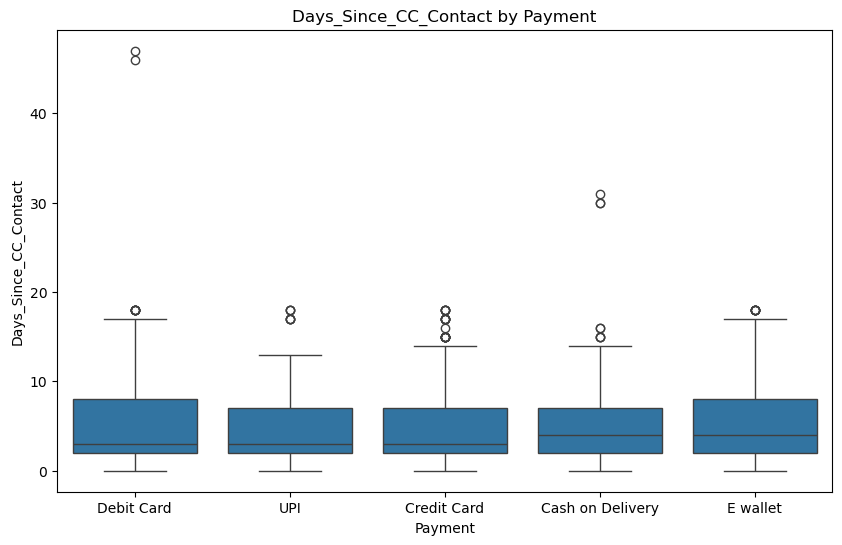

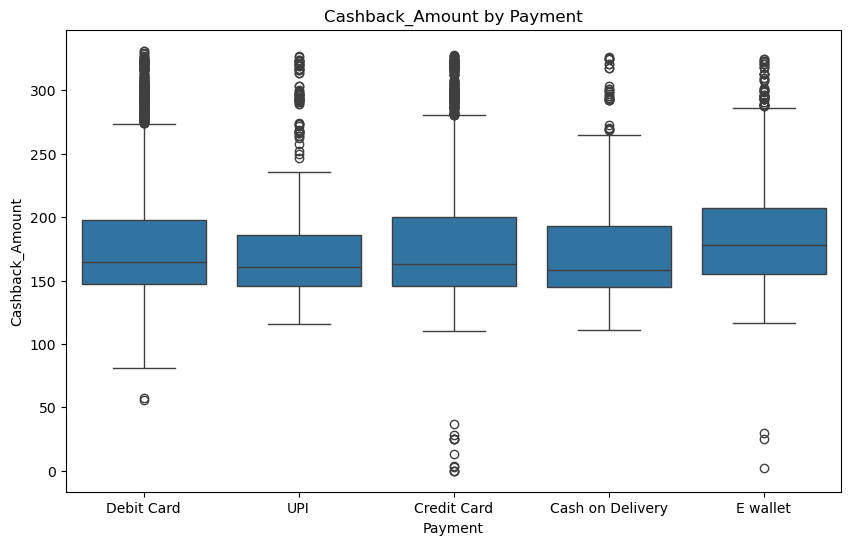

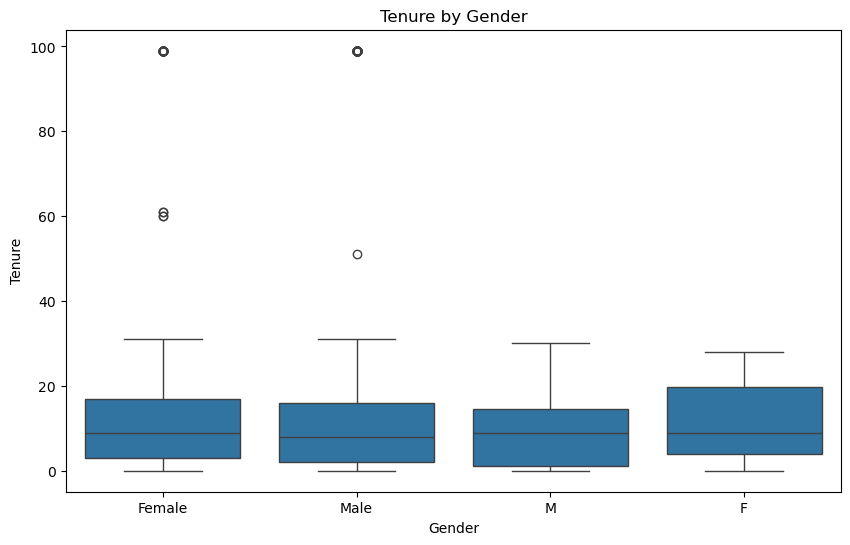

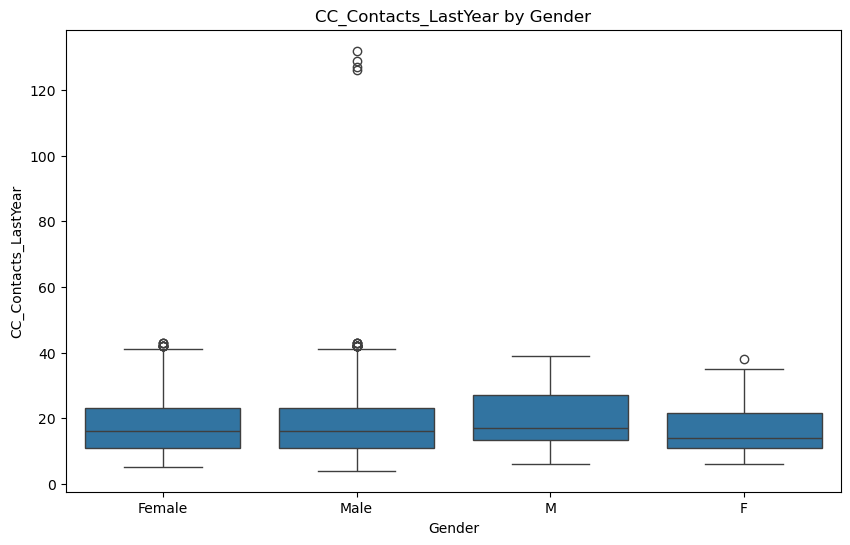

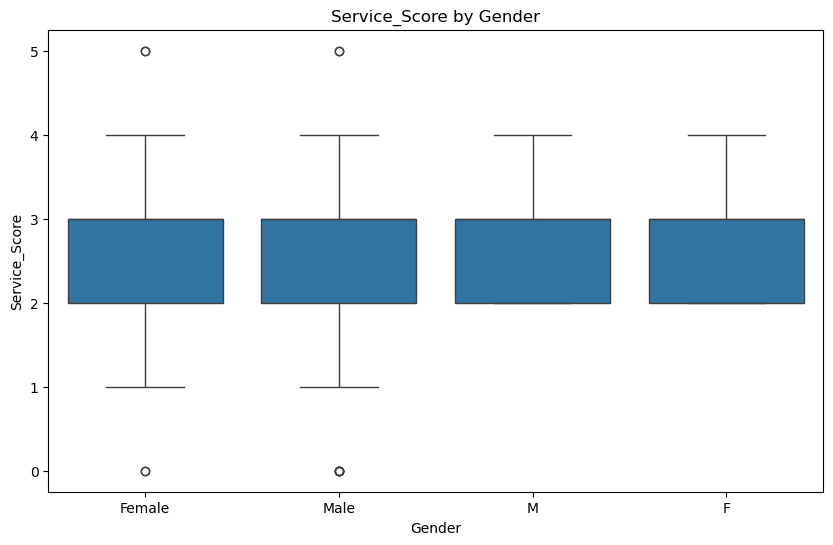

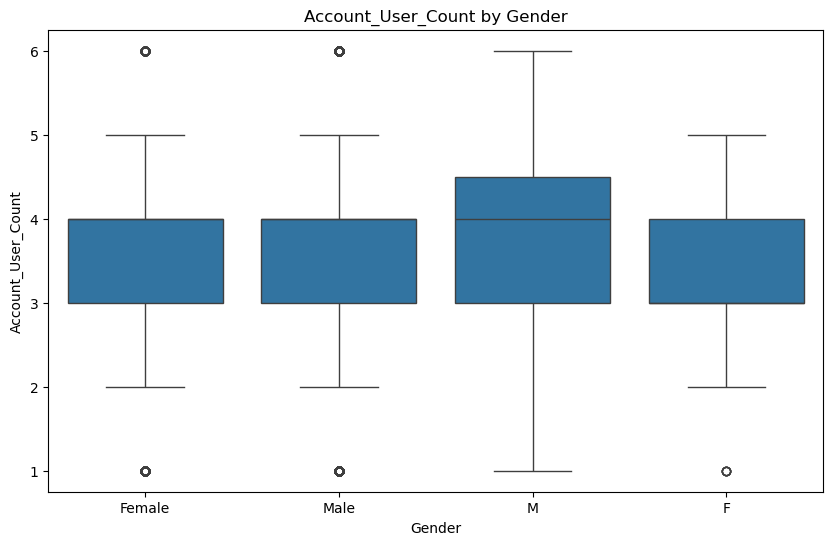

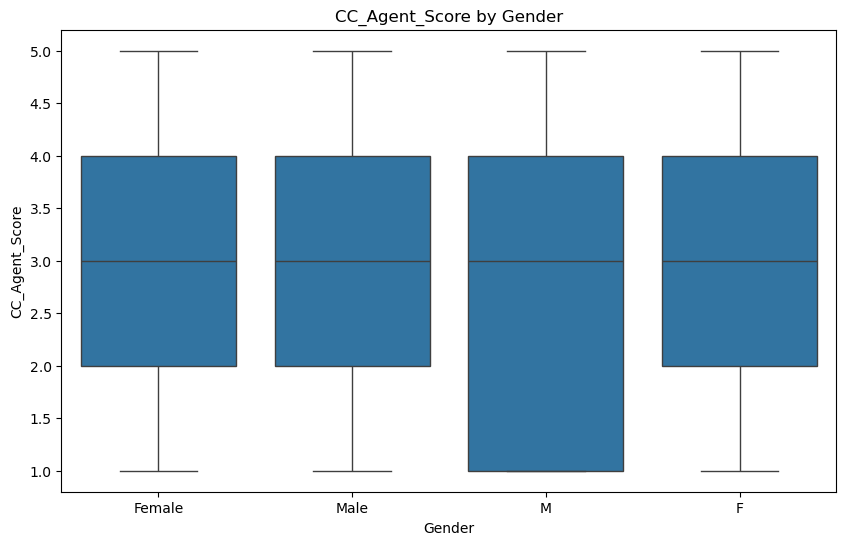

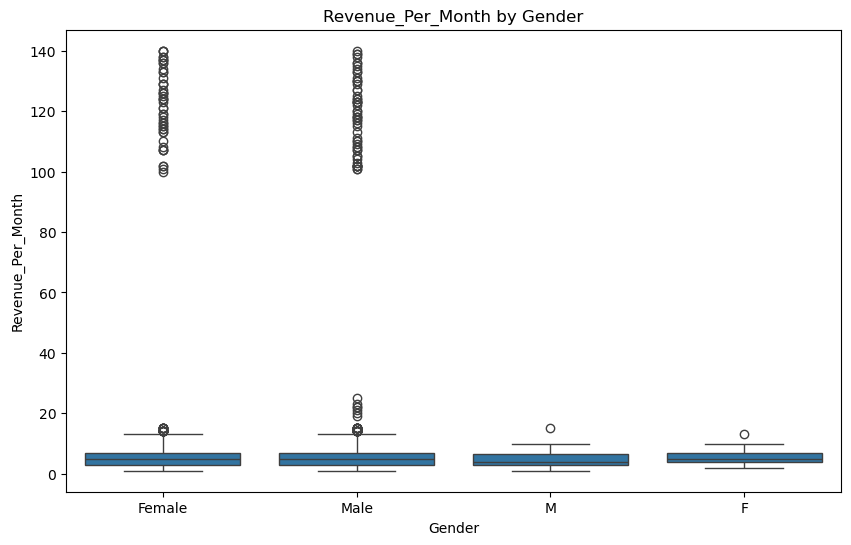

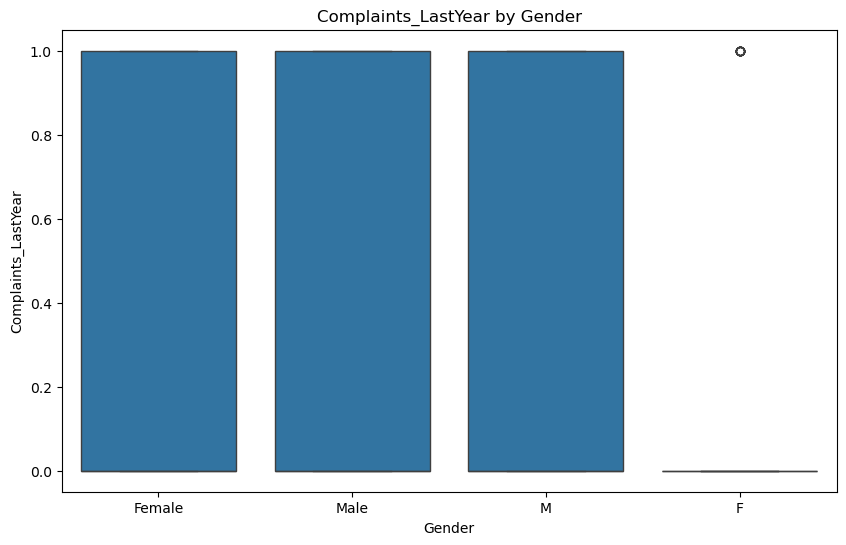

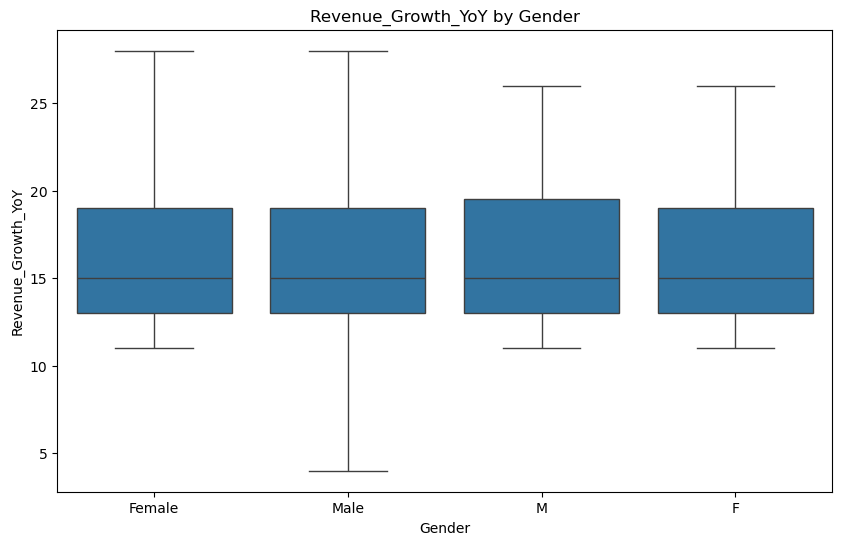

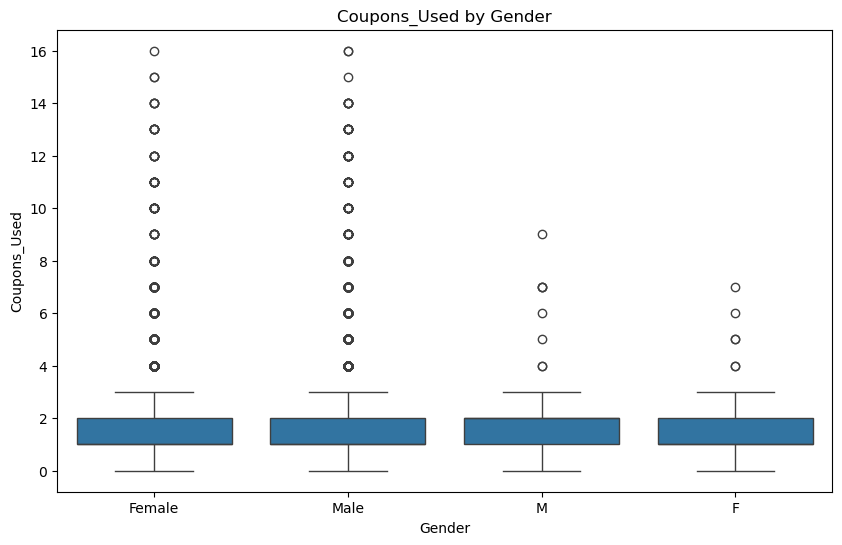

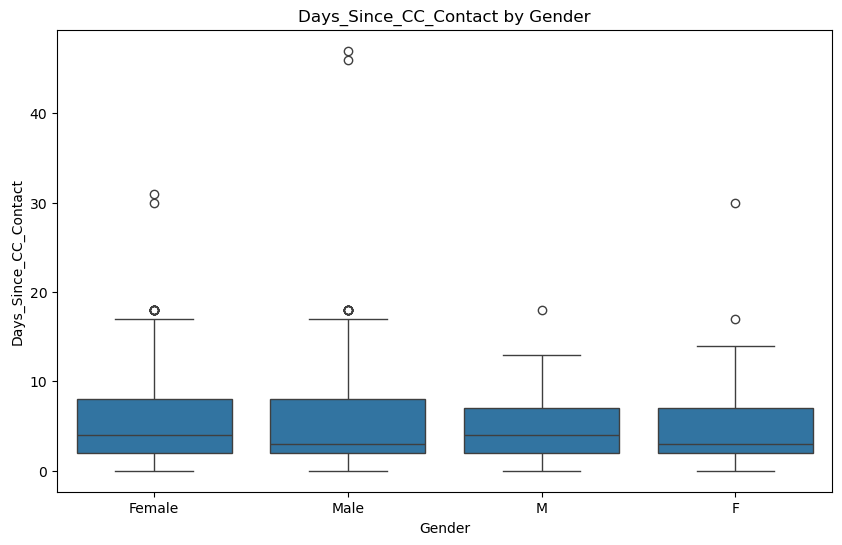

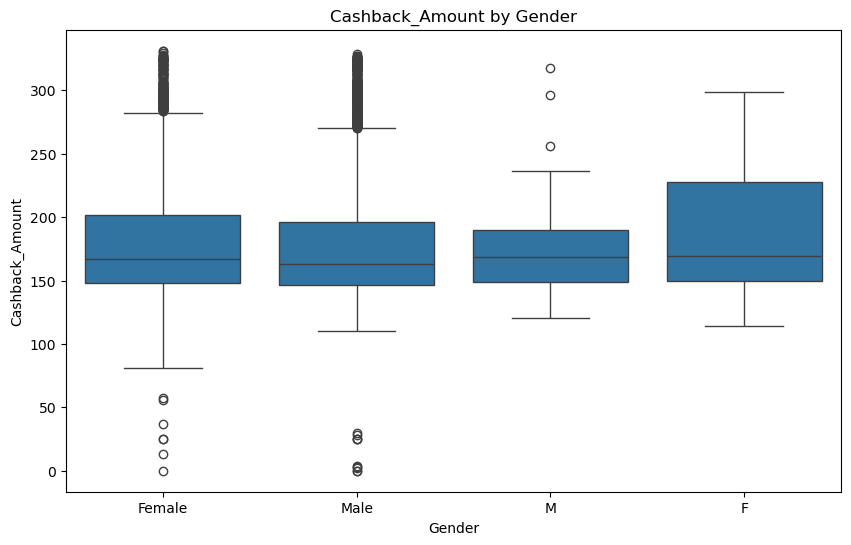

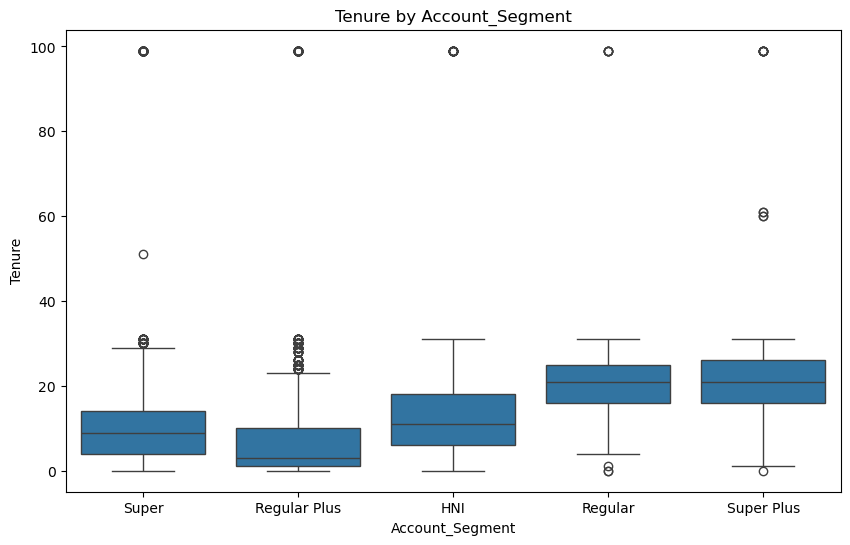

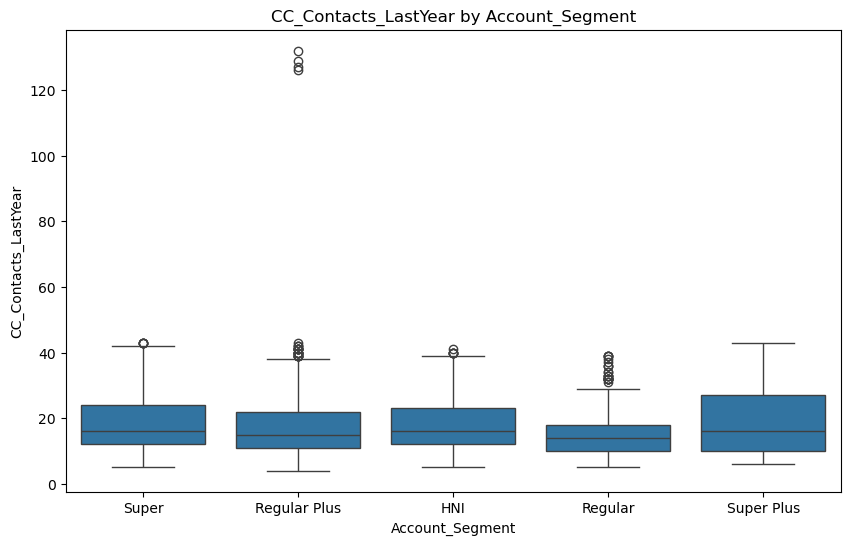

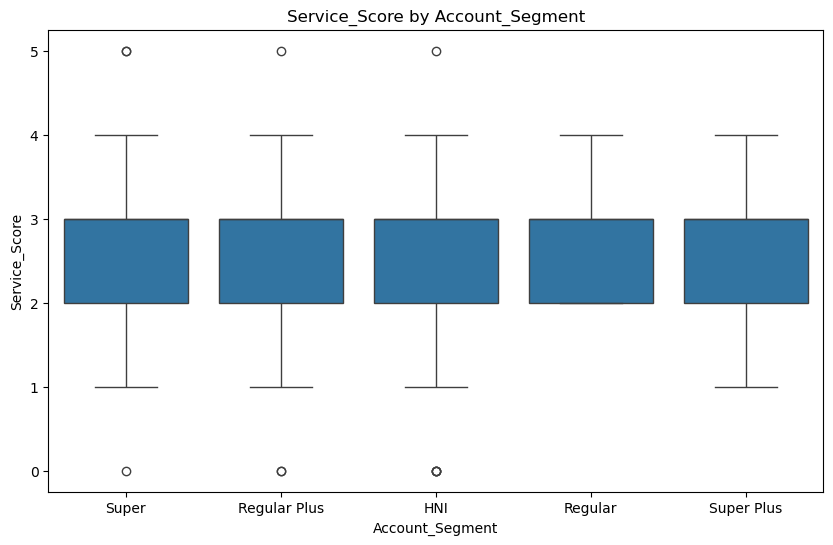

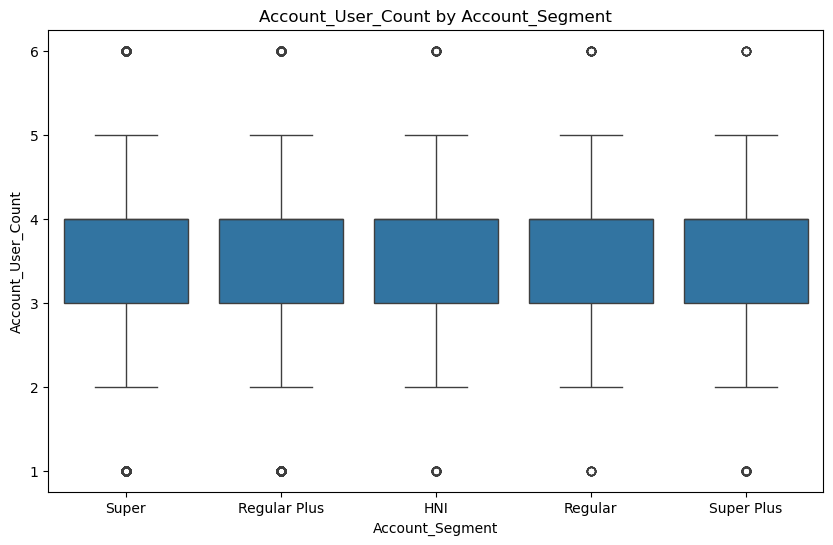

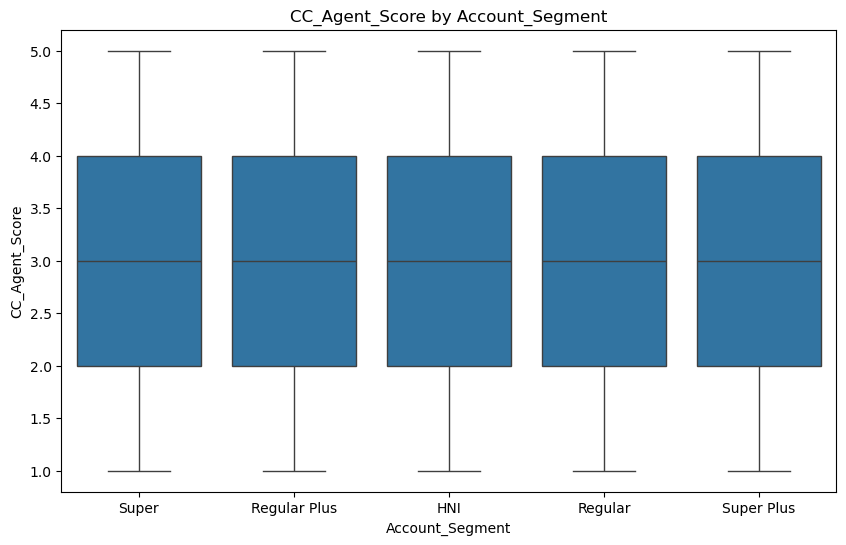

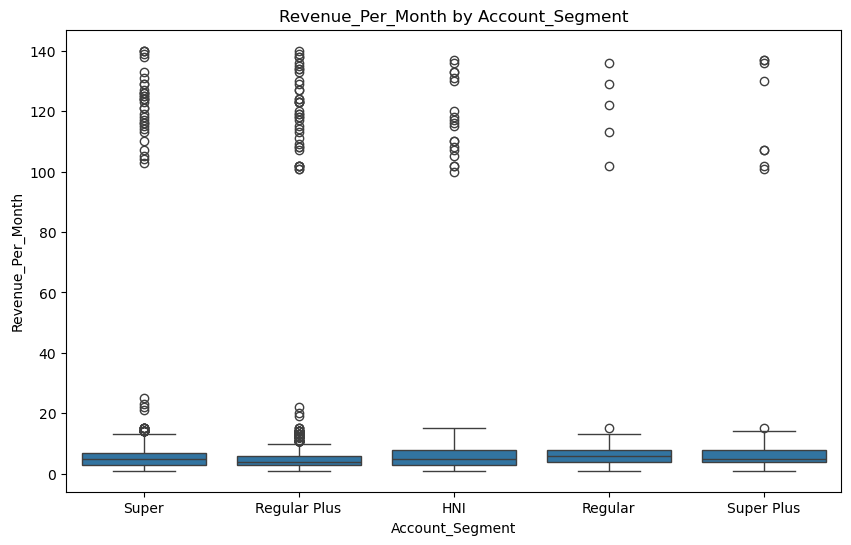

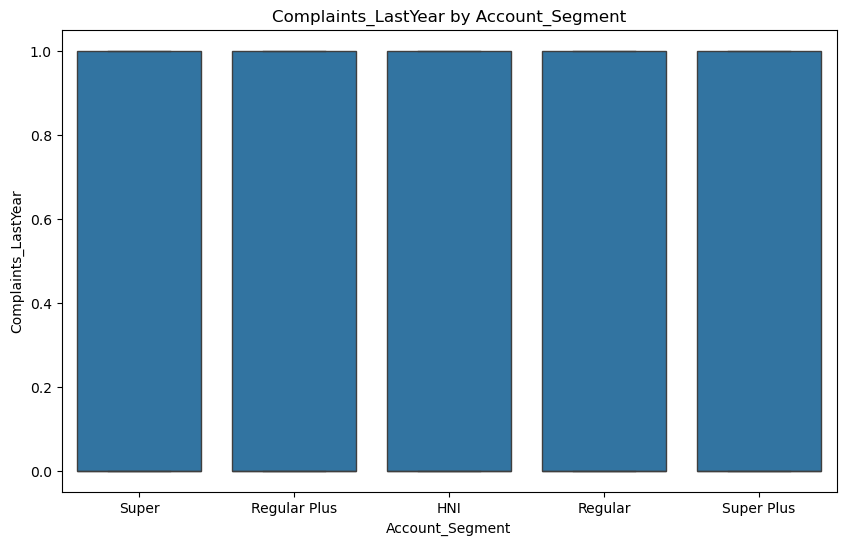

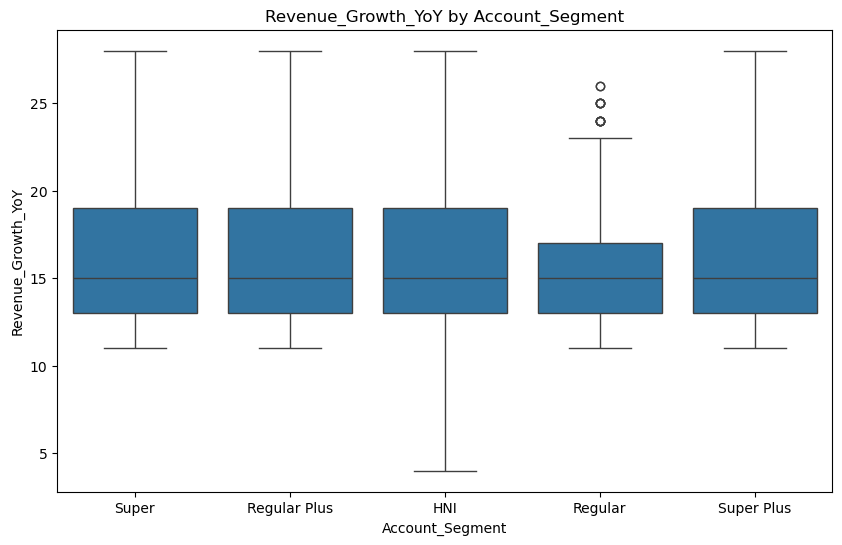

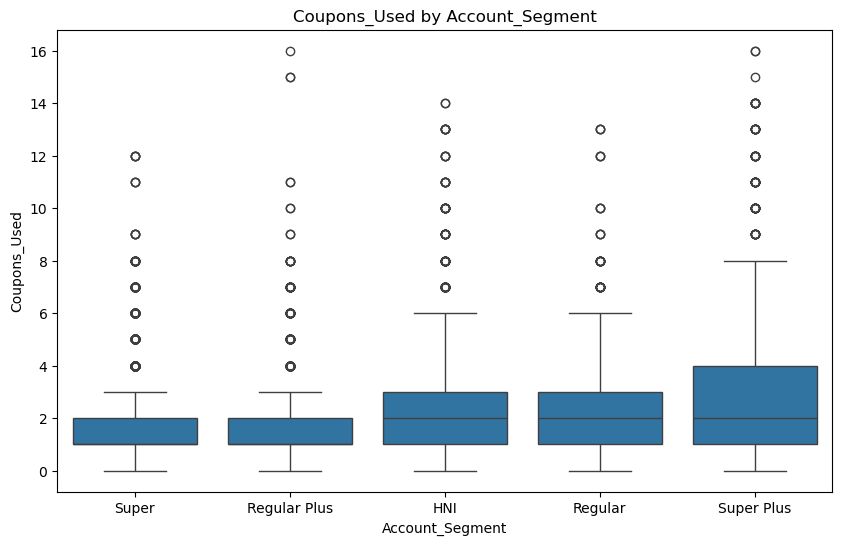

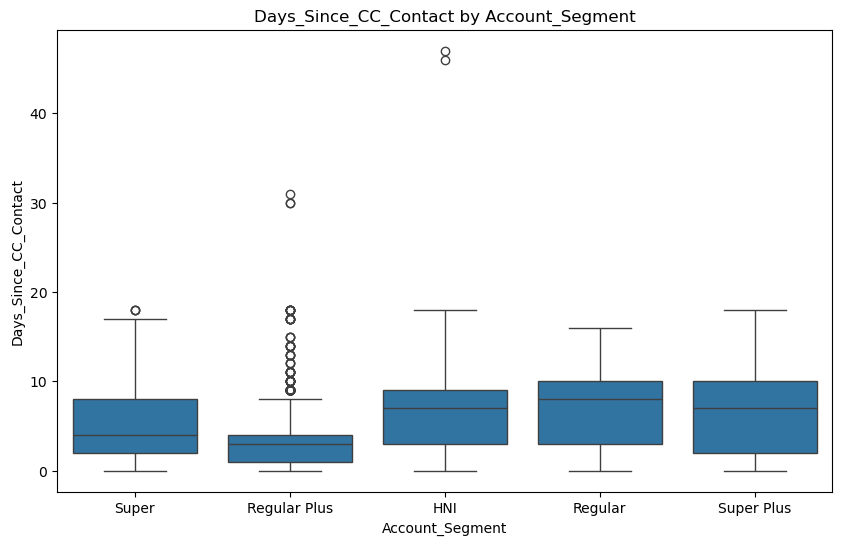

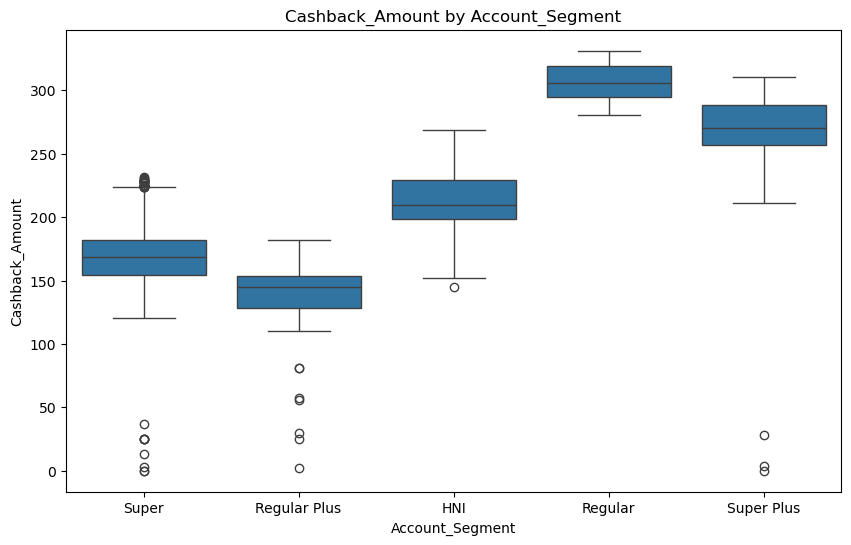

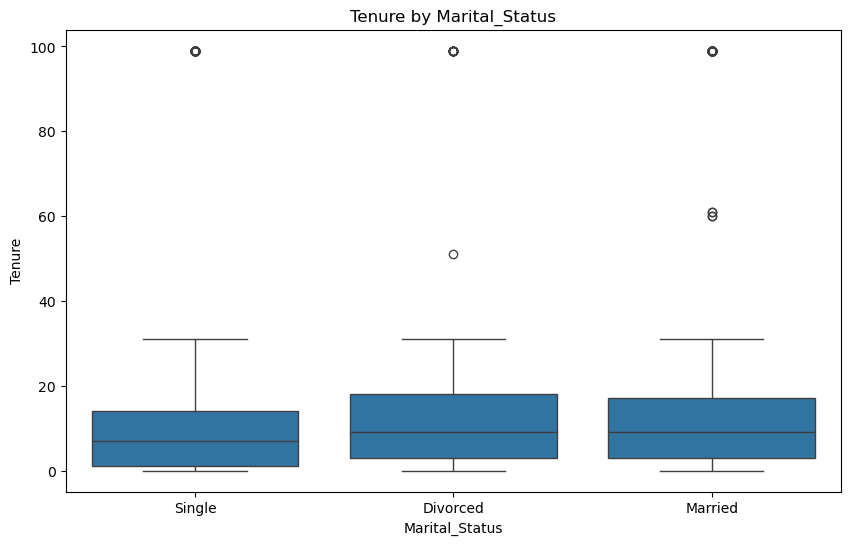

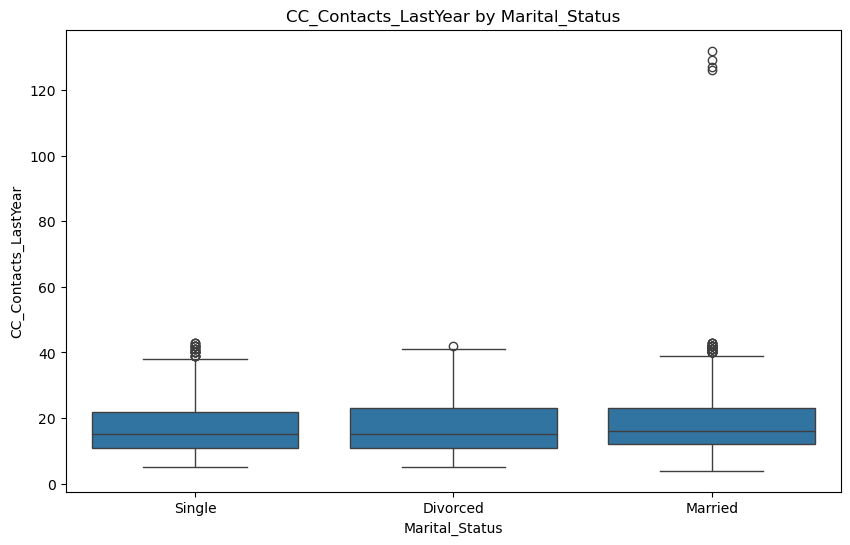

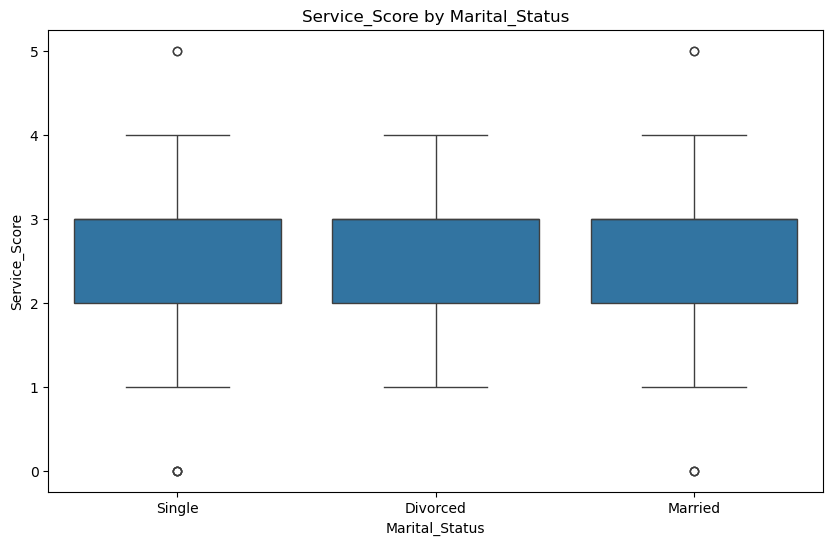

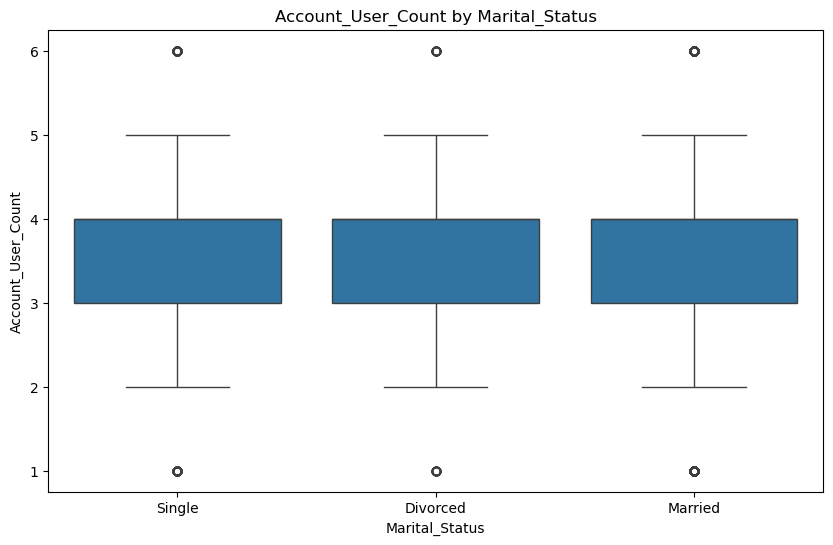

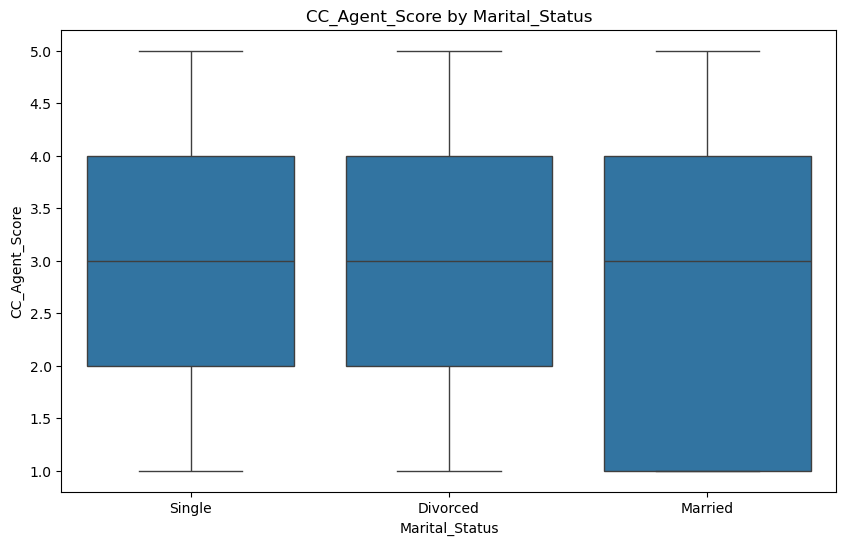

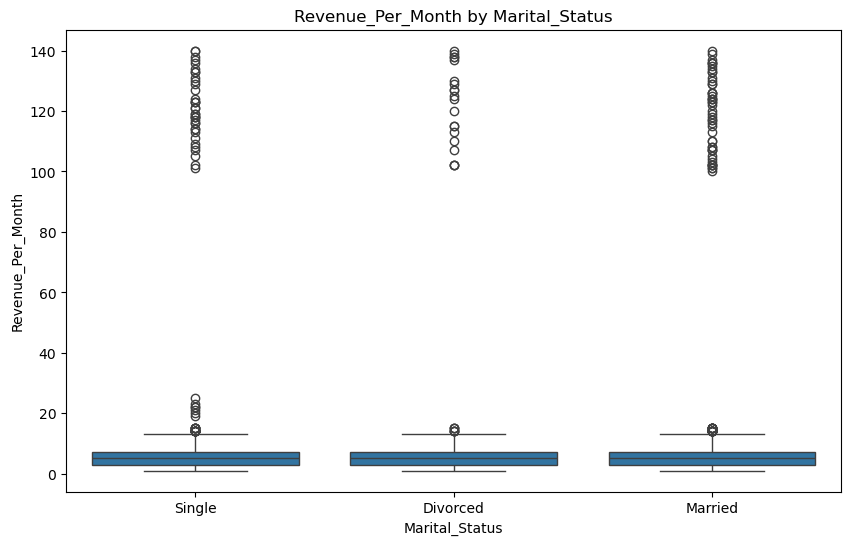

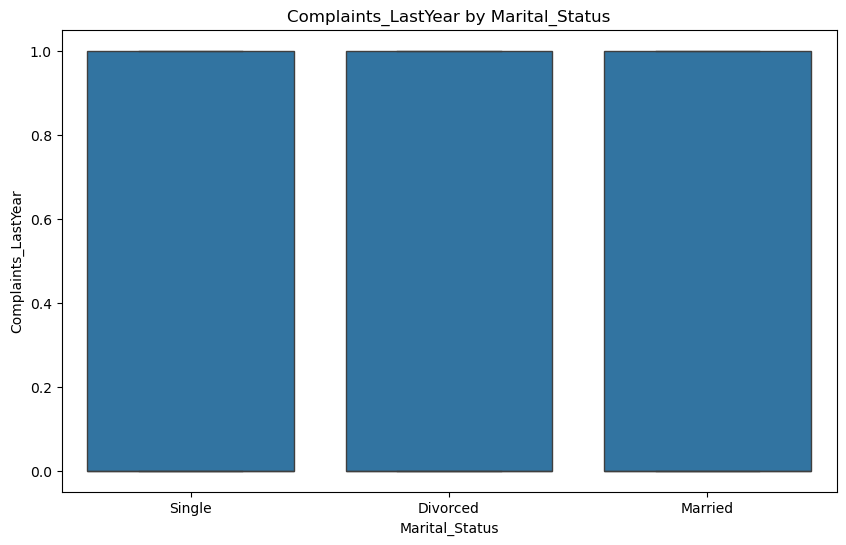

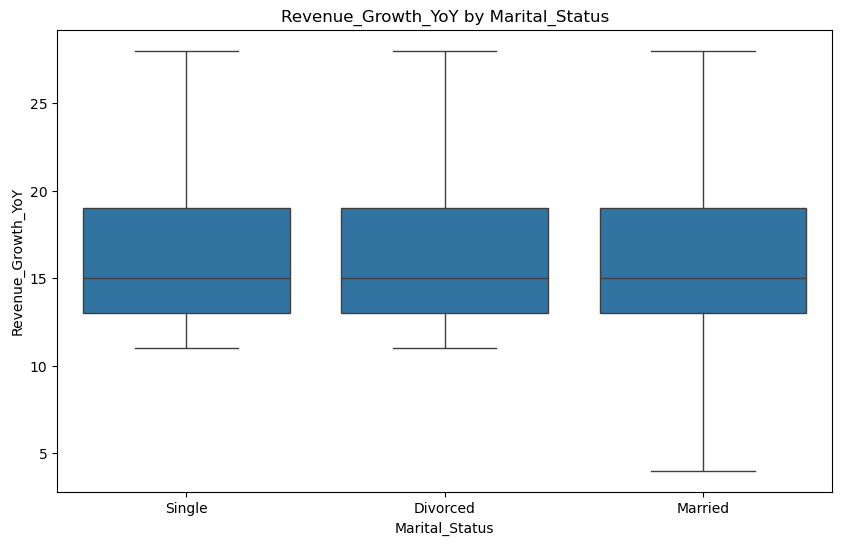

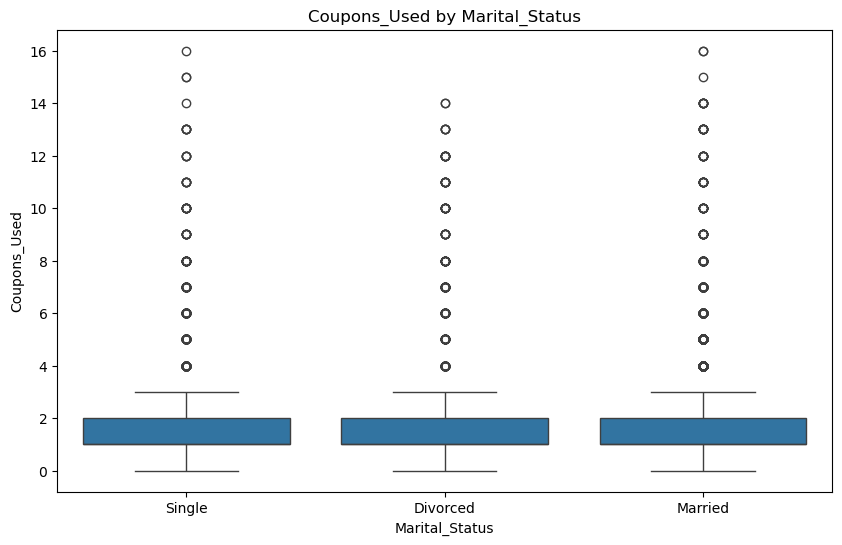

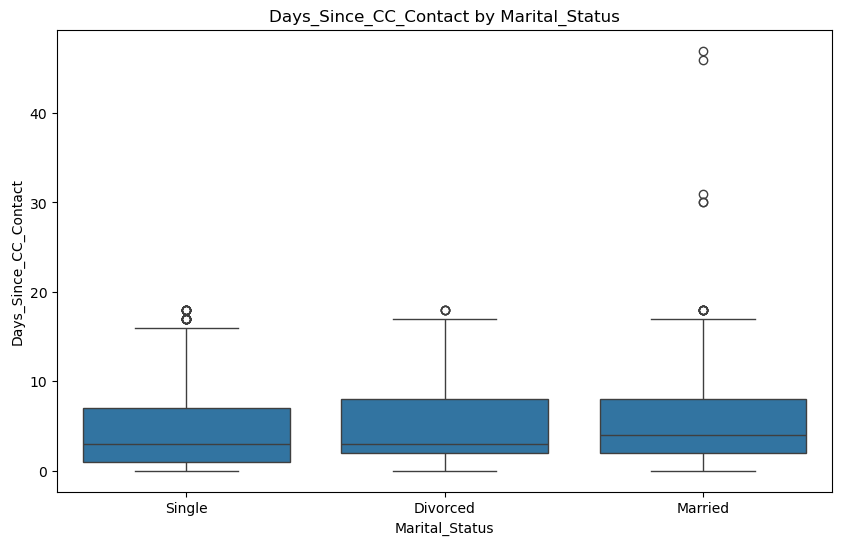

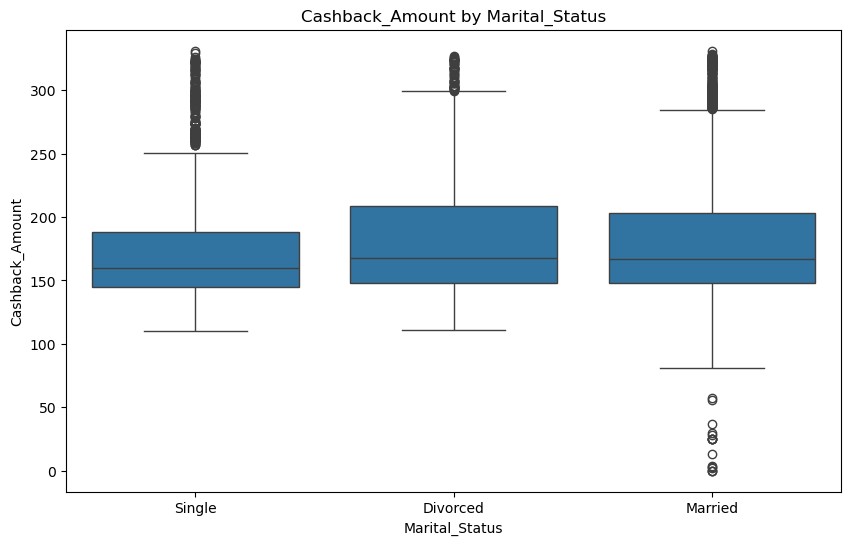

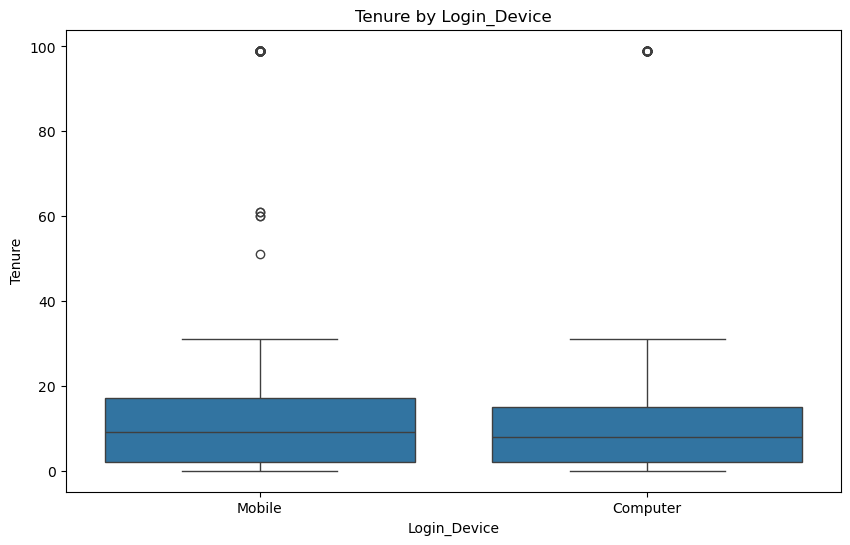

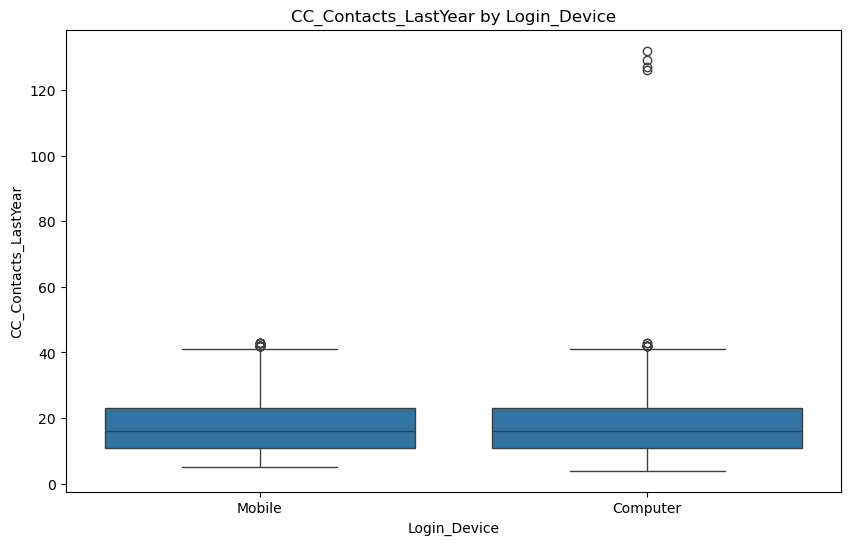

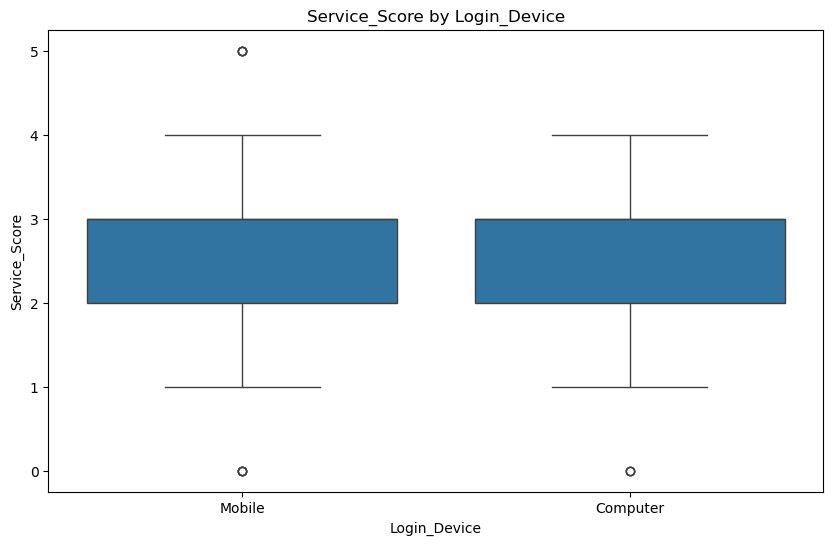

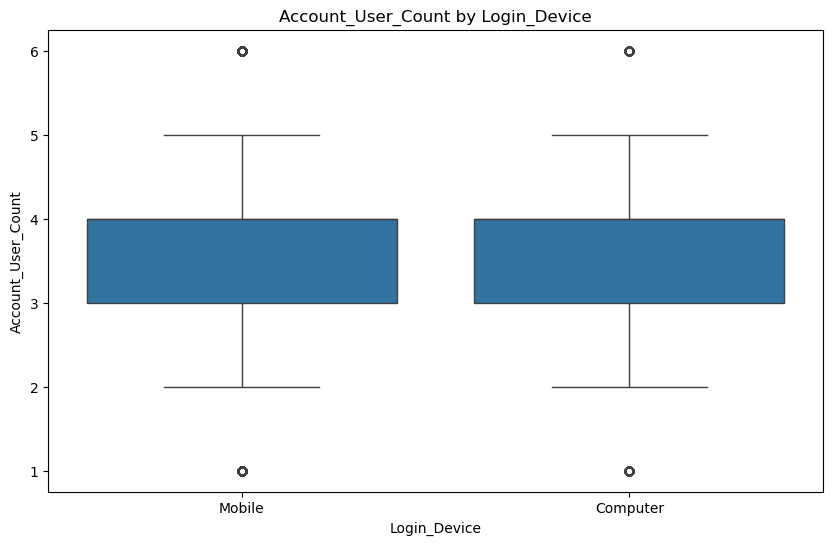

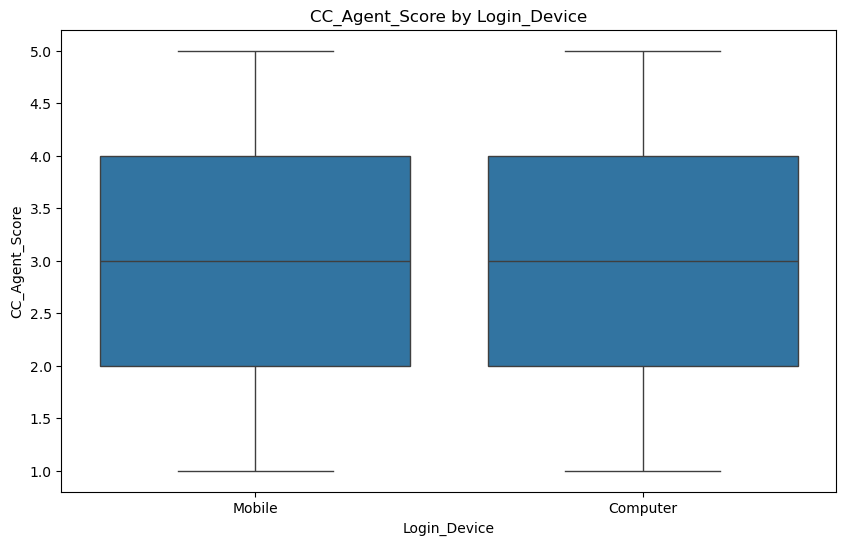

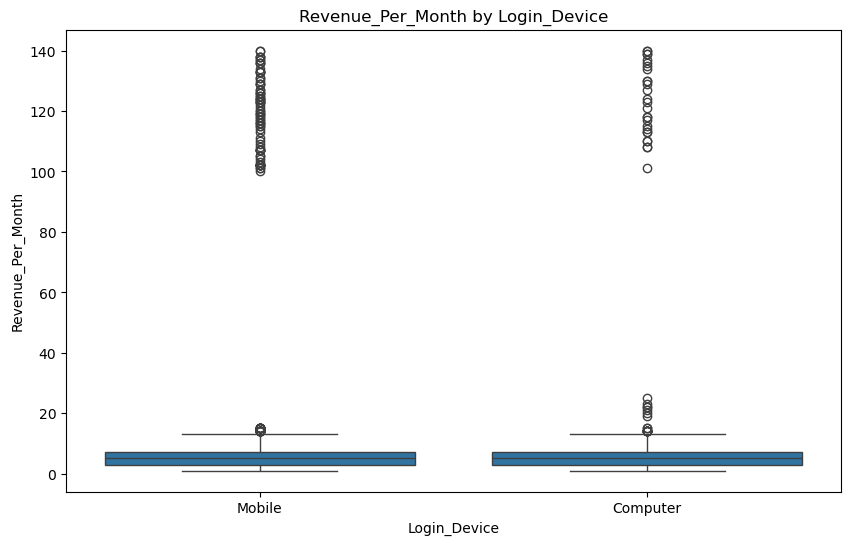

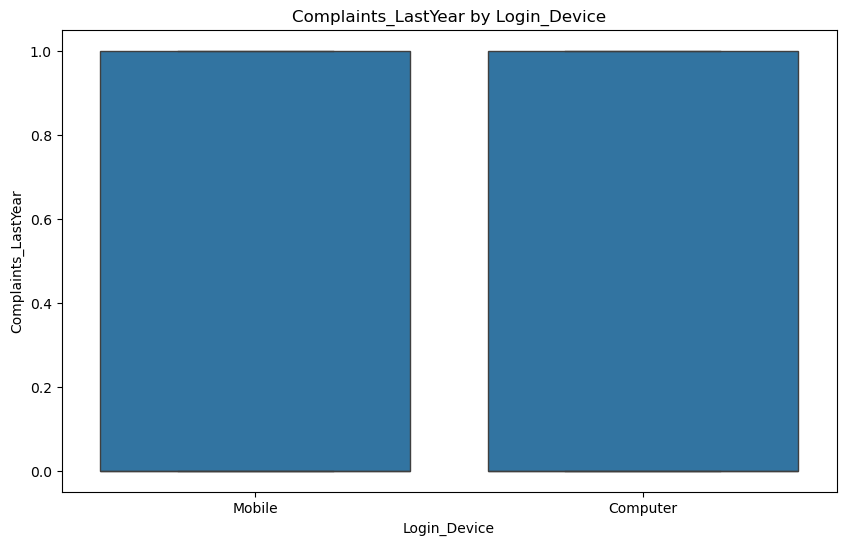

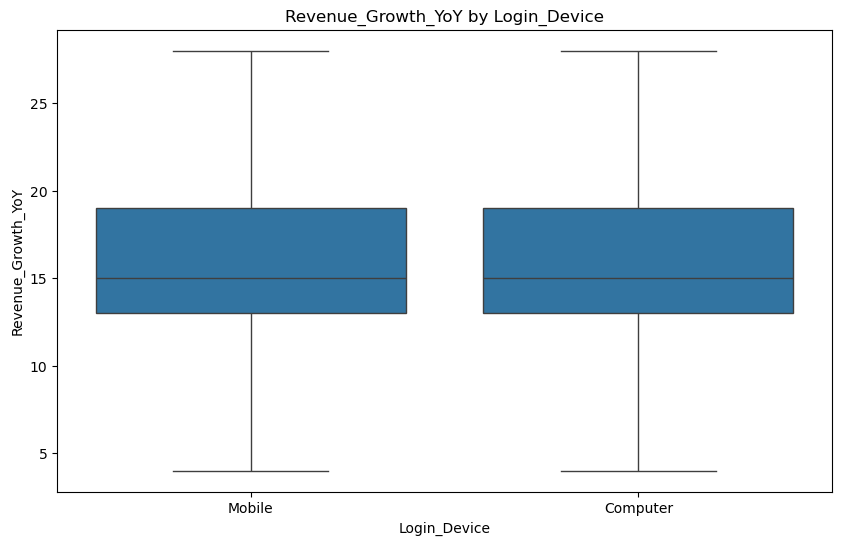

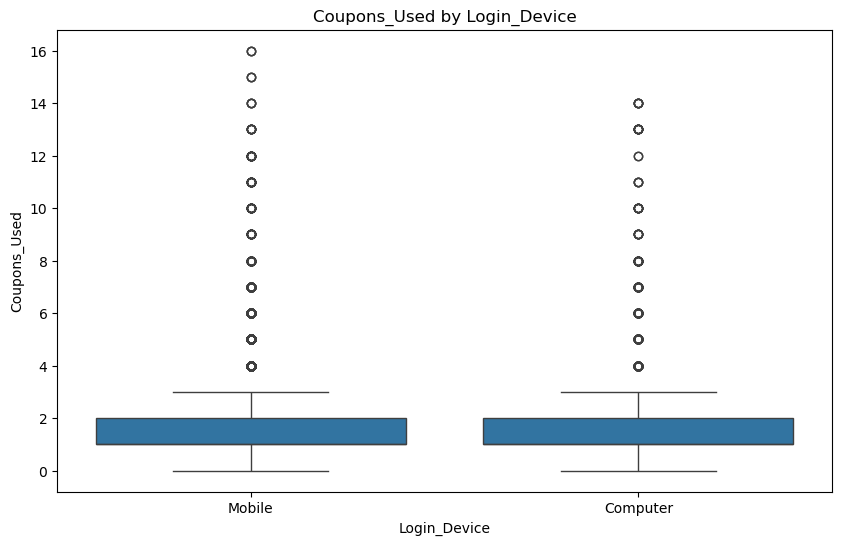

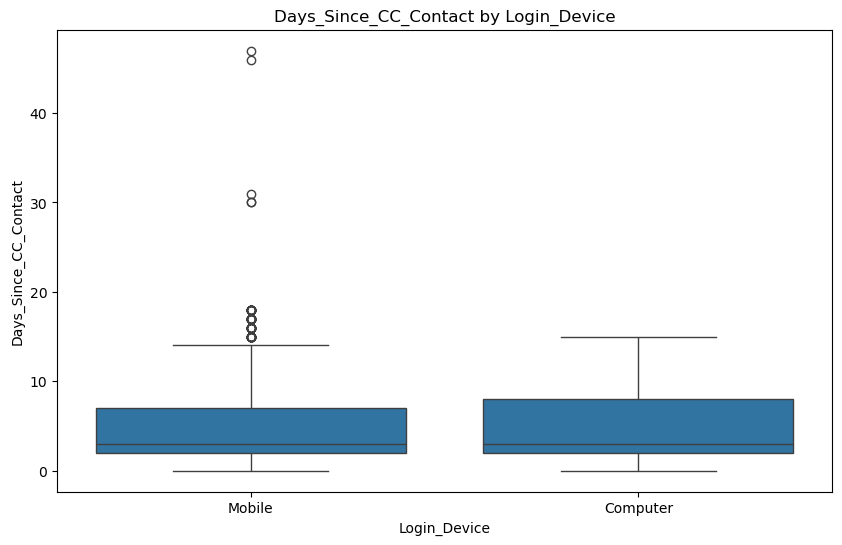

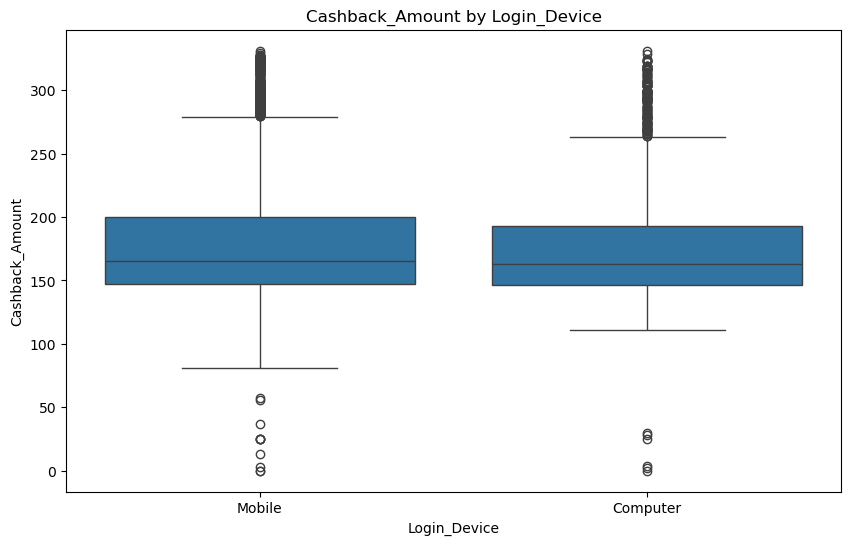

In [120]:
for columns in categorical_columns:
    for continuous_col in continuous_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[columns], y=df[continuous_col])
        plt.title(f'{continuous_col} by {columns}')
        plt.show()

In [121]:
df = df.drop(columns=['AccountID'])

In [122]:
print(df.isnull().sum())

# Handling missing values for continuous variables (impute with median)
for columns in continuous_columns:
    df[columns].fillna(df[columns].median(), inplace=True)

# Handling missing values for categorical variables (impute with mode)
for columns in categorical_columns:
    df[columns].fillna(df[columns].mode()[0], inplace=True)
print(df.isnull().sum())

Churn                    0
Tenure                   0
City_Tier                0
CC_Contacts_LastYear     0
Payment                  0
Gender                   0
Service_Score            0
Account_User_Count       0
Account_Segment          0
CC_Agent_Score           0
Marital_Status           0
Revenue_Per_Month        0
Complaints_LastYear      0
Revenue_Growth_YoY       0
Coupons_Used             0
Days_Since_CC_Contact    0
Cashback_Amount          0
Login_Device             0
dtype: int64
Churn                    0
Tenure                   0
City_Tier                0
CC_Contacts_LastYear     0
Payment                  0
Gender                   0
Service_Score            0
Account_User_Count       0
Account_Segment          0
CC_Agent_Score           0
Marital_Status           0
Revenue_Per_Month        0
Complaints_LastYear      0
Revenue_Growth_YoY       0
Coupons_Used             0
Days_Since_CC_Contact    0
Cashback_Amount          0
Login_Device             0
dtype: int64


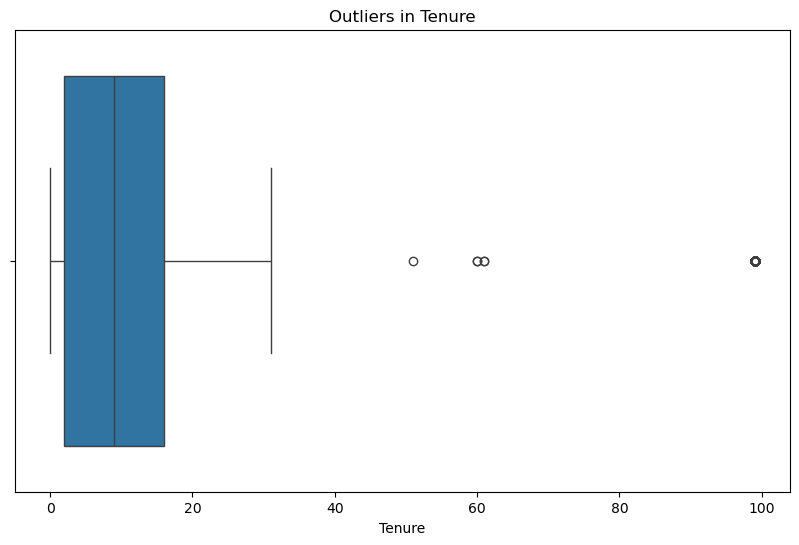

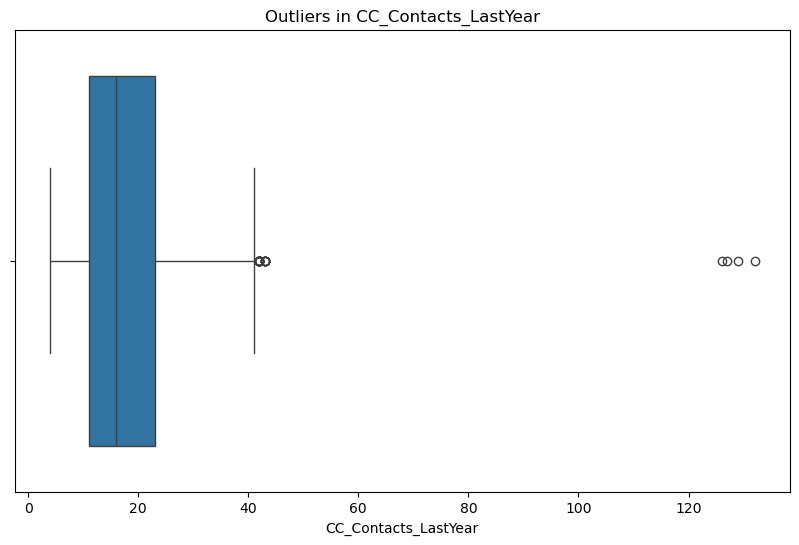

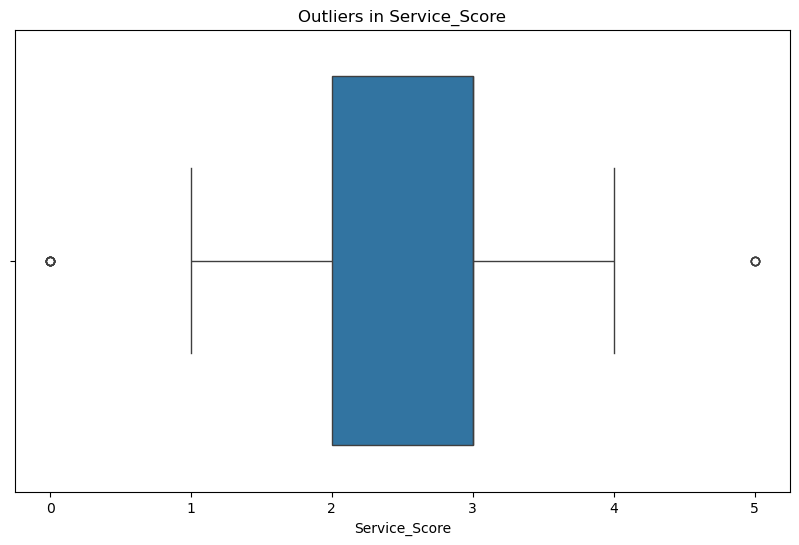

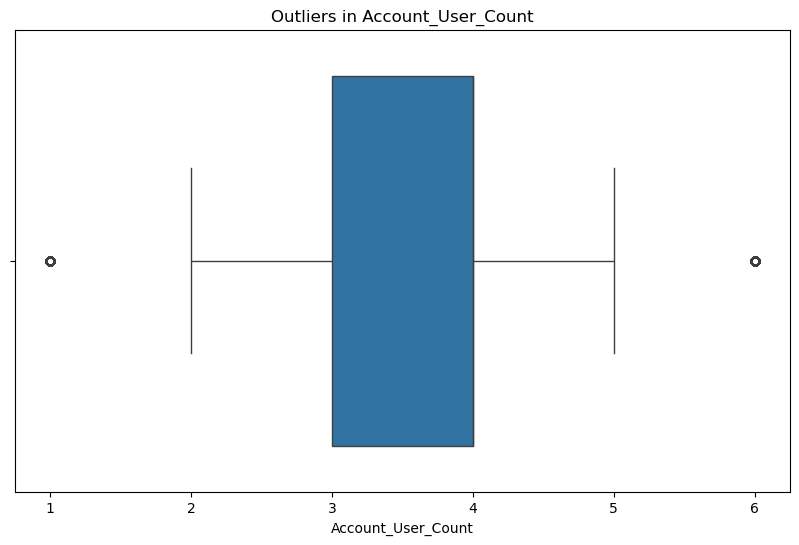

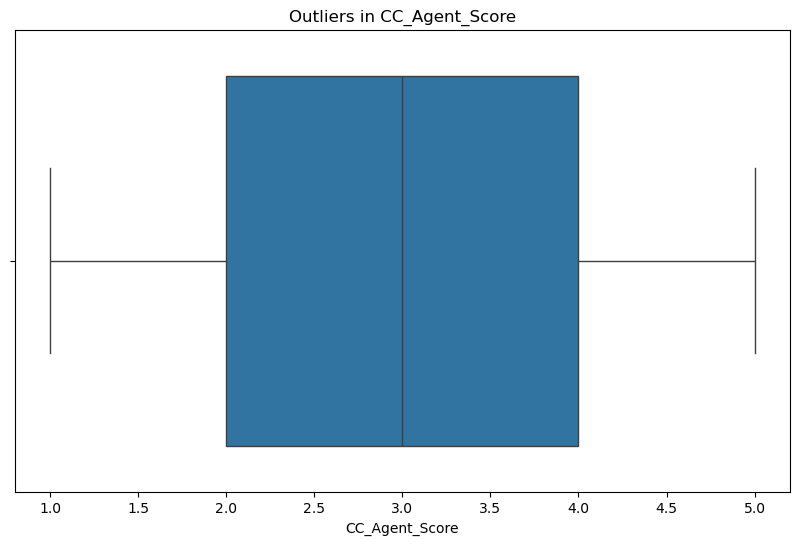

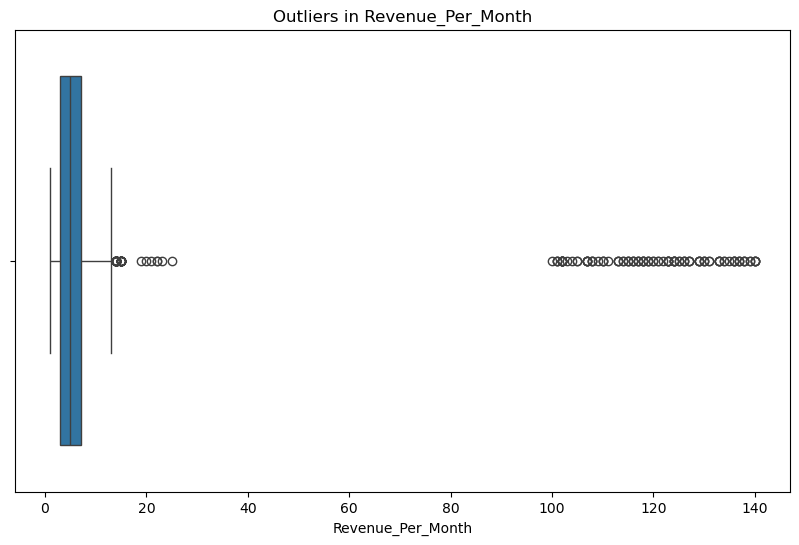

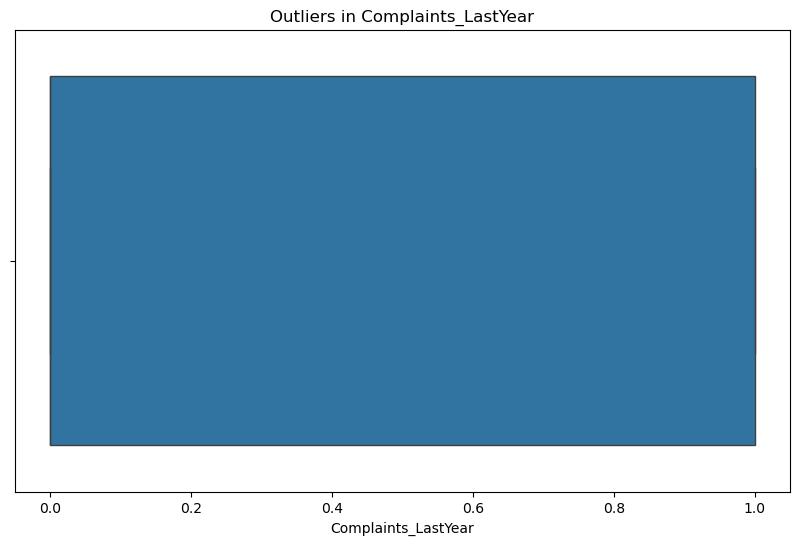

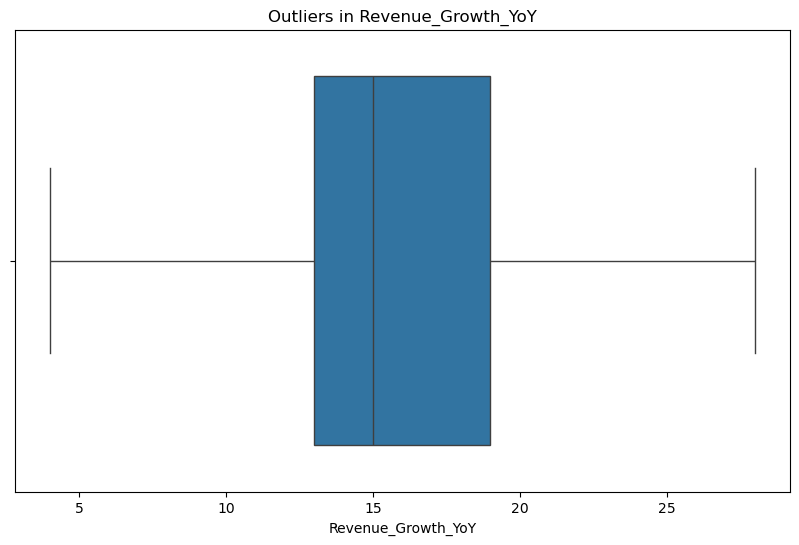

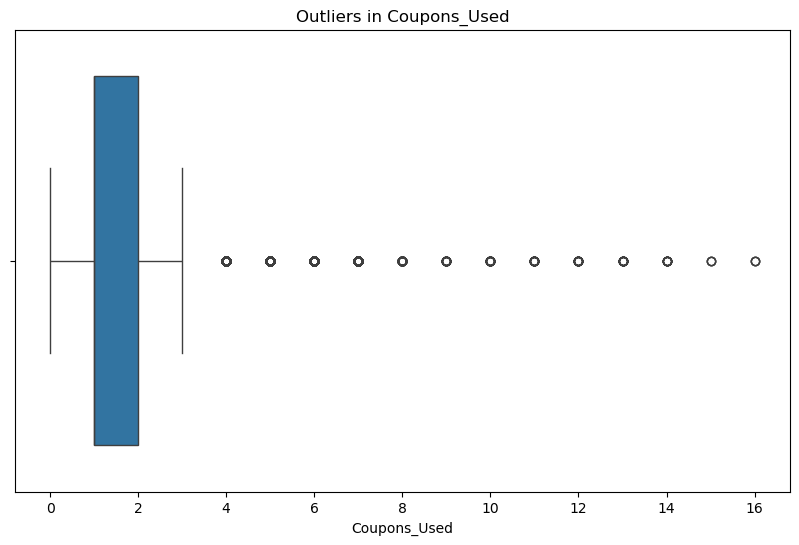

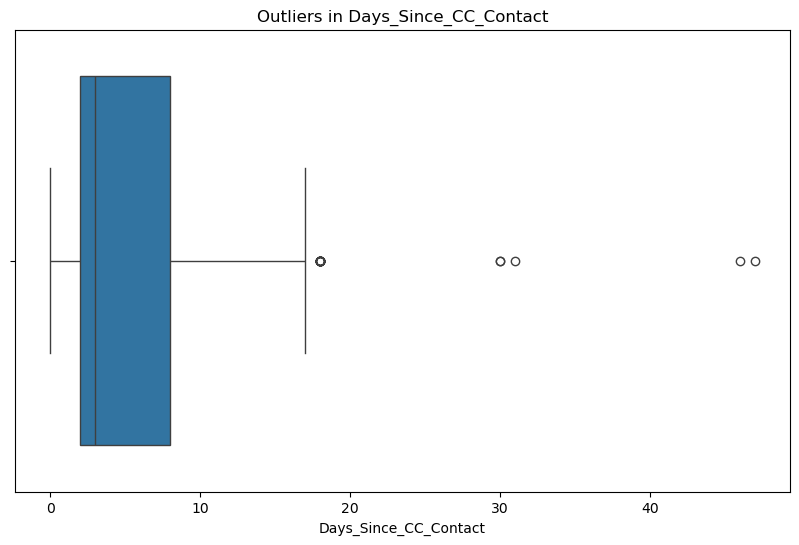

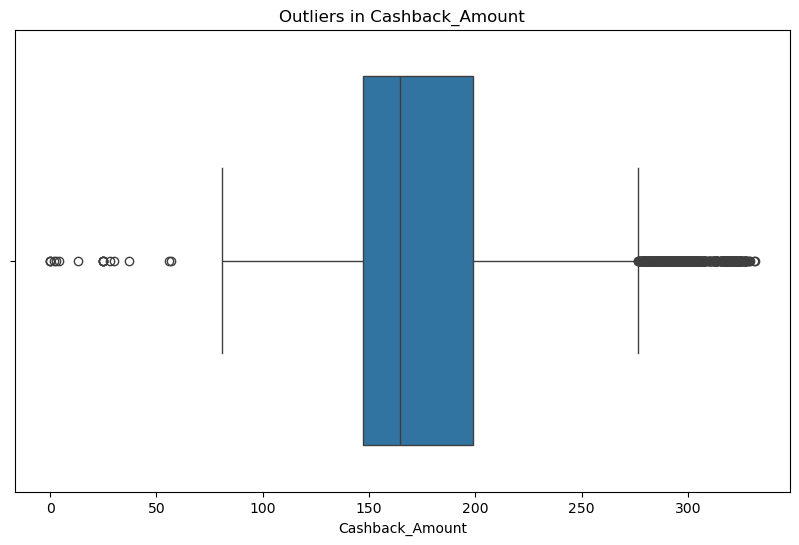

In [123]:
# Identify outliers using box plots
for columns in continuous_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[columns])
    plt.title(f'Outliers in {columns}')
    plt.show()


for columns in continuous_columns:
    percentile_95 = df[columns].quantile(0.95)
    df[columns] = df[columns].clip(upper=percentile_95)

In [124]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            # Define the lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Remove rows where values are outside of the bounds
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Specify the continuous columns
continuous_columns = ['Tenure', 'Revenue_Per_Month', 'CC_Contacts_LastYear', 'Service_Score', 'Account_User_Count', 'CC_Agent_Score', 'Complaints_LastYear', 'Revenue_Growth_YoY', 'Coupons_Used', 'Days_Since_CC_Contact', 'Cashback_Amount']

# Remove outliers from the specified columns
df_cleaned = remove_outliers_iqr(df.copy(), continuous_columns)

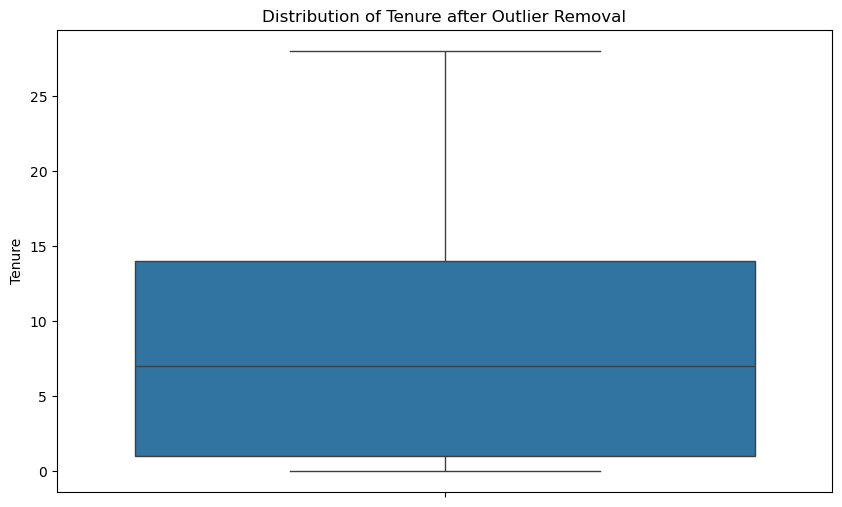

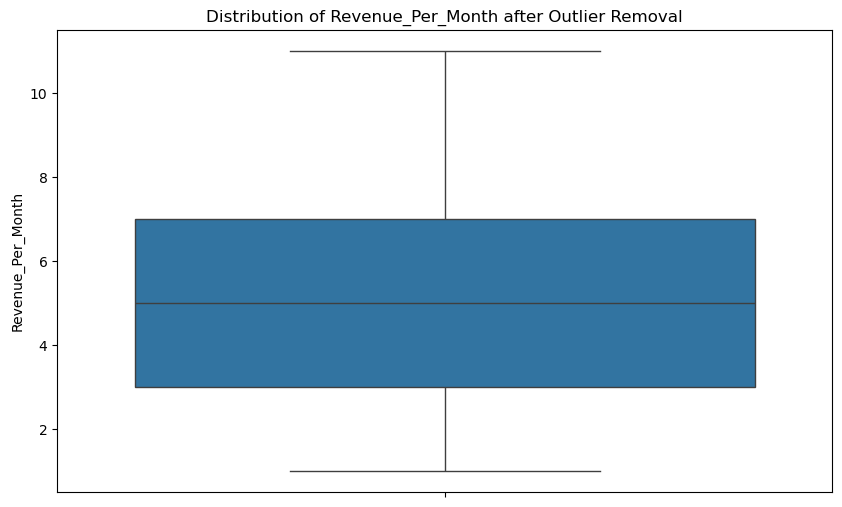

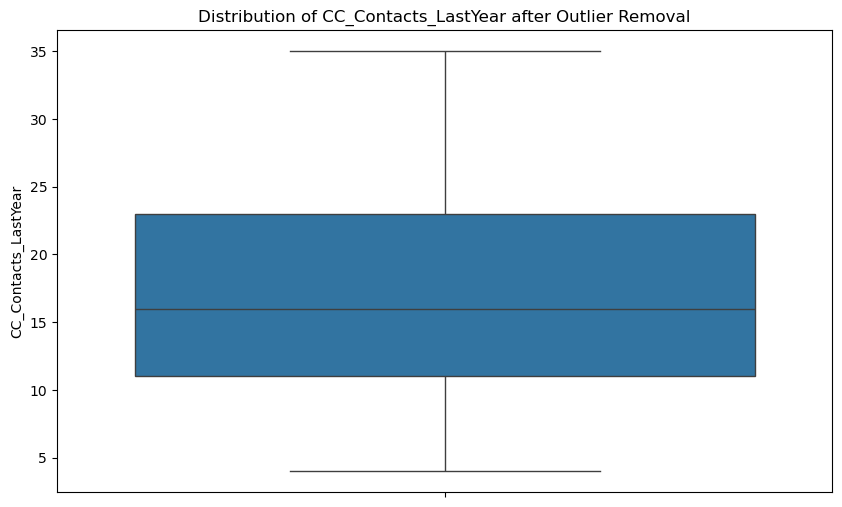

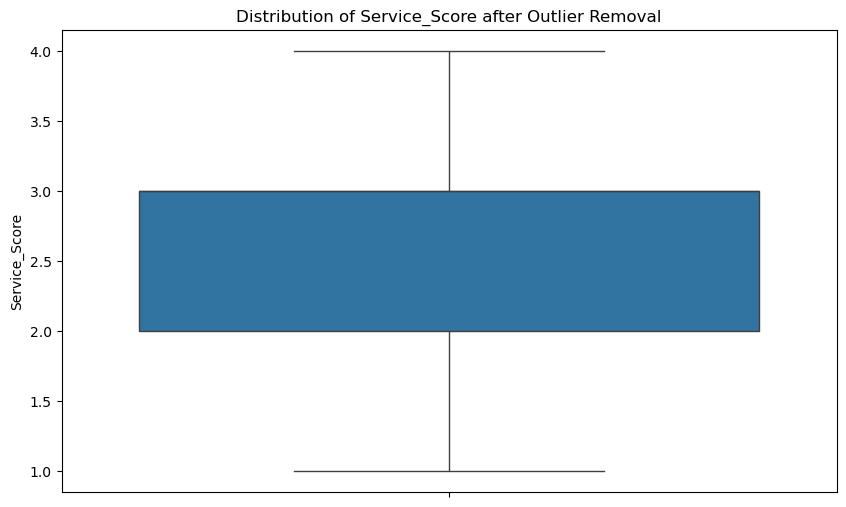

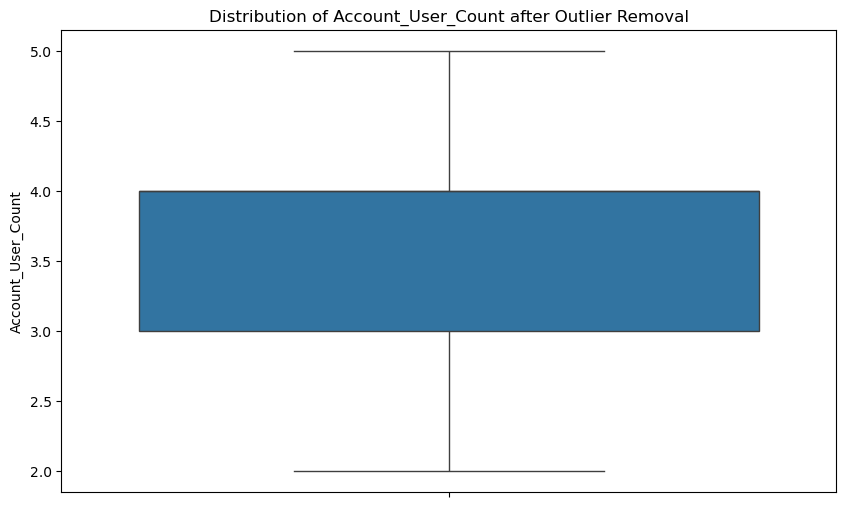

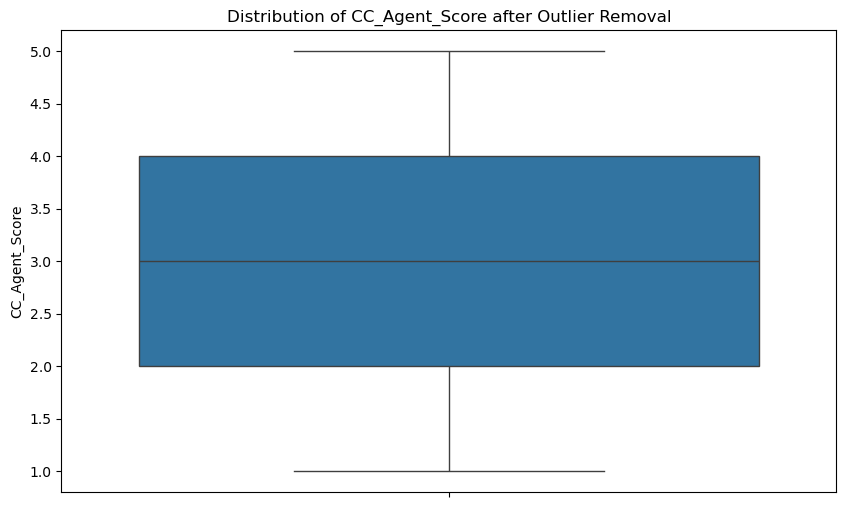

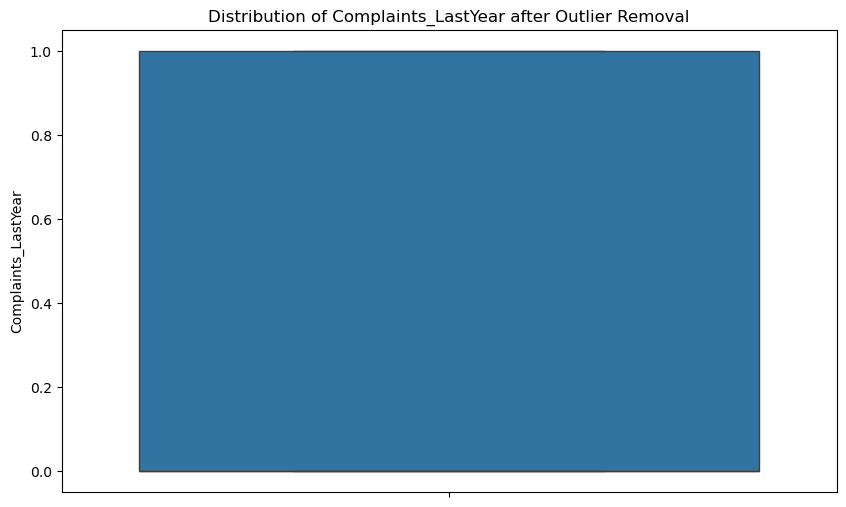

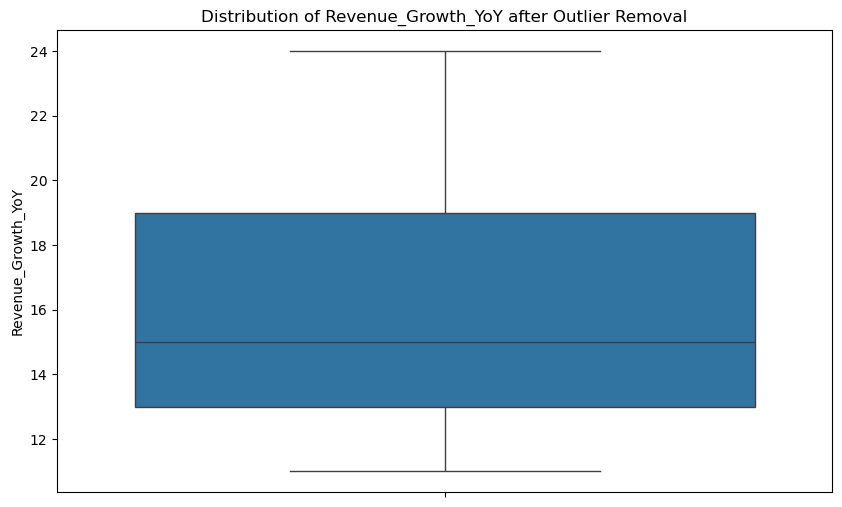

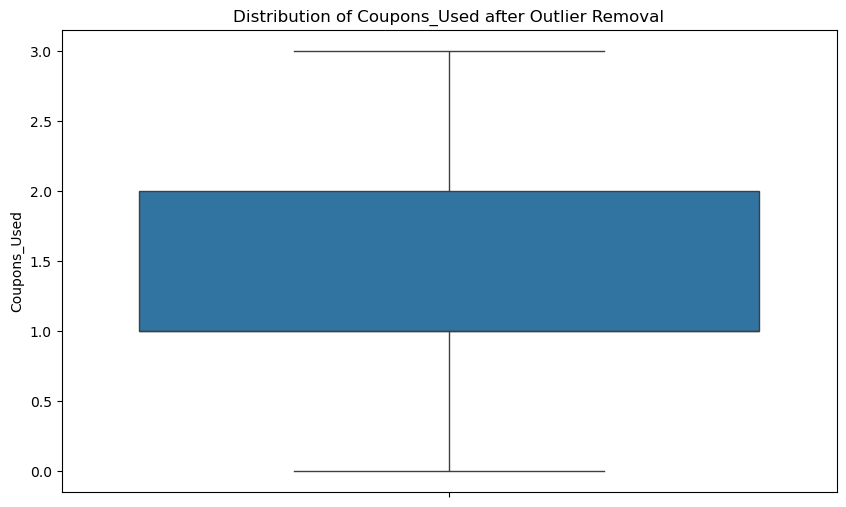

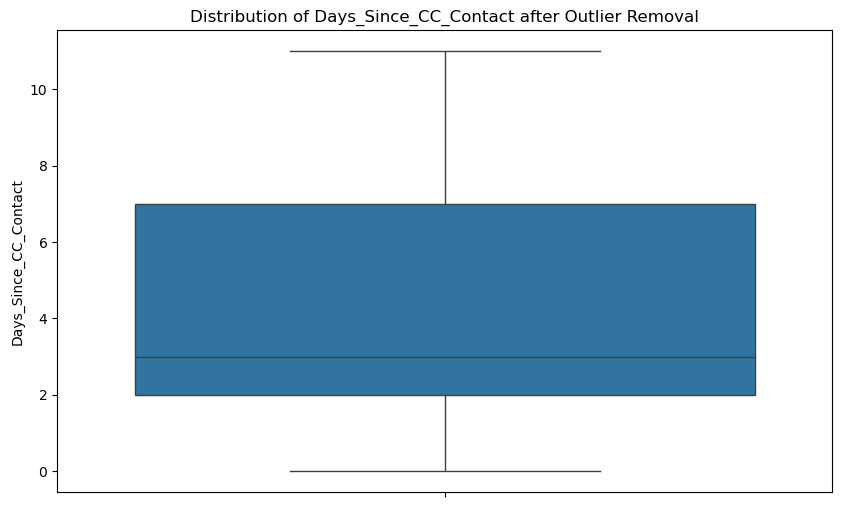

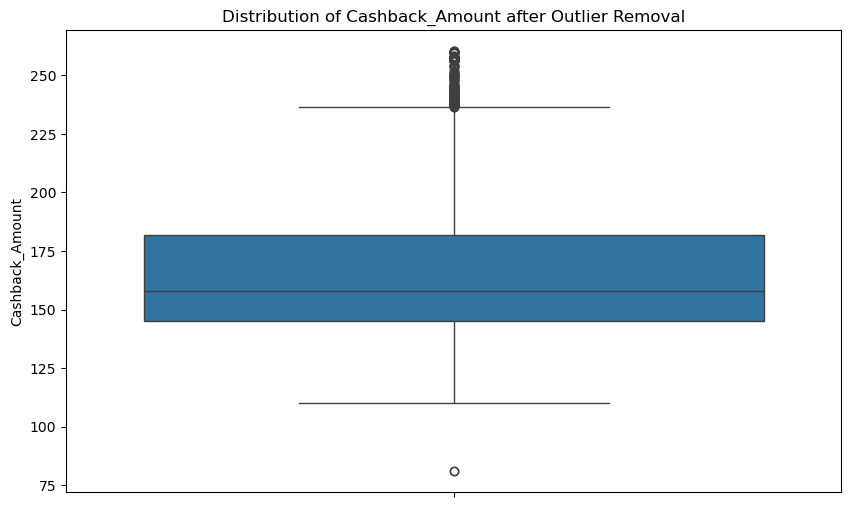

In [31]:
for col in continuous_columns:
    if col in df_cleaned.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(df_cleaned[col])
        plt.title(f'Distribution of {col} after Outlier Removal')
        plt.show()

In [125]:
for col in continuous_columns:
    if col in df_cleaned.columns and (df_cleaned[col] > 0).all():  # Ensure no zero or negative values
        df_cleaned[col] = np.log1p(df_cleaned[col])  # log1p handles log(0)

In [126]:
for col in continuous_columns:
    if col in df_cleaned.columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        print(f"{col}: Outliers outside [{lower_bound}, {upper_bound}]")
        print("Remaining outliers:", df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)].shape[0])

Tenure: Outliers outside [-18.5, 33.5]
Remaining outliers: 0
Revenue_Per_Month: Outliers outside [0.3465735902799729, 3.1191623125197534]
Remaining outliers: 0
CC_Contacts_LastYear: Outliers outside [1.4451858789480823, 4.217774601187864]
Remaining outliers: 0
Service_Score: Outliers outside [0.6670891799904386, 1.8178174697975618]
Remaining outliers: 0
Account_User_Count: Outliers outside [1.051579034148576, 1.9441532394054148]
Remaining outliers: 0
CC_Agent_Score: Outliers outside [0.33237385301912403, 2.3756763480830863]
Remaining outliers: 0
Complaints_LastYear: Outliers outside [-1.5, 2.5]
Remaining outliers: 0
Revenue_Growth_YoY: Outliers outside [2.1040449137071597, 3.5307446894620895]
Remaining outliers: 0
Coupons_Used: Outliers outside [-0.5, 3.5]
Remaining outliers: 0
Days_Since_CC_Contact: Outliers outside [-5.5, 14.5]
Remaining outliers: 0
Cashback_Amount: Outliers outside [4.648946290221347, 5.542834627888845]
Remaining outliers: 46


In [127]:
import numpy as np

# Apply log transformation to handle highly skewed columns
for col in continuous_columns:
    if col in df_cleaned.columns and (df_cleaned[col] > 0).all():  # Ensure no zero or negative values
        df_cleaned[col] = np.log1p(df_cleaned[col])  # log1p handles log(0)

In [130]:
# Recheck outliers after treatment
for col in continuous_columns:
    if col in df_cleaned.columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        print(f"{col}: Outliers outside [{lower_bound}, {upper_bound}]")
        print("Remaining outliers:", df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)].shape[0])

Tenure: Outliers outside [-18.5, 33.5]
Remaining outliers: 0
Revenue_Per_Month: Outliers outside [0.48723182111630525, 1.5072581279846746]
Remaining outliers: 0
CC_Contacts_LastYear: Outliers outside [0.9763348229808984, 1.7019519818750635]
Remaining outliers: 1
Service_Score: Outliers outside [0.5485782491496225, 1.0624397484173367]
Remaining outliers: 40
Account_User_Count: Outliers outside [0.7356519570986237, 1.093224568014144]
Remaining outliers: 0
CC_Agent_Score: Outliers outside [0.4144885200563024, 1.2859226302395368]
Remaining outliers: 0
Complaints_LastYear: Outliers outside [-1.5, 2.5]
Remaining outliers: 0
Revenue_Growth_YoY: Outliers outside [1.1514713919232467, 1.525480140736752]
Remaining outliers: 0
Coupons_Used: Outliers outside [-0.5, 3.5]
Remaining outliers: 0
Days_Since_CC_Contact: Outliers outside [-5.5, 14.5]
Remaining outliers: 0
Cashback_Amount: Outliers outside [4.674693204432042, 4.674693204432042]
Remaining outliers: 0


In [129]:
lower_bound = 4.674693204432042
upper_bound = 5.51176242786493

# Cap values outside the range
df_cleaned['Cashback_Amount'] = df_cleaned['Cashback_Amount'].clip(lower=lower_bound, upper=upper_bound)

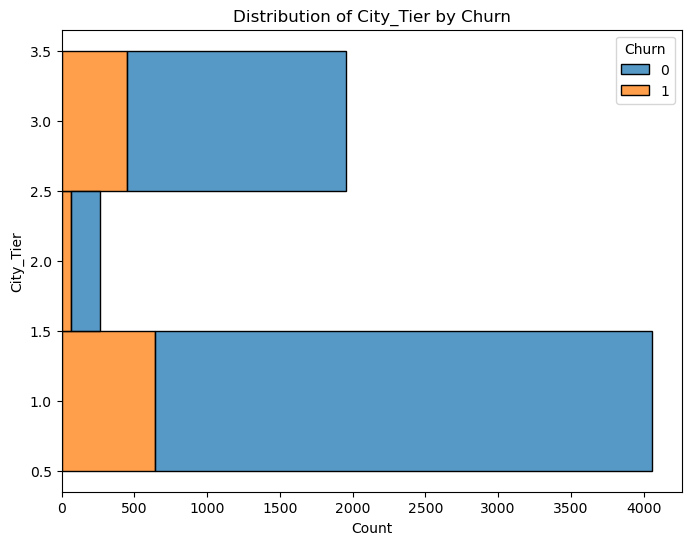

In [131]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, y="City_Tier", hue="Churn", multiple="stack", discrete=True)

plt.title("Distribution of City_Tier by Churn")
plt.show()

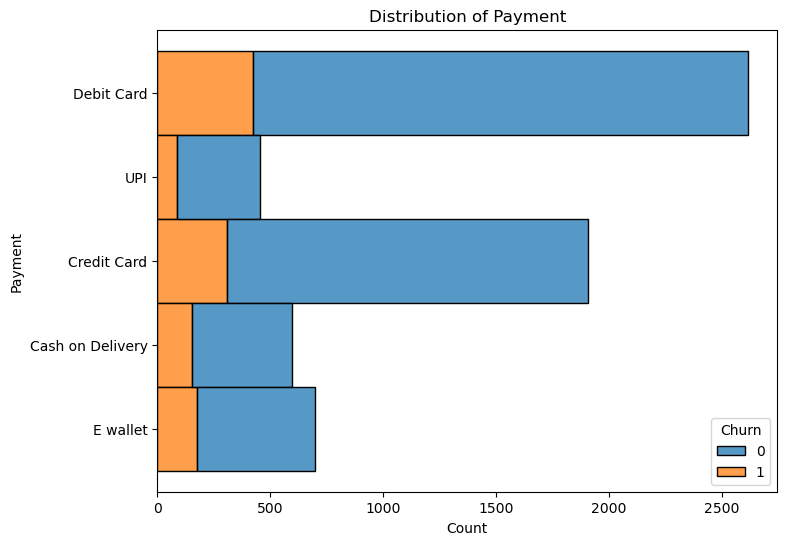

In [132]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, y="Payment", hue="Churn", multiple="stack", discrete=True)

plt.title("Distribution of Payment")
plt.show()

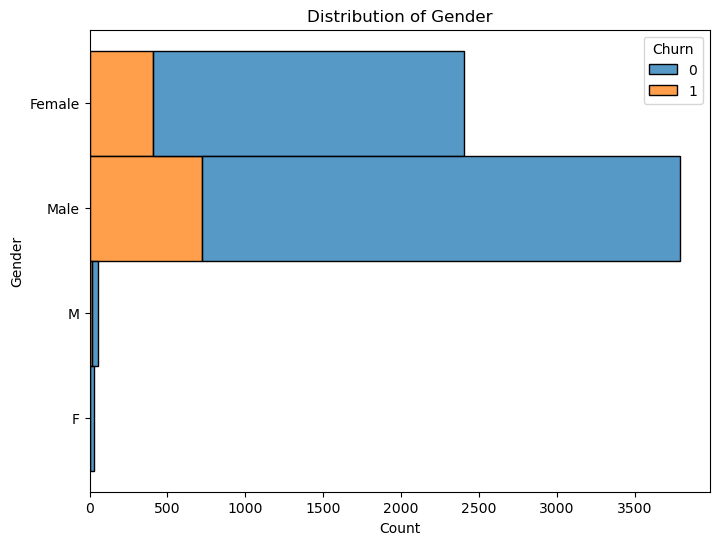

In [133]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, y="Gender", hue="Churn", multiple="stack", discrete=True)

plt.title("Distribution of Gender")
plt.show()

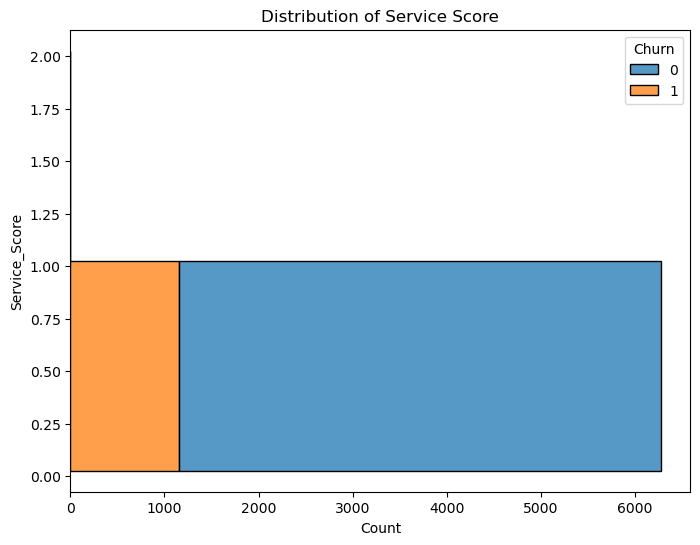

In [134]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, y="Service_Score", hue="Churn", multiple="stack", discrete=True)

plt.title("Distribution of Service Score")
plt.show()

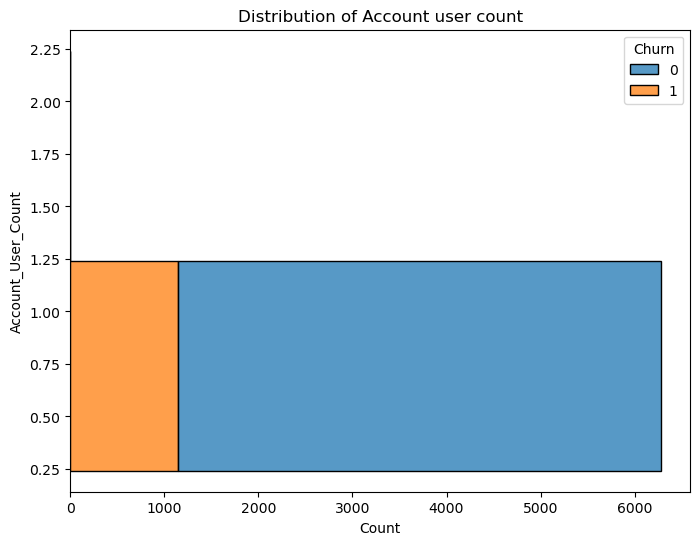

In [135]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, y="Account_User_Count", hue="Churn", multiple="stack", discrete=True)

plt.title("Distribution of Account user count")
plt.show()

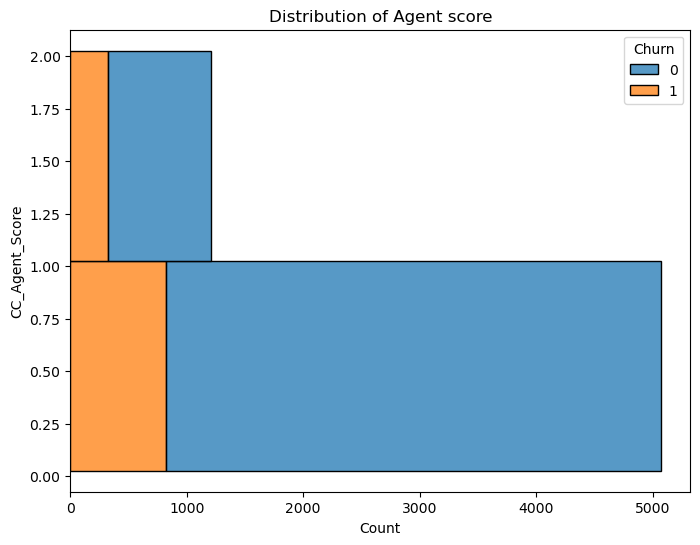

In [136]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, y="CC_Agent_Score", hue="Churn", multiple="stack", discrete=True)

plt.title("Distribution of Agent score")
plt.show()

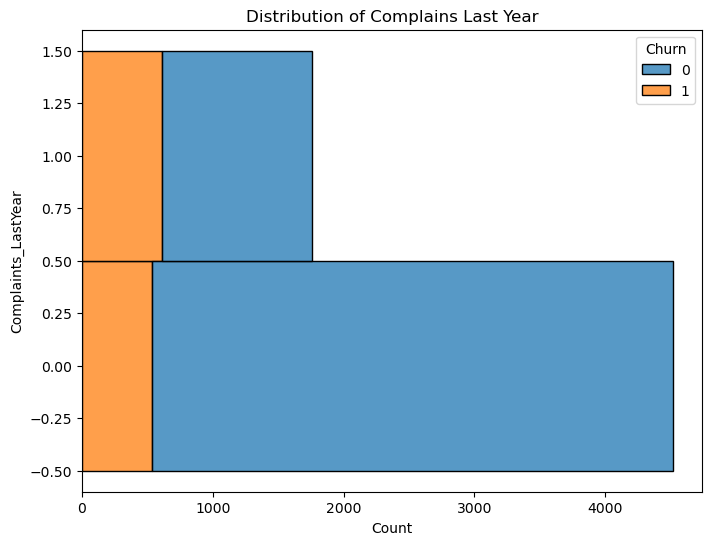

In [137]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, y="Complaints_LastYear", hue="Churn", multiple="stack", discrete=True)

plt.title("Distribution of Complains Last Year")
plt.show()

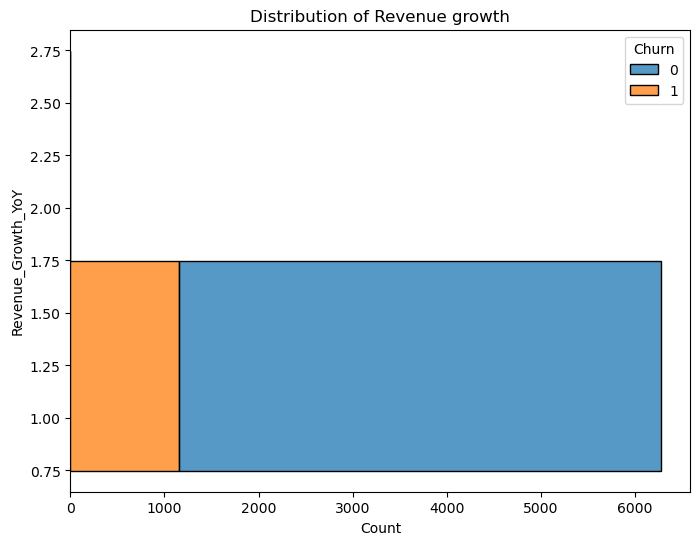

In [138]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, y="Revenue_Growth_YoY", hue="Churn", multiple="stack", discrete=True)

plt.title("Distribution of Revenue growth")
plt.show()

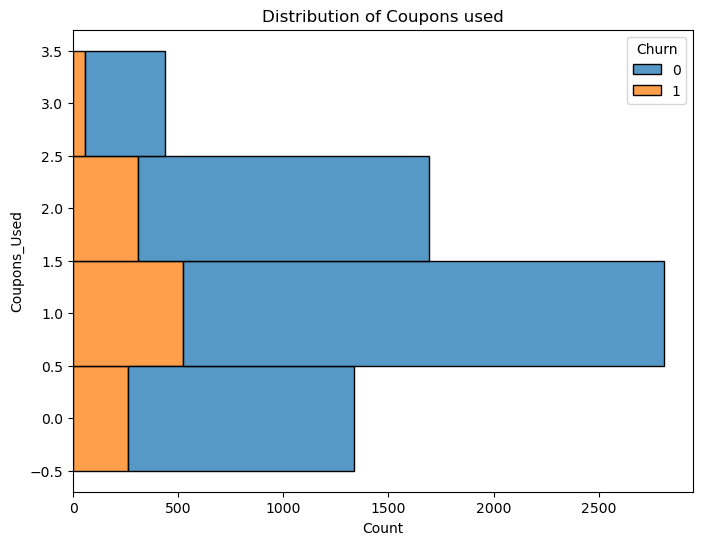

In [139]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, y="Coupons_Used", hue="Churn", multiple="stack", discrete=True)

plt.title("Distribution of Coupons used")
plt.show()

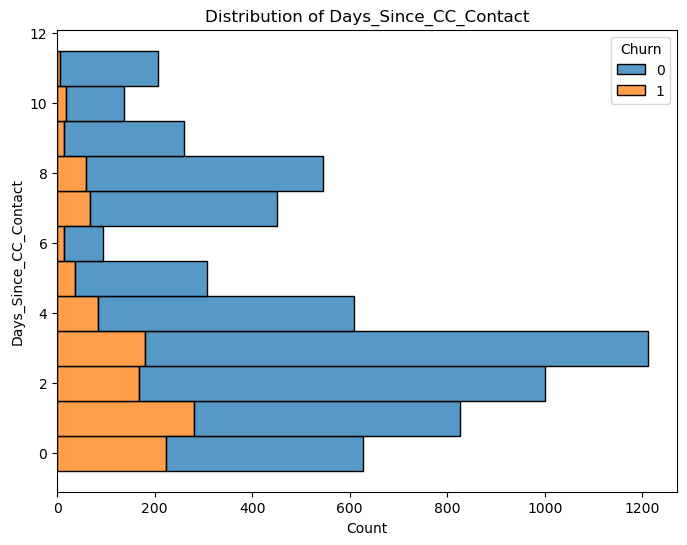

In [140]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, y="Days_Since_CC_Contact", hue="Churn", multiple="stack", discrete=True)

plt.title("Distribution of Days_Since_CC_Contact")
plt.show()

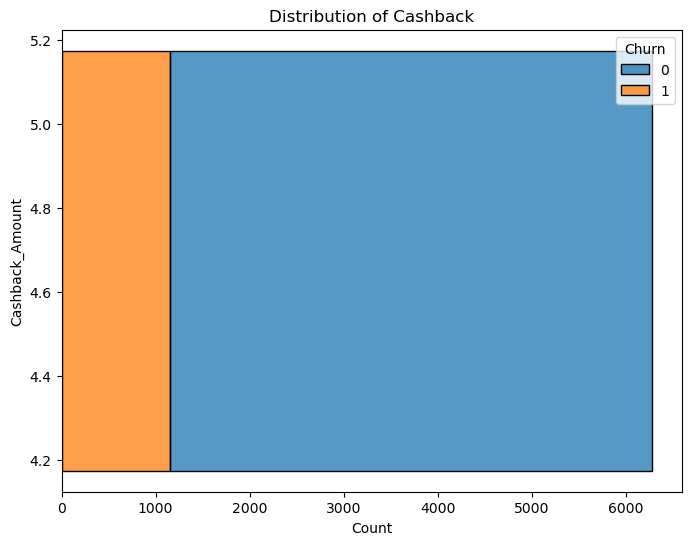

In [141]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, y="Cashback_Amount", hue="Churn", multiple="stack", discrete=True)

plt.title("Distribution of Cashback")
plt.show()

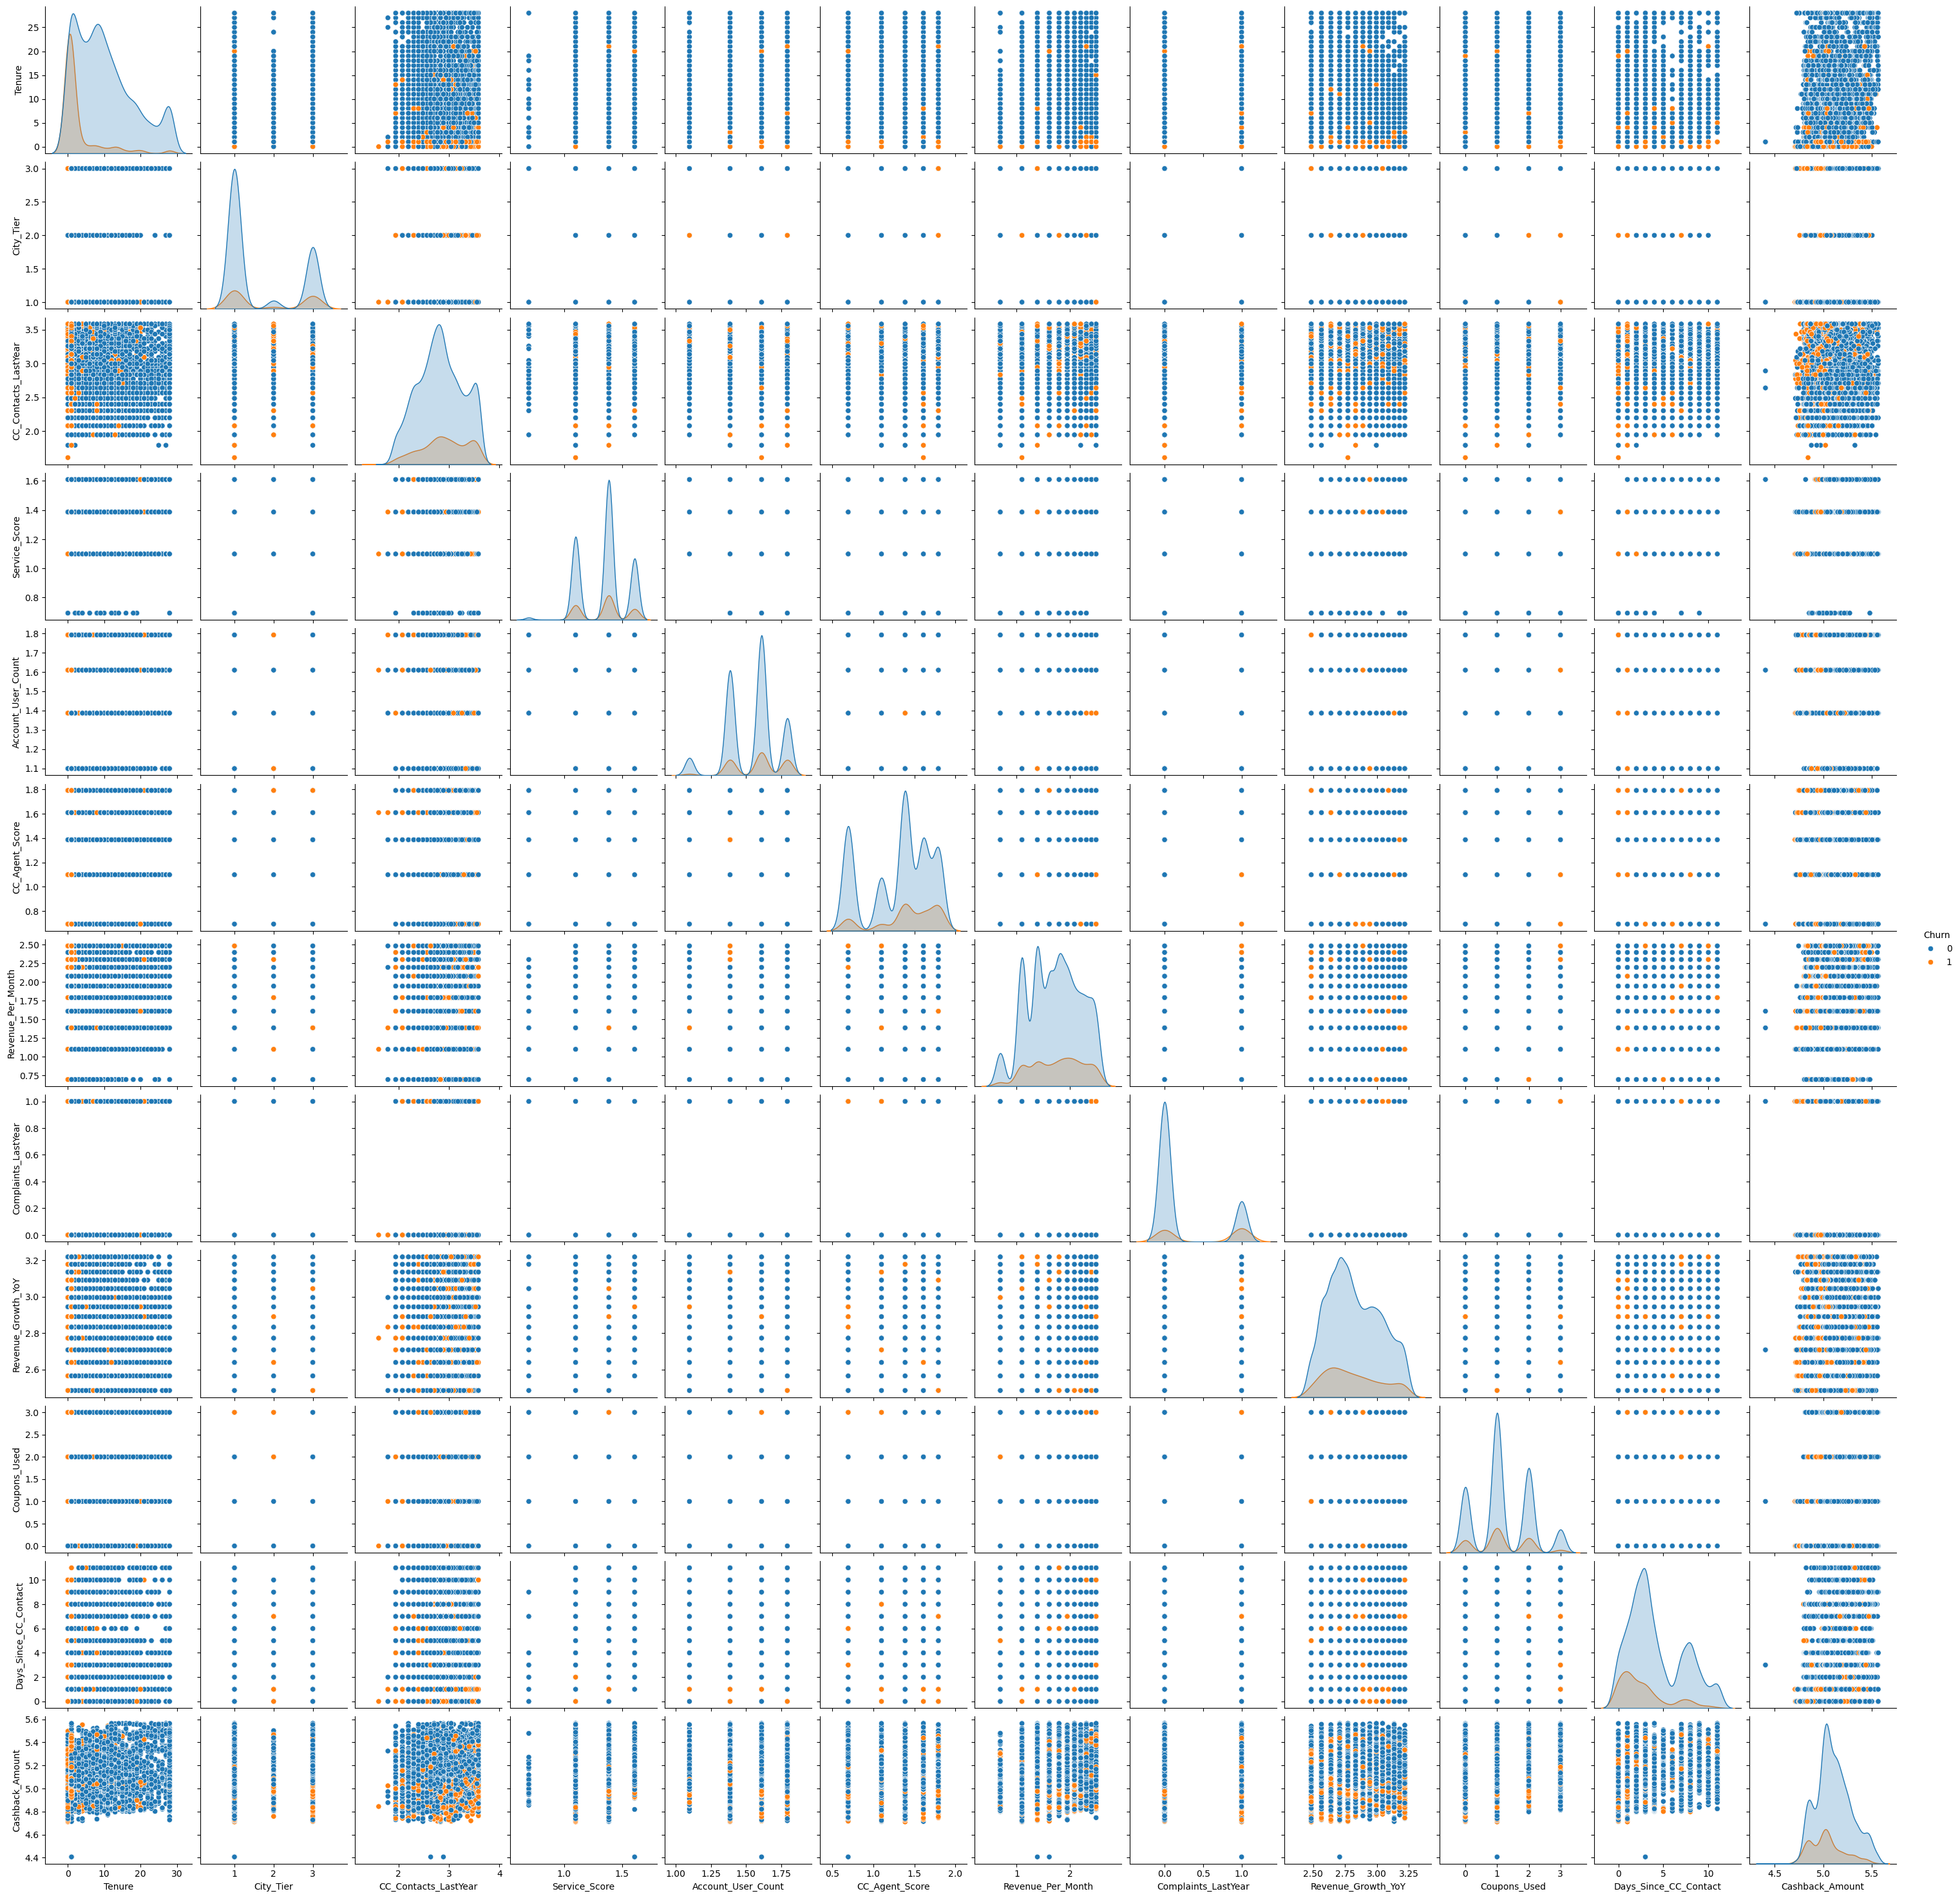

In [45]:
# plotting sns plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# pair plot to check on data distribution and co-linearity
sns.pairplot(df_cleaned, hue = 'Churn', diag_kind='kde')  
plt.show()

In [142]:
for column in df.columns:
    if df[column].dtype == "object":  # Check if column is categorical/text
        print(column.upper(), ": ", df[column].nunique())  # Convert column name to uppercase
        print(df[column].value_counts().sort_values())  # Count unique values
        print("\n")

PAYMENT :  5
Payment
UPI                  606
Cash on Delivery     737
E wallet             898
Credit Card         2586
Debit Card          3423
Name: count, dtype: int64


GENDER :  4
Gender
F           46
M           63
Female    3226
Male      4915
Name: count, dtype: int64


ACCOUNT_SEGMENT :  5
Account_Segment
Regular          385
Super Plus       619
HNI             1208
Super           2992
Regular Plus    3046
Name: count, dtype: int64


MARITAL_STATUS :  3
Marital_Status
Divorced    1244
Single      2624
Married     4382
Name: count, dtype: int64


LOGIN_DEVICE :  2
Login_Device
Computer    2382
Mobile      5868
Name: count, dtype: int64




In [143]:
df.dtypes

Churn                      int64
Tenure                   float64
City_Tier                float64
CC_Contacts_LastYear     float64
Payment                   object
Gender                    object
Service_Score            float64
Account_User_Count       float64
Account_Segment           object
CC_Agent_Score           float64
Marital_Status            object
Revenue_Per_Month          int64
Complaints_LastYear      float64
Revenue_Growth_YoY       float64
Coupons_Used             float64
Days_Since_CC_Contact    float64
Cashback_Amount          float64
Login_Device              object
dtype: object

In [144]:
df_cleaned.dtypes

Churn                      int64
Tenure                   float64
City_Tier                float64
CC_Contacts_LastYear     float64
Payment                   object
Gender                    object
Service_Score            float64
Account_User_Count       float64
Account_Segment           object
CC_Agent_Score           float64
Marital_Status            object
Revenue_Per_Month        float64
Complaints_LastYear      float64
Revenue_Growth_YoY       float64
Coupons_Used             float64
Days_Since_CC_Contact    float64
Cashback_Amount          float64
Login_Device              object
dtype: object

In [145]:
df_cleaned["Tenure"].unique()

array([ 4.,  0.,  2., 13., 11.,  9., 28., 14.,  8., 26., 18.,  5.,  1.,
        3.,  7., 24., 16., 10., 15., 22., 27.,  6., 25., 12., 20., 21.,
       23., 19., 17.])

In [146]:
df_cleaned["City_Tier"].unique()

array([3., 1., 2.])

In [147]:
df_cleaned["CC_Contacts_LastYear"].unique()

array([1.08041782, 1.16228311, 1.32776143, 1.27114985, 1.24844126,
       1.19470552, 1.49643402, 1.29172467, 1.47414401, 1.31050619,
       1.2231562 , 1.44882224, 1.46607654, 1.39736348, 1.42984555,
       1.37230673, 1.5099182 , 1.45764638, 1.38522686, 1.48187664,
       1.52246703, 1.4395687 , 1.34370344, 1.503301  , 1.35850472,
       1.48929923, 1.40879982, 1.41960684, 1.51630194, 1.02667203,
       0.95913484, 1.12474826])

In [148]:
df_cleaned["Payment"].unique()

array(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'],
      dtype=object)

In [149]:
#Log transformation for skewed continuous variables
for col in continuous_columns:
    if df[col].skew() > 1:  # You can define your threshold for skewness
        df[col] = df[col].apply(lambda x: np.log(x + 1))  # Log transform with +1 to avoid log(0)
    elif df[col].skew() < -1:
        df[col] = df[col].apply(lambda x: np.sqrt(x))  # Square root transformation

In [150]:
df['Revenue_per_Year'] = df['Tenure'] * df['Revenue_Per_Month']

#Create a "Churn_Rate" based on Churn column
df['Churn_Rate'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Check the new variables
print(df.head())

   Churn  Tenure  City_Tier  CC_Contacts_LastYear           Payment  Gender  \
0      1     4.0        3.0                   6.0        Debit Card  Female   
1      1     0.0        1.0                   8.0               UPI    Male   
3      1     0.0        3.0                  15.0        Debit Card    Male   
4      1     0.0        1.0                  12.0       Credit Card    Male   
6      1     2.0        3.0                  11.0  Cash on Delivery    Male   

   Service_Score  Account_User_Count Account_Segment  CC_Agent_Score  \
0            3.0                 3.0           Super             2.0   
1            3.0                 4.0    Regular Plus             3.0   
3            2.0                 4.0           Super             5.0   
4            2.0                 3.0    Regular Plus             5.0   
6            2.0                 3.0           Super             2.0   

  Marital_Status  Revenue_Per_Month  Complaints_LastYear  Revenue_Growth_YoY  \
0         Si

In [151]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [152]:
# Splitting into features (X) and target (y)
X = df.drop(columns=['Churn'])  # Drop target and irrelevant columns
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [153]:
def evaluation_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("ROC-AUC:", roc_auc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1_score": f1, "roc_auc": roc_auc}

In [154]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Save encoder for future use

In [155]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# If any, inspect their unique values
for col in non_numeric_cols:
    print(f"Unique values in {col}: {X_train[col].unique()}")

Non-numeric columns: Index(['Payment', 'Gender', 'Account_Segment', 'Marital_Status',
       'Login_Device'],
      dtype='object')
Unique values in Payment: ['UPI' 'Debit Card' 'Credit Card' 'E wallet' 'Cash on Delivery']
Unique values in Gender: ['Female' 'Male' 'F' 'M']
Unique values in Account_Segment: ['Super' 'HNI' 'Super Plus' 'Regular Plus' 'Regular']
Unique values in Marital_Status: ['Single' 'Divorced' 'Married']
Unique values in Login_Device: ['Mobile' 'Computer']


In [156]:
X_train['Gender'] = X_train['Gender'].replace({'F': 'Female', 'M': 'Male'})
X_test['Gender'] = X_test['Gender'].replace({'F': 'Female', 'M': 'Male'})

In [157]:
X_train = pd.get_dummies(X_train, columns=['Payment', 'Gender', 'Account_Segment', 'Marital_Status', 'Login_Device'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Payment', 'Gender', 'Account_Segment', 'Marital_Status', 'Login_Device'], drop_first=True)

# Ensure train and test have the same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [158]:
print(X_train.dtypes)
print(X_test.dtypes)

Tenure                          float64
City_Tier                       float64
CC_Contacts_LastYear            float64
Service_Score                   float64
Account_User_Count              float64
CC_Agent_Score                  float64
Revenue_Per_Month                 int64
Complaints_LastYear             float64
Revenue_Growth_YoY              float64
Coupons_Used                    float64
Days_Since_CC_Contact           float64
Cashback_Amount                 float64
Revenue_per_Year                float64
Churn_Rate                      float64
Payment_Credit Card                bool
Payment_Debit Card                 bool
Payment_E wallet                   bool
Payment_UPI                        bool
Gender_Male                        bool
Account_Segment_Regular            bool
Account_Segment_Regular Plus       bool
Account_Segment_Super              bool
Account_Segment_Super Plus         bool
Marital_Status_Married             bool
Marital_Status_Single              bool


In [159]:
# Identify numerical and categorical columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['Tenure', 'City_Tier', 'CC_Contacts_LastYear', 'Service_Score',
       'Account_User_Count', 'CC_Agent_Score', 'Revenue_Per_Month',
       'Complaints_LastYear', 'Revenue_Growth_YoY', 'Coupons_Used',
       'Days_Since_CC_Contact', 'Cashback_Amount', 'Revenue_per_Year',
       'Churn_Rate'],
      dtype='object')
Categorical columns: Index([], dtype='object')


In [160]:
from sklearn.impute import SimpleImputer
# Identify columns with all missing values
columns_with_all_missing = X_train[numerical_columns].columns[X_train[numerical_columns].isnull().all()]

# Exclude columns with all missing values from numerical_columns
numerical_columns_filtered = [col for col in numerical_columns if col not in columns_with_all_missing]

print("Columns with all missing values and excluded:", columns_with_all_missing)

# Impute remaining numerical columns
num_imputer = SimpleImputer(strategy='mean')

# Transform the filtered numerical columns and convert back to DataFrame
X_train[numerical_columns_filtered] = pd.DataFrame(
    num_imputer.fit_transform(X_train[numerical_columns_filtered]),
    columns=numerical_columns_filtered,
    index=X_train.index
)
X_test[numerical_columns_filtered] = pd.DataFrame(
    num_imputer.transform(X_test[numerical_columns_filtered]),
    columns=numerical_columns_filtered,
    index=X_test.index
)

# Optional: Drop columns with all missing values
X_train = X_train.drop(columns=columns_with_all_missing)
X_test = X_test.drop(columns=columns_with_all_missing)

print("Imputation complete. Remaining columns:")
print(X_train.columns)

Columns with all missing values and excluded: Index(['Churn_Rate'], dtype='object')
Imputation complete. Remaining columns:
Index(['Tenure', 'City_Tier', 'CC_Contacts_LastYear', 'Service_Score',
       'Account_User_Count', 'CC_Agent_Score', 'Revenue_Per_Month',
       'Complaints_LastYear', 'Revenue_Growth_YoY', 'Coupons_Used',
       'Days_Since_CC_Contact', 'Cashback_Amount', 'Revenue_per_Year',
       'Payment_Credit Card', 'Payment_Debit Card', 'Payment_E wallet',
       'Payment_UPI', 'Gender_Male', 'Account_Segment_Regular',
       'Account_Segment_Regular Plus', 'Account_Segment_Super',
       'Account_Segment_Super Plus', 'Marital_Status_Married',
       'Marital_Status_Single', 'Login_Device_Mobile'],
      dtype='object')


Logistic Regression:
Accuracy: 0.8957575757575758
Precision: 0.7758007117437722
Recall: 0.5278450363196125
F1-Score: 0.6282420749279538
ROC-AUC: 0.8924995831405602

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2062
           1       0.78      0.53      0.63       413

    accuracy                           0.90      2475
   macro avg       0.84      0.75      0.78      2475
weighted avg       0.89      0.90      0.89      2475

AUC Score: 0.8925


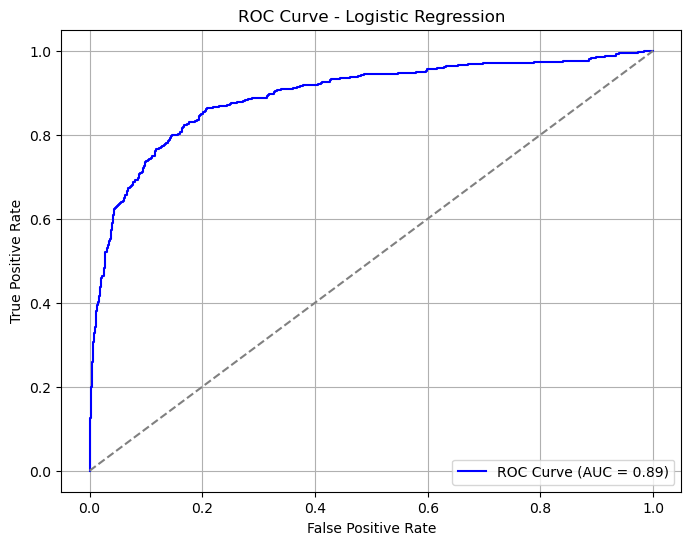

In [164]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Train the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
print("Logistic Regression:")
log_reg_metrics = evaluation_model(log_reg, X_test, y_test)

# --- ROC AUC Curve ---
# Predict probabilities for the positive class (usually class 1)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate AUC
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Random Forest Classifier:
Accuracy: 0.9616161616161616
Precision: 0.9441340782122905
Recall: 0.8184019370460048
F1-Score: 0.8767833981841764
ROC-AUC: 0.9892238899209258

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      2062
           1       0.94      0.82      0.88       413

    accuracy                           0.96      2475
   macro avg       0.95      0.90      0.93      2475
weighted avg       0.96      0.96      0.96      2475



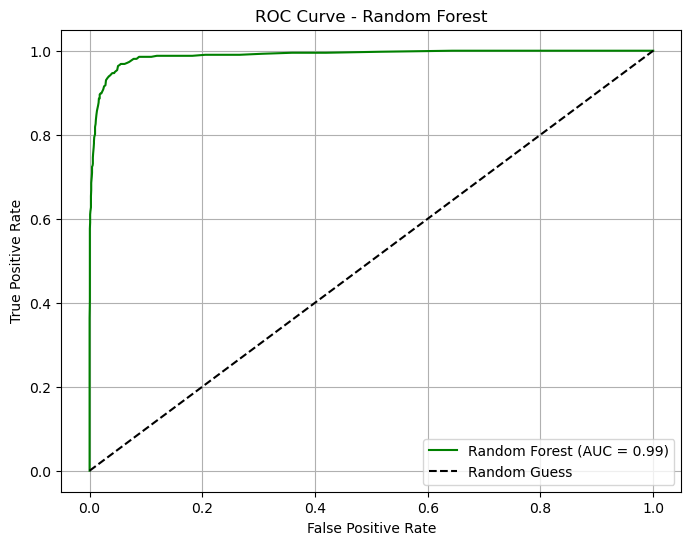

In [166]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train the model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
print("Random Forest Classifier:")
rf_metrics = evaluation_model(rf, X_test, y_test)

# --- ROC AUC Curve ---
# Get predicted probabilities for class 1
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_score_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_score_rf:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Support Vector Machine:
Accuracy: 0.8371717171717171
Precision: 1.0
Recall: 0.024213075060532687
F1-Score: 0.04728132387706856
ROC-AUC: 0.8681573403663198

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2062
           1       1.00      0.02      0.05       413

    accuracy                           0.84      2475
   macro avg       0.92      0.51      0.48      2475
weighted avg       0.86      0.84      0.77      2475



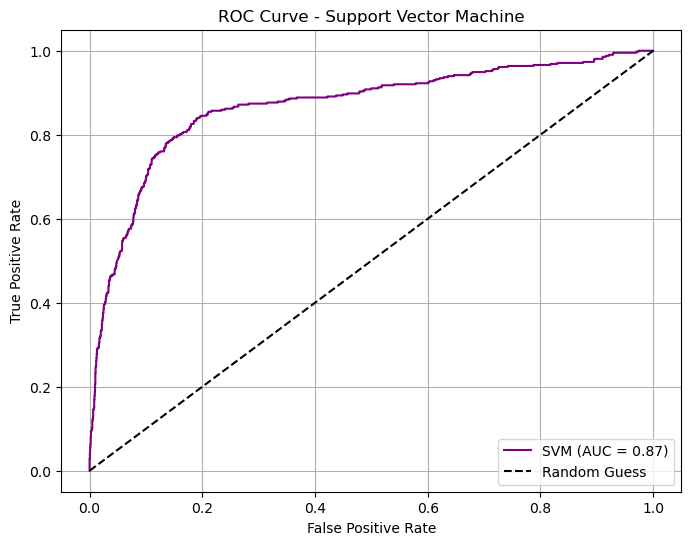

In [168]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train SVM model
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
print("Support Vector Machine:")
svm_metrics = evaluation_model(svm, X_test, y_test)

# --- ROC AUC Curve ---
# Get predicted probabilities for class 1
y_prob_svm = svm.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
auc_score_svm = roc_auc_score(y_test, y_prob_svm)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_score_svm:.2f})", color='purple')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Support Vector Machine")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Decision Tree Classifier:
Accuracy: 0.8973737373737374
Precision: 0.723943661971831
Recall: 0.6222760290556901
F1-Score: 0.6692708333333334
ROC-AUC: 0.8938294234657811

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      2062
           1       0.72      0.62      0.67       413

    accuracy                           0.90      2475
   macro avg       0.83      0.79      0.80      2475
weighted avg       0.89      0.90      0.89      2475



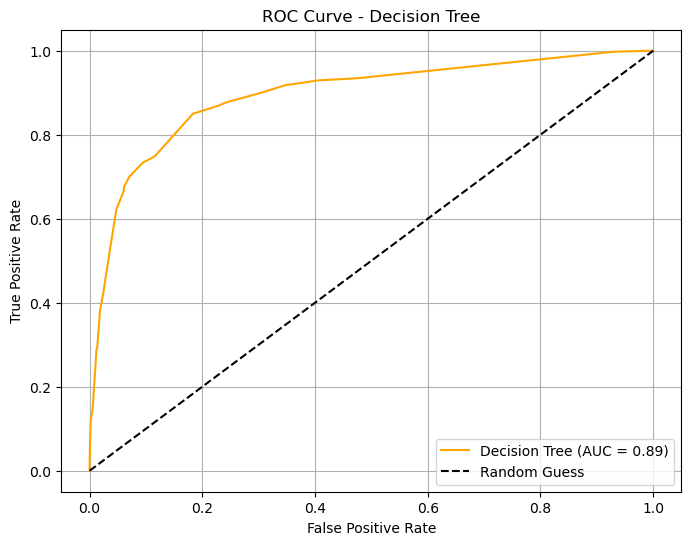

In [170]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)
print("Decision Tree Classifier:")
dt_metrics = evaluation_model(dt, X_test, y_test)

# --- ROC AUC Curve ---
# Predict probabilities for the positive class
y_prob_dt = dt.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_score_dt = roc_auc_score(y_test, y_prob_dt)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_score_dt:.2f})", color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Gradient Boosting Classifier:
Accuracy: 0.9195959595959596
Precision: 0.8262195121951219
Recall: 0.6561743341404358
F1-Score: 0.7314439946018894
ROC-AUC: 0.9362275512384834

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      2062
           1       0.83      0.66      0.73       413

    accuracy                           0.92      2475
   macro avg       0.88      0.81      0.84      2475
weighted avg       0.92      0.92      0.92      2475



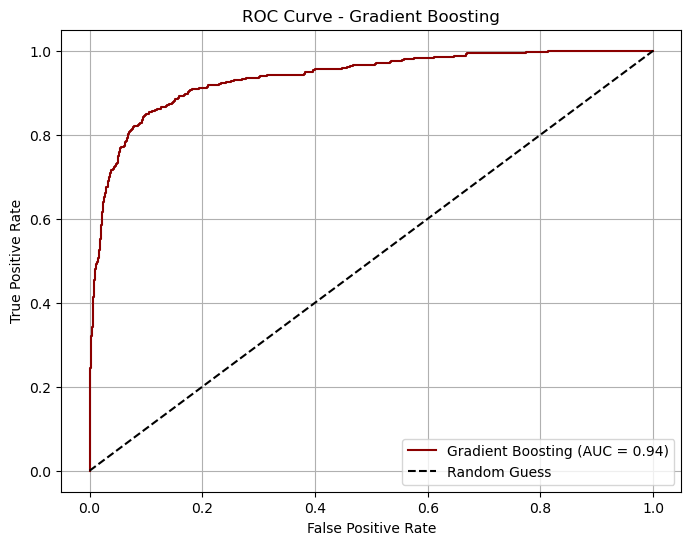

In [173]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb.fit(X_train, y_train)
print("Gradient Boosting Classifier:")
gb_metrics = evaluation_model(gb, X_test, y_test)

# --- ROC AUC Curve ---
# Get predicted probabilities for class 1
y_prob_gb = gb.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
auc_score_gb = roc_auc_score(y_test, y_prob_gb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {auc_score_gb:.2f})", color='darkred')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [174]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM']
metrics = [log_reg_metrics, dt_metrics, rf_metrics, gb_metrics, svm_metrics]
comparison_df = pd.DataFrame(metrics, index=models)
print(comparison_df)

                     accuracy  precision    recall  f1_score   roc_auc
Logistic Regression  0.895758   0.775801  0.527845  0.628242  0.892500
Decision Tree        0.897374   0.723944  0.622276  0.669271  0.893829
Random Forest        0.961616   0.944134  0.818402  0.876783  0.989224
Gradient Boosting    0.919596   0.826220  0.656174  0.731444  0.936228
SVM                  0.837172   1.000000  0.024213  0.047281  0.868157


In [175]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, recall_score, make_scorer

# Load your data (Assuming 'X' as features and 'y' as target labels)
# X, y = your_dataset_features, your_dataset_target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardizing for models that require it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define recall scorer
recall_scorer = make_scorer(recall_score)

# Logistic Regression
log_reg_params = {
    'solver': ['liblinear'],  # Only solvers supporting l1 and l2
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [100, 200, 300]
}
log_reg = LogisticRegression()
grid_log_reg = GridSearchCV(log_reg, log_reg_params, scoring=recall_scorer, cv=StratifiedKFold(n_splits=5))
grid_log_reg.fit(X_train_scaled, y_train)
print(f"Best Logistic Regression Params: {grid_log_reg.best_params_}")

# SVM
svm_params = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}
svm = SVC()
grid_svm = GridSearchCV(svm, svm_params, scoring=recall_scorer, cv=StratifiedKFold(n_splits=5))
grid_svm.fit(X_train_scaled, y_train)
print(f"Best SVM Params: {grid_svm.best_params_}")

# Decision Tree
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5]
}
dtree = DecisionTreeClassifier()
grid_tree = GridSearchCV(dtree, tree_params, scoring=recall_scorer, cv=StratifiedKFold(n_splits=5))
grid_tree.fit(X_train, y_train)
print(f"Best Decision Tree Params: {grid_tree.best_params_}")

# Random Forest
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5]
}
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, rf_params, scoring=recall_scorer, cv=StratifiedKFold(n_splits=5))
grid_rf.fit(X_train, y_train)
print(f"Best Random Forest Params: {grid_rf.best_params_}")

# Gradient Boosting
gb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb = GradientBoostingClassifier()
grid_gb = GridSearchCV(gb, gb_params, scoring=recall_scorer, cv=StratifiedKFold(n_splits=5))
grid_gb.fit(X_train, y_train)
print(f"Best Gradient Boosting Params: {grid_gb.best_params_}")

# Cross-validation report for each model
models = {
    'Logistic Regression': grid_log_reg.best_estimator_,
    'SVM': grid_svm.best_estimator_,
    'Decision Tree': grid_tree.best_estimator_,
    'Random Forest': grid_rf.best_estimator_,
    'Gradient Boosting': grid_gb.best_estimator_
}

for model_name, model in models.items():
    print(f"\n{model_name} Performance:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

Best Logistic Regression Params: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best SVM Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Gradient Boosting Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1372
           1       0.38      0.72      0.50       278

    accuracy                           0.76      1650
   macro avg       0.66      0.74      0.67      1650
weighted avg       0.84      0.76      0.78      1650


SVM Performance:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1372
           1       0.00   

C:\Users\saurav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saurav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saurav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [176]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for each model and store in a dictionary
log_reg_metrics = {
    "Accuracy": accuracy_score(y_test, grid_log_reg.best_estimator_.predict(X_test)),
    "Precision": precision_score(y_test, grid_log_reg.best_estimator_.predict(X_test), average='weighted'),
    "Recall": recall_score(y_test, grid_log_reg.best_estimator_.predict(X_test), average='weighted'),
    "F1-Score": f1_score(y_test, grid_log_reg.best_estimator_.predict(X_test), average='weighted')
}

dt_metrics = {
    "Accuracy": accuracy_score(y_test, grid_tree.best_estimator_.predict(X_test)),
    "Precision": precision_score(y_test, grid_tree.best_estimator_.predict(X_test), average='weighted'),
    "Recall": recall_score(y_test, grid_tree.best_estimator_.predict(X_test), average='weighted'),
    "F1-Score": f1_score(y_test, grid_tree.best_estimator_.predict(X_test), average='weighted')
}

rf_metrics = {
    "Accuracy": accuracy_score(y_test, grid_rf.best_estimator_.predict(X_test)),
    "Precision": precision_score(y_test, grid_rf.best_estimator_.predict(X_test), average='weighted'),
    "Recall": recall_score(y_test, grid_rf.best_estimator_.predict(X_test), average='weighted'),
    "F1-Score": f1_score(y_test, grid_rf.best_estimator_.predict(X_test), average='weighted')
}

gb_metrics = {
    "Accuracy": accuracy_score(y_test, grid_gb.best_estimator_.predict(X_test)),
    "Precision": precision_score(y_test, grid_gb.best_estimator_.predict(X_test), average='weighted'),
    "Recall": recall_score(y_test, grid_gb.best_estimator_.predict(X_test), average='weighted'),
    "F1-Score": f1_score(y_test, grid_gb.best_estimator_.predict(X_test), average='weighted')
}

svm_metrics = {
    "Accuracy": accuracy_score(y_test, grid_svm.best_estimator_.predict(X_test)),
    "Precision": precision_score(y_test, grid_svm.best_estimator_.predict(X_test), average='weighted'),
    "Recall": recall_score(y_test, grid_svm.best_estimator_.predict(X_test), average='weighted'),
    "F1-Score": f1_score(y_test, grid_svm.best_estimator_.predict(X_test), average='weighted')
}

# Consolidate metrics for comparison
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM']
metrics = [log_reg_metrics, dt_metrics, rf_metrics, gb_metrics, svm_metrics]
comparison_df = pd.DataFrame(metrics, index=models)
print(comparison_df)

C:\Users\saurav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.756364   0.838935  0.756364  0.781836
Decision Tree        0.952121   0.952649  0.952121  0.952358
Random Forest        0.970909   0.970567  0.970909  0.970426
Gradient Boosting    0.950909   0.949776  0.950909  0.949569
SVM                  0.831515   0.691417  0.831515  0.755022
